# Web Scraping Project

### Introduction

Marijuana strain data for this project was scraped from [Leafly](https://www.leafly.com/). Approximately 3,200 marijuana strains were scraped with data in 19 columns. Additionally, Leafly partners with labs to test their marijuana. However, they also rely on user information for ratings, effects, flavors, and potency.

### Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./canna/strain_data_v2.csv')

In [3]:
df.shape

(3242, 19)

In [4]:
df.sample(10).sort_index().T

150                    368         453   \
calm_vs_ener                  NaN                    NaN         NaN   
cbd_pct                       NaN                    NaN         NaN   
child_1                       NaN                    NaN         NaN   
child_2                       NaN                    NaN         NaN   
eff_pct                       NaN                    NaN         NaN   
effects                       NaN                    NaN         NaN   
grow_all                      NaN                    NaN         NaN   
n_rate_rvws                   NaN                      2           5   
n_reported_effects            NaN                    NaN         NaN   
parent_1                      NaN                    NaN         NaN   
parent_2                      NaN                    NaN         NaN   
pop_loc             Rio Vista, CA  Norman, OK,Blythe, CA         NaN   
prim_type                  Hybrid                 Hybrid      Hybrid   
rating                        NaN                      5         4.8   
strain                  Plumberry        Slice of Heaven  The Blintz   
terp_bar_pct                  NaN                    NaN         NaN   
terp_descrip                  NaN                    NaN         NaN   
terpenes                      NaN                    NaN         NaN   
thc_pct                       NaN                    NaN         NaN   

                                                                 830   \
calm_vs_ener                                                      NaN   
cbd_pct                                                           NaN   
child_1                                                           NaN   
child_2                                                           NaN   
eff_pct                                                           NaN   
effects                                                           NaN   
grow_all                                                          NaN   
n_rate_rvws                                                         9   
n_reported_effects                                                NaN   
parent_1                                                          NaN   
parent_2                                                          NaN   
pop_loc             Portland, OR,Bend, OR,Eugene, OR,Hood River, O...   
prim_type                                                      Hybrid   
rating                                                            4.1   
strain                                               Hawaiian Sunrise   
terp_bar_pct                                                      NaN   
terp_descrip                                                      NaN   
terpenes                                                          NaN   
thc_pct                                                           NaN   

                                        1008                         1053  \
calm_vs_ener                             NaN                          NaN   
cbd_pct                                  NaN                          NaN   
child_1                                  NaN                          NaN   
child_2                                  NaN                          NaN   
eff_pct                                  NaN                          NaN   
effects                                  NaN                          NaN   
grow_all                                 NaN  Moderate,> 78,1 - 3,10 - 12   
n_rate_rvws                                8                            7   
n_reported_effects                       NaN                          NaN   
parent_1                                 NaN                    Cambodian   
parent_2                                 NaN                  Purple Haze   
pop_loc                           Eugene, OR                          NaN   
prim_type                             Indica                       Sativa   
rating                                   4.6     

In [5]:
df.dtypes

calm_vs_ener           object
cbd_pct               float64
child_1                object
child_2                object
eff_pct                object
effects                object
grow_all               object
n_rate_rvws           float64
n_reported_effects     object
parent_1               object
parent_2               object
pop_loc                object
prim_type              object
rating                float64
strain                 object
terp_bar_pct           object
terp_descrip           object
terpenes               object
thc_pct               float64
dtype: object

In [6]:
df.isnull().sum()

calm_vs_ener          1737
cbd_pct               3216
child_1               2995
child_2               2995
eff_pct               2004
effects               2004
grow_all              3079
n_rate_rvws            308
n_reported_effects    2004
parent_1              1511
parent_2              1511
pop_loc                666
prim_type                0
rating                 308
strain                   0
terp_bar_pct          2847
terp_descrip          2847
terpenes              2847
thc_pct               2432
dtype: int64

In [7]:
df_copy = df.copy()

In [8]:
df_copy['calm_vs_ener'] = df_copy['calm_vs_ener'].str.replace('[a-zA-Z-%:]','',regex=True).astype('float64')
df_copy['calm_vs_ener']

0       55.710916
1       68.579642
2       89.466798
3       88.415222
4       97.690063
          ...    
3237    57.276062
3238    33.656710
3239    94.107765
3240    41.576603
3241    72.894438
Name: calm_vs_ener, Length: 3242, dtype: float64

In [9]:
df_copy = df_copy.join(df_copy['eff_pct'].str.split(',%,', expand=True))

In [10]:
df_copy

calm_vs_ener  cbd_pct           child_1           child_2  \
0        55.710916      NaN      Cherry Sauce               Alf   
1        68.579642      NaN      Travel Joint          El Perro   
2        89.466798      NaN         Lemon Ice     Lemon Cookies   
3        88.415222      NaN     Amnesia White    Monster Profit   
4        97.690063      NaN  DJ Andy Williams          Lemonder   
...            ...      ...               ...               ...   
3237     57.276062      NaN    Kid N' Kookies     The Big Dirty   
3238     33.656710      NaN               NaN               NaN   
3239     94.107765      NaN       Diesel Duff  Champagne Diesel   
3240     41.576603      NaN         The Bling          VVS Chem   
3241     72.894438      NaN  Pine Queen Dream  DJ Andy Williams   

                                                eff_pct  \
0     59,%,59,%,51,%,44,%,30,%,36,%,28,%,24,%,23,%,1...   
1     63,%,56,%,50,%,48,%,33,%,30,%,27,%,23,%,18,%,1...   
2     67,%,54,%,53,%,46,%,43,%,34,%,27,%,24,%,19,%,1...   
3     70,%,64,%,58,%,45,%,45,%,37,%,31,%,25,%,23,%,1...   
4     56,%,55,%,55,%,50,%,42,%,35,%,27,%,25,%,18,%,1...   
...                                                 ...   
3237  62,%,59,%,54,%,47,%,35,%,36,%,28,%,27,%,27,%,1...   
3238  66,%,58,%,46,%,40,%,24,%,26,%,20,%,17,%,17,%,1...   
3239  62,%,54,%,54,%,50,%,43,%,38,%,29,%,28,%,24,%,1...   
3240  59,%,54,%,51,%,41,%,29,%,29,%,24,%,24,%,20,%,1...   
3241  60,%,54,%,51,%,50,%,40,%,39,%,30,%,29,%,28,%,1...   

                                                effects  \
0     Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Creati...   
1     Happy, ,Relaxed, ,Euphoric, ,Uplifted, ,Focuse...   
2     Happy, ,Uplifted, ,Euphoric, ,Energetic, ,Rela...   
3     Happy, ,Euphoric, ,Uplifted, ,Energetic, ,Crea...   
4     Happy, ,Uplifted, ,Energetic, ,Euphoric, ,Crea...   
...                                                 ...   
3237  Happy, ,Relaxed, ,Euphoric, ,Uplifted, ,Creati...   
3238  Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Hungry...   
3239  Happy, ,Uplifted, ,Euphoric, ,Energetic, ,Crea...   
3240  Relaxed, ,Happy, ,Euphoric, ,Uplifted, ,Creati...   
3241  Happy, ,Euphoric, ,Relaxed, ,Uplifted, ,Creati...   

                            grow_all  n_rate_rvws  \
0       Moderate,30 - 78,3 - 6,7 - 9       1811.0   
1                                NaN        541.0   
2     Moderate,30 - 78,1 - 3,10 - 12       2271.0   
3     Moderate,30 - 78,3 - 6,10 - 12       1389.0   
4        Moderate,> 78,1 - 3,10 - 12       2021.0   
...                              ...          ...   
3237     Moderate,< 30,0.5 - 1,7 - 9       6956.0   
3238                             NaN        908.0   
3239     Moderate,> 78,1 - 3,10 - 12       7571.0   
3240                             NaN       1508.0   
3241     Moderate,> 78,3 - 6,10 - 12      13094.0   

                      n_reported_effects            parent_1  ...   5   6   7  \
0      1209 people reported 8899 effects       Durban Poison  ...  36  28  24   
1       386 people reported 2899 effects           Tres Dawg  ...  30  27  23   
2     1582 people reported 12309 effects         Silver Haze  ...  34  27  24   
3      1011 people reported 8816 effects  South Asian Indica  ...  37  31  25   
4     1465 people reported 10581 effects         Lemon Skunk  ...  35  27  25   
...                                  ...                 ...  ...  ..  ..  ..   
3237  4515 people reported 35650 effects       Durban Poison  ...  36  28  27   
3238    620 people reported 3994 effects                 NaN  ...  26  20  17   
3239  5086 people reported 40754 effects          Chemdog 91  ...  38  29  28   
3240    993 people reported 6909 effects       Thin Mint GSC  ...  29  24  24   
3241  8917 people reported 70443 effects                Haze  ...  39  30  29   

       8   9  10  11  12  13   14  
0     23  14  27  15   6   4  4,%  
1     18  15  31  14  10   4  2,%  
2     19  11  38  19  10  10  6,%  
3     23  14  42  22  15  13 

In [11]:
df_copy.columns = ['calm_vs_ener',
 'cbd_pct',
 'child_1',
 'child_2',
 'eff_pct',
 'effects',
 'grow_all',
 'n_rate_rvws',
 'n_reported_effects',
 'parent_1',
 'parent_2',
 'pop_loc',
 'prim_type',
 'rating',
 'strain',
 'terp_bar_pct',
 'terp_descrip',
 'terpenes',
 'thc_pct',
 'relaxed','happy', 'euphoric', 'uplifted', 'creative', 
 'stress', 'depression', 'anxiety', 'pain', 'insomnia', 
 'dry_mouth', 'dry_eyes', 'dizzy', 'anxious', 'paranoid'] 

In [12]:
#df_copy.paranoid = df_copy.paranoid.str.replace('[,%]','',regex=True)

df_copy.loc[:,'relaxed':'paranoid'] = df_copy.loc[:,'relaxed':'paranoid'].replace('[,%]','',regex=True).astype('float64')

In [13]:
df_copy.dtypes

calm_vs_ener          float64
cbd_pct               float64
child_1                object
child_2                object
eff_pct                object
effects                object
grow_all               object
n_rate_rvws           float64
n_reported_effects     object
parent_1               object
parent_2               object
pop_loc                object
prim_type              object
rating                float64
strain                 object
terp_bar_pct           object
terp_descrip           object
terpenes               object
thc_pct               float64
relaxed               float64
happy                 float64
euphoric              float64
uplifted              float64
creative              float64
stress                float64
depression            float64
anxiety               float64
pain                  float64
insomnia              float64
dry_mouth             float64
dry_eyes              float64
dizzy                 float64
anxious               float64
paranoid  

In [14]:
df_copy.isnull().sum()

calm_vs_ener          1737
cbd_pct               3216
child_1               2995
child_2               2995
eff_pct               2004
effects               2004
grow_all              3079
n_rate_rvws            308
n_reported_effects    2004
parent_1              1511
parent_2              1511
pop_loc                666
prim_type                0
rating                 308
strain                   0
terp_bar_pct          2847
terp_descrip          2847
terpenes              2847
thc_pct               2432
relaxed               2004
happy                 2004
euphoric              2004
uplifted              2004
creative              2004
stress                2004
depression            2004
anxiety               2004
pain                  2004
insomnia              2004
dry_mouth             2004
dry_eyes              2004
dizzy                 2019
anxious               2081
paranoid              2214
dtype: int64

In [15]:
df_copy.drop(['effects', 'eff_pct'],axis=1, inplace=True)

In [16]:
df_copy = df_copy.join(df_copy['grow_all'].str.split(',', expand=True))

In [17]:
df_copy.columns = ['calm_vs_ener',
 'cbd_pct',
 'child_1',
 'child_2',
 'grow_all',
 'n_rate_rvws',
 'n_reported_effects',
 'parent_1',
 'parent_2',
 'pop_loc',
 'prim_type',
 'rating',
 'strain',
 'terp_bar_pct',
 'terp_descrip',
 'terpenes',
 'thc_pct',
 'relaxed','happy', 'euphoric', 'uplifted', 'creative', 
 'stress', 'depression', 'anxiety', 'pain', 'insomnia', 
 'dry_mouth', 'dry_eyes', 'dizzy', 'anxious', 'paranoid',
 'grw_difficulty', 'height_in', 'yield_oz', 'flwr_wks']

In [18]:
df_copy.drop('grow_all', axis = 1, inplace=True)

In [19]:
df_copy = df_copy.join(df_copy['n_reported_effects'].str.split(' ',expand=True))

In [20]:
df_copy.drop([1, 2, 4], axis = 1, inplace=True)

In [21]:
df_copy.columns = ['calm_vs_ener',
 'cbd_pct',
 'child_1',
 'child_2',
 'n_rate_rvws',
 'n_eff_all',
 'parent_1',
 'parent_2',
 'pop_loc',
 'prim_type',
 'rating',
 'strain',
 'terp_bar_pct',
 'terp_descrip',
 'terpenes',
 'thc_pct',
 'relaxed','happy', 'euphoric', 'uplifted', 'creative', 
 'stress', 'depression', 'anxiety', 'pain', 'insomnia', 
 'dry_mouth', 'dry_eyes', 'dizzy', 'anxious', 'paranoid',
 'grw_difficulty', 'height_in', 'yield_oz', 'flwr_wks',
 'n_people_eff', 'n_eff_reported']

In [22]:
df_copy.loc['n_people_eff':'n_eff_reported'] = df_copy.loc['n_people_eff':'n_eff_reported'].astype('float64')

In [23]:
df_copy.sample(10).T

3156  \
calm_vs_ener                                              22.9844   
cbd_pct                                                       NaN   
child_1                                                       NaN   
child_2                                                       NaN   
n_rate_rvws                                                   268   
n_eff_all                        188 people reported 1356 effects   
parent_1                                            Albert Walker   
parent_2                                               Chemdog 91   
pop_loc         Portland, OR,Eugene, OR,Bend, OR,Salem, OR,Bea...   
prim_type                                                  Hybrid   
rating                                                        4.7   
strain                                               Dogwalker OG   
terp_bar_pct                      width:170%,width:114%,width:58%   
terp_descrip                                Citrus,Herbal,Peppery   
terpenes                           Limonene,Myrcene,Caryophyllene   
thc_pct                                                      22.5   
relaxed                                                        61   
happy                                                          47   
euphoric                                                       45   
uplifted                                                       34   
creative                                                       27   
stress                                                         30   
depression                                                     29   
anxiety                                                        23   
pain                                                           22   
insomnia                                                       19   
dry_mouth                                                      20   
dry_eyes                                                       10   
dizzy                                                           5   
anxious                                                         3   
paranoid                                                        3   
grw_difficulty                                                NaN   
height_in                                                     NaN   
yield_oz                                                      NaN   
flwr_wks                                                      NaN   
n_people_eff                                                  188   
n_eff_reported                                               1356   

                                          352       1388        380   \
calm_vs_ener                               NaN  0.887734         NaN   
cbd_pct                                    NaN       NaN         NaN   
child_1                                    NaN       NaN         NaN   
child_2                                    NaN       NaN         NaN   
n_rate_rvws                                NaN        26           7   
n_eff_all                                  NaN       NaN         NaN   
parent_1                                   NaN       NaN  Lemon Thai   
parent_2                                   NaN       NaN  Hindu Kush   
pop_loc         Seattle, WA,Spokane Valley, WA       NaN         NaN   
prim_type                               Hybrid    Indica      Hybrid   
rating                                     NaN       4.3           4   
strain                          Lazy Susan CBD      Erez      Bogart   
terp_bar_pct                               NaN       NaN         NaN   
terp_descrip                               NaN       NaN         NaN   
terpenes                                   NaN       NaN         NaN   
thc_pct                                    NaN       NaN         NaN   
relaxed                                    NaN       NaN         NaN   
happy                                      NaN       NaN         NaN   
euphoric                                   NaN       NaN         NaN  

### Exploratory Analysis


#### Effects, Ratings, Reviews, and THC

There appears to be some relationship between the number of reviews on certain effects and THC percent. Alternatively, ratings appear to be pretty consistent. This will be examined further below.

In [24]:
scatter_df = df_copy.copy()

In [25]:
scatter_df.drop(['child_1', 'child_2', 'n_eff_all', 
                 'parent_1', 'parent_2', 'terp_bar_pct'], axis=1, inplace=True)

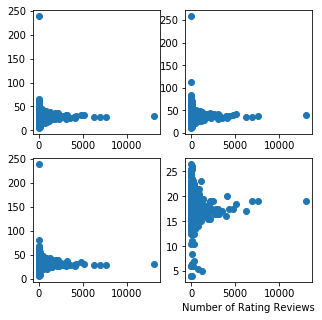

In [26]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(5,5))

#T - L
axs[0, 0].scatter(scatter_df['n_rate_rvws'], scatter_df['anxiety'])

#B - L
axs[1, 0].scatter(scatter_df['n_rate_rvws'], scatter_df['depression'])

#T- R
axs[0, 1].scatter(scatter_df['n_rate_rvws'], scatter_df['stress'])

#B - R
axs[1, 1].scatter(scatter_df['n_rate_rvws'], scatter_df['thc_pct'])

plt.xlabel('Number of Rating Reviews')
plt.show()


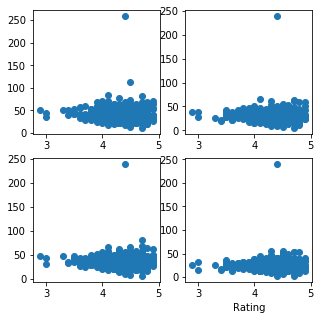

In [27]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(5,5))

#T - L
axs[0, 0].scatter(scatter_df['rating'], scatter_df['stress'])

#B - L
axs[1, 0].scatter(scatter_df['rating'], scatter_df['depression'])

#T- R
axs[0, 1].scatter(scatter_df['rating'], scatter_df['anxiety'])

#B - R
axs[1, 1].scatter(scatter_df['rating'], scatter_df['pain'])

plt.xlabel('Rating')
plt.show()


Below, I created a copy of the initial `scatter_df` and dropped columns in order to calculate the z-score for the numeric columns. I calculated the z-score and kept values less than 3 standard deviations from the mean. 

In [28]:
scatter_2 = scatter_df.copy()

In [29]:
scatter_2.drop(['pop_loc', 'terp_descrip', 'terpenes', 
                 'grw_difficulty', 'height_in', 'yield_oz',
               'flwr_wks', 'n_people_eff', 'n_eff_reported', 'strain', 
                'prim_type', 'calm_vs_ener', 'cbd_pct'], axis=1, inplace=True)

In [30]:
scatter_3 = scatter_2.loc[scatter_2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [31]:
#scatter_3

Now, we can better see the relationship between the number of reviews and the percent of effects reported. 

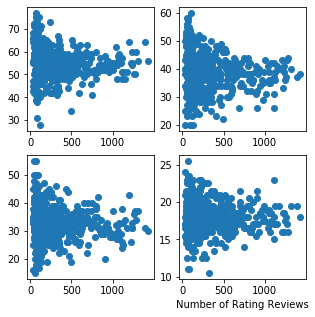

In [32]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(5,5))
#T - L
axs[0, 0].scatter(scatter_3['n_rate_rvws'], scatter_3['happy'])

#B - L
axs[1, 0].scatter(scatter_3['n_rate_rvws'], scatter_3['depression'])

#T- R
axs[0, 1].scatter(scatter_3['n_rate_rvws'], scatter_3['stress'])

#B - R
axs[1, 1].scatter(scatter_3['n_rate_rvws'], scatter_3['thc_pct'])

plt.xlabel('Number of Rating Reviews')
plt.show()



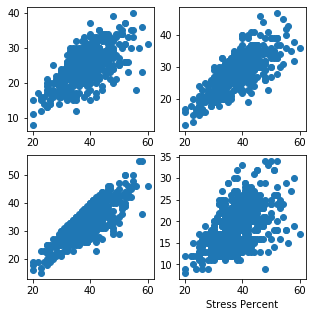

In [33]:
#plt.figure(figsize=(12,12))
fig, axs = plt.subplots(2, 2, figsize=(5,5))
#T - L
axs[0, 0].scatter(scatter_3['stress'], scatter_3['pain'],)
#B - L
axs[1, 0].scatter(scatter_3['stress'], scatter_3['depression'])

#T- R
axs[0, 1].scatter(scatter_3['stress'], scatter_3['anxiety'])
#B - R
axs[1, 1].scatter(scatter_3['stress'], scatter_3['insomnia'])

plt.xlabel('Stress Percent')

plt.show()



In [34]:
scatter_4 = pd.merge(scatter_3, scatter_df['prim_type'], how='inner', left_index=True, right_index=True)
scatter_4

n_rate_rvws  rating  thc_pct  relaxed  happy  euphoric  uplifted  \
1           541.0     4.4     20.5     63.0   56.0      50.0      48.0   
3          1389.0     4.2     19.5     70.0   64.0      58.0      45.0   
8           562.0     4.7     16.0     75.0   52.0      46.0      34.0   
11          590.0     4.7     20.5     66.0   42.0      42.0      37.0   
12          408.0     4.6     20.5     50.0   48.0      44.0      42.0   
...           ...     ...      ...      ...    ...       ...       ...   
3233        738.0     4.1     17.0     62.0   46.0      43.0      41.0   
3234        523.0     4.3     18.5     58.0   55.0      53.0      44.0   
3235        346.0     4.2     21.5     63.0   57.0      57.0      43.0   
3236        789.0     4.6     19.5     75.0   50.0      45.0      43.0   
3238        908.0     4.6     21.5     66.0   58.0      46.0      40.0   

      creative  stress  depression  anxiety  pain  insomnia  dry_mouth  \
1         33.0    30.0        27.0     23.0  18.0      15.0       31.0   
3         45.0    37.0        31.0     25.0  23.0      14.0       42.0   
8         32.0    30.0        26.0     25.0  22.0      20.0       17.0   
11        29.0    31.0        25.0     24.0  22.0      20.0       20.0   
12        40.0    23.0        23.0     20.0  16.0      15.0       13.0   
...        ...     ...         ...      ...   ...       ...        ...   
3233      33.0    39.0        37.0     33.0  31.0      18.0       28.0   
3234      33.0    46.0        36.0     35.0  34.0      23.0       35.0   
3235      39.0    50.0        41.0     33.0  31.0      24.0       41.0   
3236      30.0    32.0        28.0     26.0  26.0      24.0       26.0   
3238      24.0    26.0        20.0     17.0  17.0      11.0       21.0   

      dry_eyes  dizzy  anxious  paranoid prim_type  
1         14.0   10.0      4.0       2.0    Hybrid  
3         22.0   15.0     13.0       6.0    Sativa  
8         10.0    1.0      1.0       1.0    Indica  
11        11.0    7.0      3.0       2.0    Indica  
12        12.0    3.0      3.0       2.0    Hybrid  
...        ...    ...      ...       ...       ...  
3233      19.0    6.0      5.0       3.0    Indica  
3234      22.0    7.0      5.0       5.0    Hybrid  
3235      25.0    9.0      9.0       5.0    Indica  
3236      15.0    6.0      3.0       3.0    Indica  
3238      10.0    6.0      3.0       2.0    Hybrid  

[519 rows x 19 columns]

Text(0.5, 1.0, 'Scatter of Rating and THC Percent')

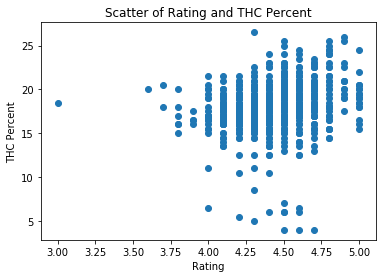

In [35]:
plt.scatter(x= df_copy['rating'], y= df_copy['thc_pct'])
plt.xlabel('Rating')
plt.ylabel('THC Percent')
plt.title('Scatter of Rating and THC Percent')

In [36]:
# mpl.rcParams['figure.figsize'] = [8.0, 6.0]
# mpl.rcParams['figure.dpi'] = 80
# mpl.rcParams['savefig.dpi'] = 100

# mpl.rcParams['font.size'] = 12
# mpl.rcParams['legend.fontsize'] = 'large'
# mpl.rcParams['figure.titlesize'] = 'medium'

Text(0.5, 1.0, 'Scatter of Rating by THC Percent')

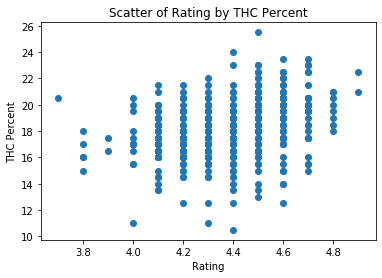

In [37]:
#plt.figure(figsize=None)
plt.scatter(x= scatter_3['rating'], y= scatter_3['thc_pct'])
plt.ylabel('THC Percent')
plt.xlabel('Rating')
plt.title('Scatter of Rating by THC Percent') #(filtered by 3 standard deviations)

Again, we can see that ratings are highly clustered between a 4 and 5. It is important to note that 5 was the max rating.

Text(0.5, 1.0, 'Histogram of Rating')

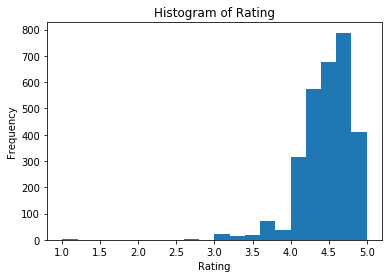

In [38]:
plt.hist(df_copy['rating'].dropna(), bins=20)
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('Histogram of Rating')

Text(0.5, 1.0, 'Histogram of Rating')

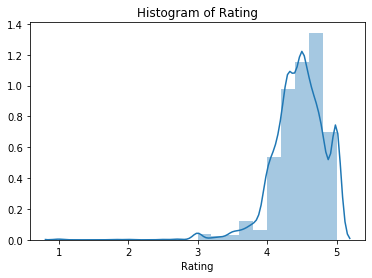

In [39]:
sns.distplot(df_copy['rating'].dropna(), bins=20)
plt.xlabel('Rating')
plt.title('Histogram of Rating')

Below, we can see that strains by their primary type have relatively similar ratings and THC percentages. Furthermore, It appears that the average THC percent is the same for each strain type.

Text(0.5, 0, 'Primary Strain Type')

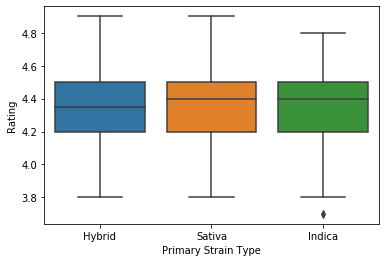

In [40]:
sns.boxplot(x='prim_type', y = 'rating', data=scatter_4)

plt.ylabel('Rating')
plt.xlabel('Primary Strain Type')

Text(0.5, 0, 'Primary Strain Type')

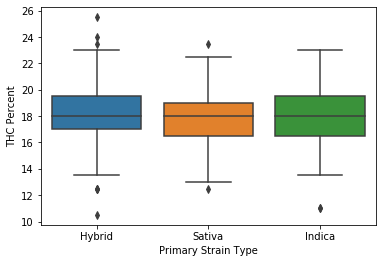

In [41]:
sns.boxplot(x='prim_type', y = 'thc_pct', data=scatter_4)

plt.ylabel('THC Percent')
plt.xlabel('Primary Strain Type')

Next I examined the Pearson correlation values. 

In [42]:
corr_df = df_copy.corr(method='pearson')
corr_df

calm_vs_ener   cbd_pct  n_rate_rvws    rating   thc_pct  \
calm_vs_ener      1.000000  0.222030     0.034753 -0.084189  0.013402   
cbd_pct           0.222030  1.000000    -0.171600  0.263187  0.899434   
n_rate_rvws       0.034753 -0.171600     1.000000 -0.082955 -0.043858   
rating           -0.084189  0.263187    -0.082955  1.000000  0.232534   
thc_pct           0.013402  0.899434    -0.043858  0.232534  1.000000   
relaxed          -0.305603 -0.398397    -0.121703  0.324967 -0.006124   
happy             0.073559 -0.603820    -0.064801  0.214376  0.079071   
euphoric          0.210480 -0.552401     0.000556  0.192545  0.082573   
uplifted          0.410578 -0.466249     0.036416  0.174353  0.138695   
creative          0.508363 -0.720277    -0.008889  0.071376  0.113578   
stress           -0.091782 -0.554510    -0.063814 -0.091174 -0.164385   
depression       -0.154046 -0.628796    -0.087337 -0.019964 -0.154102   
anxiety          -0.191503 -0.626911    -0.031311 -0.001788 -0.175968   
pain             -0.221453 -0.706403    -0.007705  0.023046 -0.131725   
insomnia         -0.301978 -0.607229    -0.087101  0.100107 -0.123762   
dry_mouth        -0.051164 -0.555802     0.051950 -0.320378 -0.022637   
dry_eyes         -0.019387 -0.253966     0.033456 -0.293794 -0.031885   
dizzy             0.071165 -0.080450    -0.041001 -0.330495 -0.019653   
anxious           0.142549 -0.323432     0.038256 -0.364556 -0.023543   
paranoid          0.144334 -0.317083     0.034550 -0.330662 -0.024202   

               relaxed     happy  euphoric  uplifted  creative    stress  \
calm_vs_ener -0.305603  0.073559  0.210480  0.410578  0.508363 -0.091782   
cbd_pct      -0.398397 -0.603820 -0.552401 -0.466249 -0.720277 -0.554510   
n_rate_rvws  -0.121703 -0.064801  0.000556  0.036416 -0.008889 -0.063814   
rating        0.324967  0.214376  0.192545  0.174353  0.071376 -0.091174   
thc_pct      -0.006124  0.079071  0.082573  0.138695  0.113578 -0.164385   
relaxed       1.000000  0.706147  0.569253  0.278871  0.227266  0.450263   
happy         0.706147  1.000000  0.832917  0.542300  0.462521  0.489074   
euphoric      0.569253  0.832917  1.000000  0.691546  0.565465  0.456202   
uplifted      0.278871  0.542300  0.691546  1.000000  0.706385  0.183330   
creative      0.227266  0.462521  0.565465  0.706385  1.000000  0.158564   
stress        0.450263  0.489074  0.456202  0.183330  0.158564  1.000000   
depression    0.467233  0.478978  0.447683  0.175241  0.115967  0.900283   
anxiety       0.486911  0.492870  0.458792  0.153202  0.098102  0.837678   
pain          0.505851  0.511208  0.472305  0.143087  0.089161  0.791213   
insomnia      0.581580  0.527269  0.468672  0.114490  0.091496  0.737560   
dry_mouth     0.280354  0.359058  0.364322  0.140307  0.161179  0.517959   
dry_eyes      0.300834  0.410445  0.411241  0.132298  0.171734  0.550369   
dizzy         0.004702  0.063206  0.069004  0.083375  0.172610  0.181562   
anxious       0.014600  0.102833  0.124525  0.115240  0.210437  0.169111   
paranoid     -0.078170  0.013915  0.050749  0.080839  0.185559  0.051345   

              depression   anxiety      pain  insomnia  dry_mouth  dry_eyes  \
calm_vs_ener   -0.154046 -0.191503 -0.221453 -0.301978  -0.051164 -0.019387   
cbd_pct        -0.628796 -0.626911 -0.706403 -0.607229  -0.555802 -0.253966   
n_rate_rvws    -0.087337 -0.031311 -0.007705 -0.087101   0.051950  0.033456   
rating         -0.019964 -0.001788  0.023046  0.100107  -0.320378 -0.293794   
thc_pct        -0.154102 -0.175968 -0.131725 -0.123762  -0.022637 -0.031885   
relaxed         0.467233  0.486911  0.505851  0.581580   0.280354  0.300834   
happy           0.478978  0.492870  0.511208  0.527269   0.359058  0.410445   
euphoric        0.447683  0.458792  0.472305  0.468672   0.364322  0.411241   
uplifted        0.175241  0.153202  0.143087  0.114490   0.140307  0.132298   
creative        0.115967  0.098102  0.089161  0.091496   0.161179  0.171734   
stress        

In [43]:
corr_df[(corr_df > 0.6) | (corr_df < -0.6)]

calm_vs_ener   cbd_pct  n_rate_rvws  rating   thc_pct   relaxed  \
calm_vs_ener           1.0       NaN          NaN     NaN       NaN       NaN   
cbd_pct                NaN  1.000000          NaN     NaN  0.899434       NaN   
n_rate_rvws            NaN       NaN          1.0     NaN       NaN       NaN   
rating                 NaN       NaN          NaN     1.0       NaN       NaN   
thc_pct                NaN  0.899434          NaN     NaN  1.000000       NaN   
relaxed                NaN       NaN          NaN     NaN       NaN  1.000000   
happy                  NaN -0.603820          NaN     NaN       NaN  0.706147   
euphoric               NaN       NaN          NaN     NaN       NaN       NaN   
uplifted               NaN       NaN          NaN     NaN       NaN       NaN   
creative               NaN -0.720277          NaN     NaN       NaN       NaN   
stress                 NaN       NaN          NaN     NaN       NaN       NaN   
depression             NaN -0.628796          NaN     NaN       NaN       NaN   
anxiety                NaN -0.626911          NaN     NaN       NaN       NaN   
pain                   NaN -0.706403          NaN     NaN       NaN       NaN   
insomnia               NaN -0.607229          NaN     NaN       NaN       NaN   
dry_mouth              NaN       NaN          NaN     NaN       NaN       NaN   
dry_eyes               NaN       NaN          NaN     NaN       NaN       NaN   
dizzy                  NaN       NaN          NaN     NaN       NaN       NaN   
anxious                NaN       NaN          NaN     NaN       NaN       NaN   
paranoid               NaN       NaN          NaN     NaN       NaN       NaN   

                 happy  euphoric  uplifted  creative    stress  depression  \
calm_vs_ener       NaN       NaN       NaN       NaN       NaN         NaN   
cbd_pct      -0.603820       NaN       NaN -0.720277       NaN   -0.628796   
n_rate_rvws        NaN       NaN       NaN       NaN       NaN         NaN   
rating             NaN       NaN       NaN       NaN       NaN         NaN   
thc_pct            NaN       NaN       NaN       NaN       NaN         NaN   
relaxed       0.706147       NaN       NaN       NaN       NaN         NaN   
happy         1.000000  0.832917       NaN       NaN       NaN         NaN   
euphoric      0.832917  1.000000  0.691546       NaN       NaN         NaN   
uplifted           NaN  0.691546  1.000000  0.706385       NaN         NaN   
creative           NaN       NaN  0.706385  1.000000       NaN         NaN   
stress             NaN       NaN       NaN       NaN  1.000000    0.900283   
depression         NaN       NaN       NaN       NaN  0.900283    1.000000   
anxiety            NaN       NaN       NaN       NaN  0.837678    0.900057   
pain               NaN       NaN       NaN       NaN  0.791213    0.834838   
insomnia           NaN       NaN       NaN       NaN  0.737560    0.796538   
dry_mouth          NaN       NaN       NaN       NaN       NaN         NaN   
dry_eyes           NaN       NaN       NaN       NaN       NaN         NaN   
dizzy              NaN       NaN       NaN       NaN       NaN         NaN   
anxious            NaN       NaN       NaN       NaN       NaN         NaN   
paranoid           NaN       NaN       NaN       NaN       NaN         NaN   

               anxiety      pain  insomnia  dry_mouth  dry_eyes     dizzy  \
calm_vs_ener       NaN       NaN       NaN        NaN       NaN       NaN   
cbd_pct      -0.626911 -0.706403 -0.607229        NaN       NaN       NaN   
n_rate_rvws        NaN       NaN       NaN        NaN       NaN       NaN   
rating             NaN       NaN       NaN        NaN       NaN       NaN   
thc_pct            NaN       NaN       NaN        NaN       NaN       NaN   
relaxed            NaN       NaN       NaN        NaN       NaN       NaN   
happy              NaN       NaN       NaN        NaN       NaN       NaN   
euphoric           NaN       NaN       NaN        NaN    

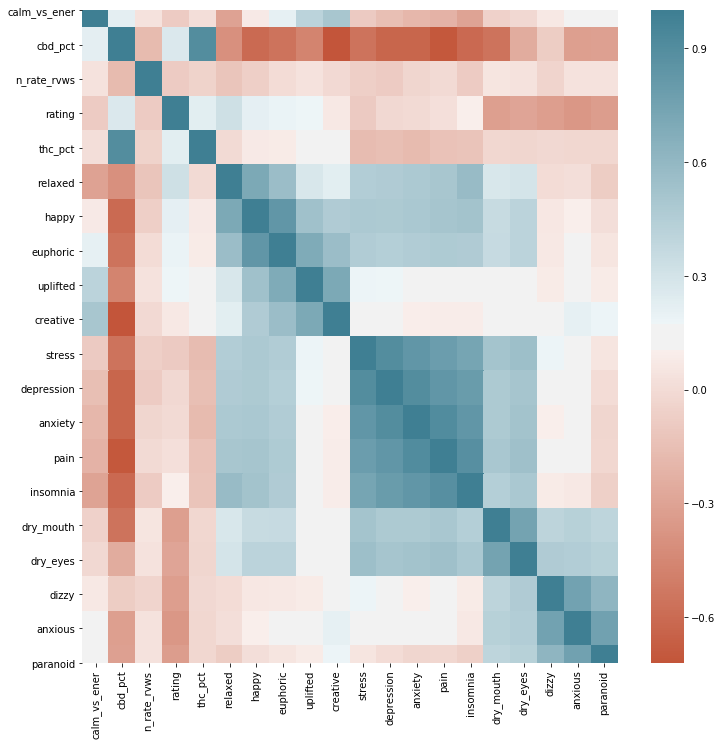

In [44]:
plt.figure(figsize=(12,12))
c_map = sns.diverging_palette(20, 220, n=200, as_cmap=True)
sns.heatmap(corr_df, cmap=c_map)

To make it easier to see values that were more highly correlated according to Pearson's r, I filtered for correlation values greater than 0.6 and less than -0.6. Like I observed above with the scatter plots, the strains that help with stress, depression, anxiety, pain, and insomnia appear to have a relatively strong positive correlation. Although this should be taken with caution due to a low amount of CBD percentage values, it appears to have some strong correlations with THC percent (positively) and creative and pain percentages (negatively). 

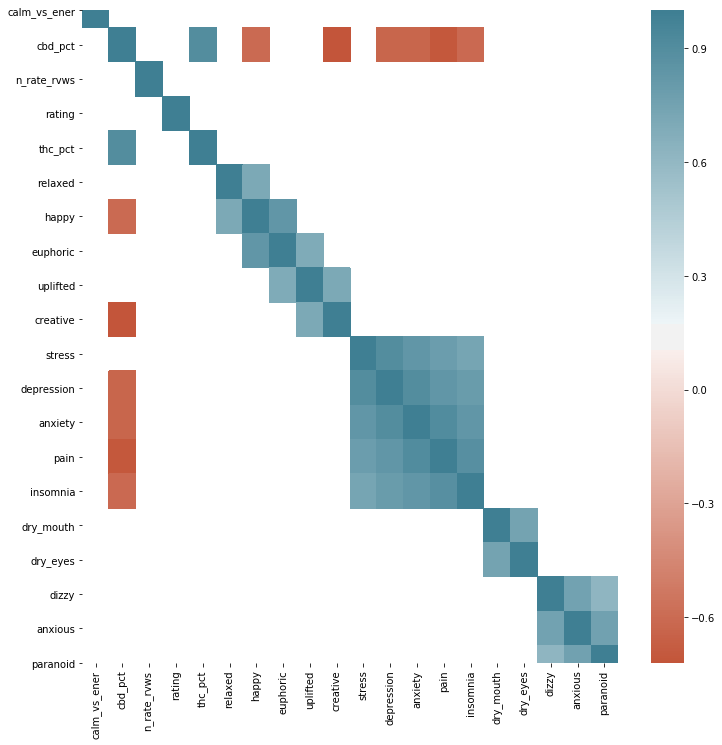

In [45]:
plt.figure(figsize=(12,12))
c_map = sns.diverging_palette(20, 220, n=200, as_cmap=True)
sns.heatmap(corr_df[(corr_df > 0.6) | (corr_df < -0.6)], cmap=c_map)

Here, I briefly explored some linear modeling using Seaborn. This is something I look forward to expanding on in the future. However, we can see similar relationships explored above. For example, hybrid strains seem to have better models that approach a rating of 5 based on strains that help with stress and anxiety percentages. Additionally, we can see the relationship among the strains that help with stress, depression, anxiety, pain, and insomnia.

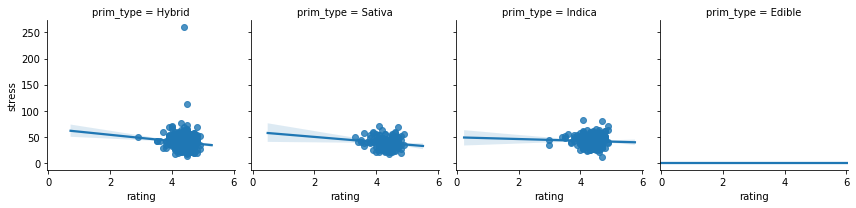

In [46]:
sns.lmplot(x = "rating", y = "stress", data=df_copy, col='prim_type', col_wrap=4, height=3)

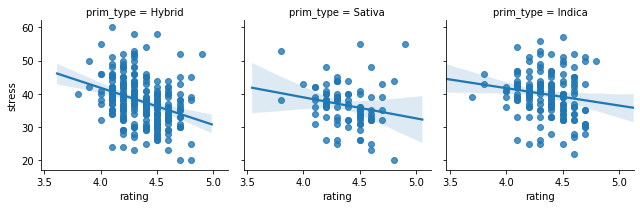

In [47]:
sns.lmplot(x = "rating", y = "stress", data=scatter_4, col='prim_type', col_wrap=3, height=3)

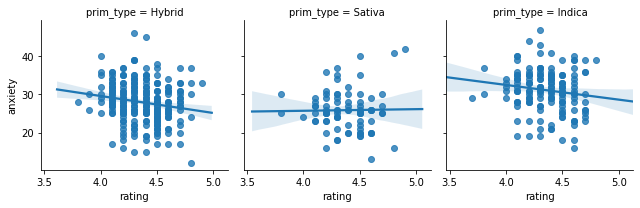

In [48]:
sns.lmplot(x = "rating", y = 'anxiety', data=scatter_4, col='prim_type', col_wrap=3, height=3)

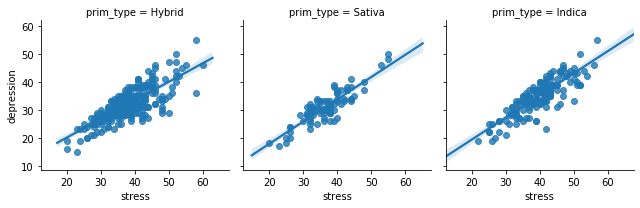

In [49]:
sns.lmplot(x = "stress", y = 'depression', data=scatter_4, col='prim_type', col_wrap=3, height=3)

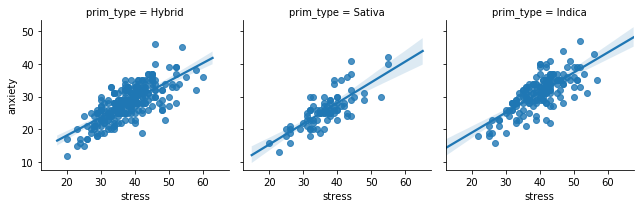

In [50]:
sns.lmplot(x = "stress", y = 'anxiety', data=scatter_4, col='prim_type', col_wrap=3, height=3)

#### Popular Locations

Below, I started to examine the impact of popular locations. First, I had to do some cleaning in order to do analysis. I had to split the strings in the column and I created a new column, `splt_loc` to contain the split values. I also removed NaN values.

In [51]:
df_loc = df_copy.copy()

In [52]:
df_loc['splt_loc'] = df_loc['pop_loc'].str.replace(', ',',').str.split(',')

In [53]:
df_loc['splt_loc'].dropna(0, inplace=True)

In [54]:
df_loc['splt_loc'].shape

(2576,)

Then I created rows based on the original index for each location in the new column. After that I merged the newly created data frame with the original to explore popular locations.

In [57]:
new_lst = []
for index_, item in zip(df_loc.index, df_loc.splt_loc):
    new_lst.extend(map(lambda x: [index_, x], item))

splt_df = pd.DataFrame(new_lst, columns=['index', 'splt_loc'])
splt_df.head()

index  splt_loc
0      0   Seattle
1      0        WA
2      0  Portland
3      0        OR
4      0   Everett

In [58]:
final_loc = pd.merge(df_loc.drop('splt_loc', axis=1), splt_df, how='right', left_index=True, right_on='index')
final_loc.drop('pop_loc', axis=1, inplace=True)
final_loc.shape

(36438, 38)

Here, we can see the popular states but it looks like more cleaning needs to occur. Thus, I modified the according states to match the proper state abbreviation. Additionally there is a column that represents an empty string. Due the scraping unknowns, this was intentionally left. It is possible it may represent different locations because people left it blank in their reviews.

In [59]:
final_loc.splt_loc[1::2].value_counts()

WA               5999
OR               3122
CA               2234
CO               1516
OK               1459
AZ                821
MD                687
MI                522
NV                443
IL                290
ME                236
MA                201
AK                168
FL                139
OH                 70
AR                 42
NC                 36
PR                 29
GA                 29
Co                 22
DC                 22
NM                 16
                   16
TN                 15
ND                 10
Or                  9
Oklahoma            9
Massachusetts       6
Michigan            6
Ca                  5
NJ                  5
Maine               4
MT                  4
HI                  4
PA                  4
VT                  3
TX                  3
Florida             2
co                  2
California          2
DE                  1
Colorado            1
LA                  1
NY                  1
MO                  1
Ok        

In [60]:
final_loc.loc[final_loc['splt_loc'] == 'Oklahoma', 'splt_loc'] = 'OK'

final_loc.loc[final_loc['splt_loc'] == 'Or', 'splt_loc'] = 'OR'

final_loc.loc[final_loc['splt_loc'] == 'Michigan', 'splt_loc'] = 'MI'

final_loc.loc[final_loc['splt_loc'] == 'Massachusetts', 'splt_loc'] = 'MA'

final_loc.loc[final_loc['splt_loc'] == 'Ca', 'splt_loc'] = 'CA'

final_loc.loc[final_loc['splt_loc'] == 'Maine', 'splt_loc'] = 'ME'

final_loc.loc[final_loc['splt_loc'] == 'co', 'splt_loc'] = 'CO'

final_loc.loc[final_loc['splt_loc'] == 'California', 'splt_loc'] = 'CA'

final_loc.loc[final_loc['splt_loc'] == 'Florida', 'splt_loc'] = 'FL'

final_loc.loc[final_loc['splt_loc'] == 'Colorado', 'splt_loc'] = 'CO'

final_loc.loc[final_loc['splt_loc'] == 'Ok', 'splt_loc'] = 'OK'

final_loc.loc[final_loc['splt_loc'] == 'Co', 'splt_loc'] = 'CO'

In [61]:
final_loc.splt_loc[1::2].value_counts()

WA    5999
OR    3131
CA    2241
CO    1541
OK    1469
AZ     821
MD     687
MI     528
NV     443
IL     290
ME     240
MA     207
AK     168
FL     141
OH      70
AR      42
NC      36
PR      29
GA      29
DC      22
NM      16
        16
TN      15
ND      10
NJ       5
PA       4
HI       4
MT       4
VT       3
TX       3
DE       1
MO       1
LA       1
NY       1
KS       1
Name: splt_loc, dtype: int64

Below, we see Washington has the highest number of popular locations by state (including Washington, D.C.) and Seattle had the highest number of popular locations by cities.

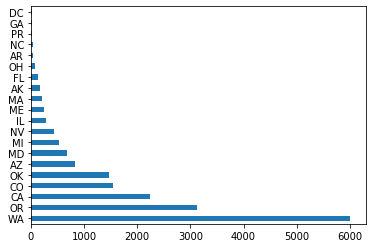

In [62]:
final_loc.splt_loc[1::2].value_counts(sort=True).head(20).plot.barh()

In [63]:
loc_type_counts = final_loc.groupby(['prim_type', 'splt_loc']).size().unstack(fill_value=0)
loc_type_counts

splt_loc       AK  AR   AZ  Aberdeen  Acton  Ada  Addison  Adrian  Afton  ...  \
prim_type                                                                 ...   
Edible      0   0   0    0         0      0    0        0       0      0  ...   
Hybrid     35  93  27  503        20      1   27        2      17      7  ...   
Indica      4  46   4  191         8      1   12        4       6      1  ...   
Sativa      8  29  11  127         3      1    5        2       1      3  ...   

splt_loc   Woodward  Woolwich  Worcester  Wynnewood  Yakima  Yerington  York  \
prim_type                                                                      
Edible            0         0          0          0       0          0     0   
Hybrid            6         2          4          3       2          1     4   
Indica            3         0          1          0       1          2     0   
Sativa            0         1          0          0       0          1     0   

splt_loc   Youngtown  Ypsilanti  Yukon  
prim_type                               
Edible             0          0      0  
Hybrid             5          9      1  
Indica             5          1      0  
Sativa             1          2      0  

[4 rows x 792 columns]

In [64]:
final_loc.splt_loc[::2].value_counts()

Seattle         774
Portland        770
Denver          480
Los Angeles     430
Bellingham      420
               ... 
Yukon             1
Cape Coral        1
Rome              1
Johnson City      1
Hollis            1
Name: splt_loc, Length: 759, dtype: int64

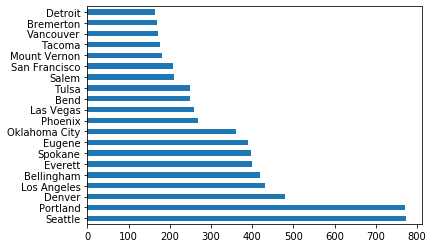

In [65]:
final_loc.splt_loc[::2].value_counts(sort=True).head(20).plot.barh()

Here I grouped the data by popular location and took the average of the rating column to display places that had the highest average rating for strains. Additionally, I grouped the data by location and primary strain type to see what was a popular strain type for that location. 

In [66]:
loc_rate = final_loc.groupby('splt_loc')[['rating']].mean().dropna().sort_values('rating')

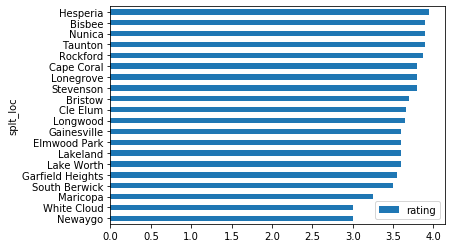

In [67]:
loc_rate.head(20).plot.barh()

In [68]:
loc_type = final_loc.groupby(['splt_loc', 'prim_type'])[['rating']].mean().dropna().sort_values('rating')

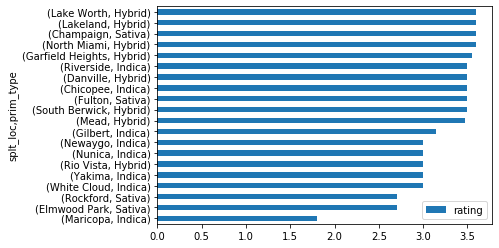

In [69]:
loc_type.head(20).plot.barh()

Lastly, I examined popular strains by locations. While the plots are by no means exhaustive, they provide insight into what strains (and the type) are popular by location.

In [70]:
strain_df = final_loc[['strain','splt_loc', 'rating']]
strain_df

strain    splt_loc  rating
0       Cherry Pie     Seattle     4.3
1       Cherry Pie          WA     4.3
2       Cherry Pie    Portland     4.3
3       Cherry Pie          OR     4.3
4       Cherry Pie     Everett     4.3
...            ...         ...     ...
36433  Cherry Kush          WA     4.1
36434  Cherry Kush    Ferndale     4.1
36435  Cherry Kush          WA     4.1
36436  Cherry Kush  Bellingham     4.1
36437  Cherry Kush          WA     4.1

[36438 rows x 3 columns]

In [71]:
strain_loc_gp = strain_df.groupby('splt_loc')

In [72]:
strain_loc_gp2 = strain_df.groupby(['splt_loc','strain'])

In [73]:
strain_loc_gp2[['strain','rating']].mean().dropna().sort_values('rating')

rating
splt_loc    strain                             
CO          Lemon Berry Candy OG            1.0
CA          Purple Tide                     1.0
Los Angeles Purple Tide                     1.0
Denver      Lemon Berry Candy OG            1.0
Maricopa    Taliban Poison                  1.8
...                                         ...
IL          Spumoni                         5.0
Ritzville   Mountain Temple                 5.0
AZ          Caramel Kona Coffee Cookies     5.0
            Casper OG                       5.0
Santa Ana   Blizzard Bush                   5.0

[23003 rows x 1 columns]

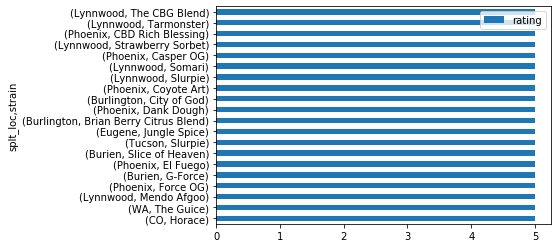

In [74]:
strain_loc_gp2[['strain','rating']].mean().dropna().sort_values('rating', ascending=False).head(20).plot.barh()

In [75]:
strain_df_3 = final_loc[['strain','splt_loc', 'rating','prim_type']]

In [76]:
strain_loc_gp3 = strain_df_3.groupby(['splt_loc','prim_type','strain'])

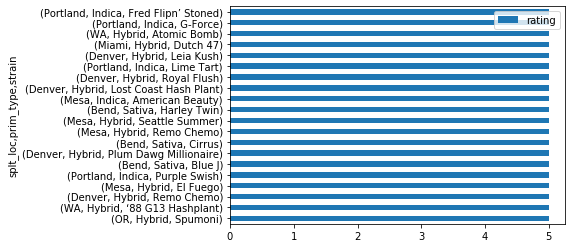

In [77]:
strain_loc_gp3[['rating']].mean().dropna().sort_values('rating', ascending=False).head(20).plot.barh()

In [ ]:
for key, values in strain_loc_gp3:
    print(key) #this indicates the grouping
    print('-'*70)
    print(values) #this is a dataframe for that 
    print('\n')

('', 'Hybrid', 'A-Train')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
30830  A-Train              4.0    Hybrid


('', 'Hybrid', 'Amethyst')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
21080  Amethyst              4.2    Hybrid


('', 'Hybrid', 'Bango')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
16336  Bango              4.8    Hybrid
16337  Bango              4.8    Hybrid


('', 'Hybrid', 'Bootylicious')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
27812  Bootylicious              4.9    Hybrid


('', 'Hybrid', 'Cobbler')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
11852  Cobbler              5.0    Hybrid
11853  Cobbler              5.0    

18471  Shiatsu Kush       AK     4.3    Hybrid


('AK', 'Hybrid', 'Sorbetto')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
24889  Sorbetto       AK     4.8    Hybrid
24895  Sorbetto       AK     4.8    Hybrid


('AK', 'Hybrid', 'Sour Blueberry')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
30027  Sour Blueberry       AK     4.8    Hybrid


('AK', 'Hybrid', 'Sour Headband')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
29455  Sour Headband       AK     4.5    Hybrid


('AK', 'Hybrid', 'Sour Kosher')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
27897  Sour Kosher       AK     4.8    Hybrid
27903  Sour Kosher       AK     4.8    Hybrid


('AK', 'Hybrid', 'Strawberry Diesel')
------------------------------

32477  12 Year OG       AZ     3.0    Hybrid


('AZ', 'Hybrid', '2 Fast 2 Vast')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
33957  2 Fast 2 Vast       AZ     NaN    Hybrid
33971  2 Fast 2 Vast       AZ     NaN    Hybrid


('AZ', 'Hybrid', '541 Kush')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
32899  541 Kush       AZ     5.0    Hybrid


('AZ', 'Hybrid', 'A-Dub')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
30741  A-Dub       AZ     4.5    Hybrid


('AZ', 'Hybrid', 'AK-OG Kush')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
20231  AK-OG Kush       AZ     5.0    Hybrid


('AZ', 'Hybrid', 'Afghan Diesel')
----------------------------------------------------------------------
              strain splt_loc  ratin

3403  Divina Obscura       AZ     4.5    Hybrid


('AZ', 'Hybrid', 'Donna OG')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
16715  Donna OG       AZ     4.6    Hybrid


('AZ', 'Hybrid', 'Dosi Face')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
28409  Dosi Face       AZ     4.2    Hybrid


('AZ', 'Hybrid', 'Double Barrel OG')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
24799  Double Barrel OG       AZ     4.2    Hybrid


('AZ', 'Hybrid', 'Dreamcatcher')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
28699  Dreamcatcher       AZ     4.5    Hybrid
28703  Dreamcatcher       AZ     4.5    Hybrid
28705  Dreamcatcher       AZ     4.5    Hybrid
28711  Dreamcatcher       AZ     4.5    Hybrid


('AZ', 'Hybrid', '

943  Moose Tracks       AZ     3.0    Hybrid


('AZ', 'Hybrid', 'Morockin’ Kush')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
1169  Morockin’ Kush       AZ     NaN    Hybrid


('AZ', 'Hybrid', 'Mr. Tusk')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
16955  Mr. Tusk       AZ     4.5    Hybrid
16965  Mr. Tusk       AZ     4.5    Hybrid


('AZ', 'Hybrid', 'Mt. Hood Magic')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
31593  Mt. Hood Magic       AZ     4.7    Hybrid


('AZ', 'Hybrid', 'Mystery 98')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
22175  Mystery 98       AZ     4.8    Hybrid
22177  Mystery 98       AZ     4.8    Hybrid
22179  Mystery 98       AZ     4.8    Hybrid
22181  Mystery 98       AZ    

3023  Tahoe Frostbite       AZ     5.0    Hybrid


('AZ', 'Hybrid', 'Tahoe OG Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
505  Tahoe OG Kush       AZ     4.4    Hybrid


('AZ', 'Hybrid', 'Tangelo')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
33147  Tangelo       AZ     4.4    Hybrid


('AZ', 'Hybrid', 'Tangerine G13')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
9845  Tangerine G13       AZ     5.0    Hybrid


('AZ', 'Hybrid', 'Thai Fantasy')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
4559  Thai Fantasy       AZ     5.0    Hybrid


('AZ', 'Hybrid', 'The CBG Blend')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
1047  The CBG 

26395  Fucking Incredible       AZ     4.2    Indica


('AZ', 'Indica', 'Funky Monkey')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
30149  Funky Monkey       AZ     4.2    Indica


('AZ', 'Indica', 'GMO Cookies')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
363  GMO Cookies       AZ     4.7    Indica
369  GMO Cookies       AZ     4.7    Indica
373  GMO Cookies       AZ     4.7    Indica


('AZ', 'Indica', "God's Treat")
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
12183  God's Treat       AZ     4.2    Indica


('AZ', 'Indica', 'Government Mule')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
5083  Government Mule       AZ     4.0    Indica
5085  Government Mule       AZ     4.0    Indica
5087  Governm

28931  Hawaiian Dream       AZ     4.5    Sativa


('AZ', 'Sativa', 'Hawaiian Mayan Gold')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
13071  Hawaiian Mayan Gold       AZ     4.8    Sativa
13073  Hawaiian Mayan Gold       AZ     4.8    Sativa
13075  Hawaiian Mayan Gold       AZ     4.8    Sativa
13077  Hawaiian Mayan Gold       AZ     4.8    Sativa
13081  Hawaiian Mayan Gold       AZ     4.8    Sativa
13085  Hawaiian Mayan Gold       AZ     4.8    Sativa
13087  Hawaiian Mayan Gold       AZ     4.8    Sativa


('AZ', 'Sativa', 'Hawai’i ‘78')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
1779  Hawai’i ‘78       AZ     4.8    Sativa


('AZ', 'Sativa', 'Island Haze')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
13577  Island Haze       AZ     4.8    Sativa
13579  Island 

7148  Black Label      Ada     4.0    Hybrid


('Ada', 'Hybrid', 'Black Magic')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
11536  Black Magic      Ada     4.7    Hybrid


('Ada', 'Hybrid', 'Bloodwalker')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
19486  Bloodwalker      Ada     4.7    Hybrid


('Ada', 'Hybrid', 'Blue Ivy')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
25302  Blue Ivy      Ada     4.3    Hybrid


('Ada', 'Hybrid', 'Brian Berry Cough')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
17874  Brian Berry Cough      Ada     4.5    Hybrid


('Ada', 'Hybrid', 'Cali Orange Bud')
----------------------------------------------------------------------
               strain splt_loc  rating prim_

29168  Chem's Sister   Adrian     4.5    Sativa


('Afton', 'Hybrid', 'Bubba x Skunk')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
14522  Bubba x Skunk    Afton     5.0    Hybrid


('Afton', 'Hybrid', 'City of God')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
7192  City of God    Afton     5.0    Hybrid


('Afton', 'Hybrid', 'Dr. Feelgood')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
12892  Dr. Feelgood    Afton     4.3    Hybrid


('Afton', 'Hybrid', 'Mighty Glue')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
12830  Mighty Glue    Afton     4.0    Hybrid


('Afton', 'Hybrid', 'Oregon Pineapple')
----------------------------------------------------------------------
                 strain splt_loc

20162  Grape Skunk   Albany     4.1    Indica


('Albany', 'Indica', 'Green Dragon')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
31236  Green Dragon   Albany     4.1    Indica


('Albany', 'Indica', 'Martian Muffins')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
3768  Martian Muffins   Albany     4.0    Indica


('Albany', 'Indica', 'Mother of All Cherries')
----------------------------------------------------------------------
                       strain splt_loc  rating prim_type
20970  Mother of All Cherries   Albany     4.7    Indica


('Albany', 'Indica', 'Popcorn Kush')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
26824  Popcorn Kush   Albany     4.0    Indica


('Albany', 'Indica', 'Purple Bubba')
--------------------------------------------------------------

28094  Amherst Sour Diesel  Anacortes     4.7    Hybrid


('Anacortes', 'Hybrid', 'Apple Fritter')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
582  Apple Fritter  Anacortes     4.7    Hybrid


('Anacortes', 'Hybrid', 'Apricot Jelly')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
20186  Apricot Jelly  Anacortes     4.3    Hybrid


('Anacortes', 'Hybrid', 'Banana Peel')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
12252  Banana Peel  Anacortes     4.7    Hybrid


('Anacortes', 'Hybrid', 'Big Band')
----------------------------------------------------------------------
        strain   splt_loc  rating prim_type
9438  Big Band  Anacortes     4.7    Hybrid


('Anacortes', 'Hybrid', 'Big Holy Nina')
----------------------------------------------------------------------
 

34984  Air Jordan OG  Anacortes     4.7    Indica


('Anacortes', 'Indica', 'B-52')
----------------------------------------------------------------------
      strain   splt_loc  rating prim_type
31470   B-52  Anacortes     4.2    Indica


('Anacortes', 'Indica', 'Berries & Crème')
----------------------------------------------------------------------
                strain   splt_loc  rating prim_type
11970  Berries & Crème  Anacortes     5.0    Indica


('Anacortes', 'Indica', 'Blue Alien')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
31954  Blue Alien  Anacortes     4.5    Indica


('Anacortes', 'Indica', 'Colorado Clementines')
----------------------------------------------------------------------
                    strain   splt_loc  rating prim_type
5164  Colorado Clementines  Anacortes     4.4    Indica


('Anacortes', 'Indica', 'Confidential Cheese')
------------------------------------------------------

14246  Lemon Fire  Anchorage     4.6    Hybrid


('Anchorage', 'Hybrid', 'Majestic 12')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
5262  Majestic 12  Anchorage     4.8    Hybrid


('Anchorage', 'Hybrid', 'Martian Mean Green')
----------------------------------------------------------------------
                   strain   splt_loc  rating prim_type
34144  Martian Mean Green  Anchorage     3.9    Hybrid


('Anchorage', 'Hybrid', 'Moon Cookies')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
17974  Moon Cookies  Anchorage     4.8    Hybrid


('Anchorage', 'Hybrid', 'Motown Lockdown')
----------------------------------------------------------------------
               strain   splt_loc  rating prim_type
1582  Motown Lockdown  Anchorage     4.0    Hybrid


('Anchorage', 'Hybrid', 'Mt. Hood Magic')
---------------------------------------------

7490  Devil  Ann Arbor     NaN    Hybrid


('Ann Arbor', 'Hybrid', 'Euphoria Cookies')
----------------------------------------------------------------------
                 strain   splt_loc  rating prim_type
12834  Euphoria Cookies  Ann Arbor     5.0    Hybrid


('Ann Arbor', 'Hybrid', 'Forum Cut Cookies')
----------------------------------------------------------------------
                  strain   splt_loc  rating prim_type
28130  Forum Cut Cookies  Ann Arbor     4.6    Hybrid


('Ann Arbor', 'Hybrid', 'Future')
----------------------------------------------------------------------
       strain   splt_loc  rating prim_type
27438  Future  Ann Arbor     4.8    Hybrid


('Ann Arbor', 'Hybrid', 'Good Medicine')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
16676  Good Medicine  Ann Arbor     4.3    Hybrid


('Ann Arbor', 'Hybrid', 'Gunslinger')
---------------------------------------------------------------

35876  Double Dream    Aptos     4.4    Hybrid


('Aptos', 'Hybrid', 'Kush Cleaner')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
5608  Kush Cleaner    Aptos     4.6    Hybrid


('Aptos', 'Hybrid', 'Marcosus Marshmellow')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
18964  Marcosus Marshmellow    Aptos     4.1    Hybrid


('Aptos', 'Hybrid', 'Medusa')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
31644  Medusa    Aptos     4.0    Hybrid


('Aptos', 'Hybrid', 'Mystery Jazz')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
7662  Mystery Jazz    Aptos     5.0    Hybrid


('Aptos', 'Hybrid', 'Odyssey')
----------------------------------------------------------------------
        strain splt_loc  rating pri

7322  Redd Cross  Arlington     4.8    Hybrid


('Arlington', 'Hybrid', 'Rene Mist')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
3630  Rene Mist  Arlington     3.3    Hybrid


('Arlington', 'Hybrid', 'Rug Burn OG')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
28220  Rug Burn OG  Arlington     4.4    Hybrid


('Arlington', 'Hybrid', 'Sorbetto')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
24898  Sorbetto  Arlington     4.8    Hybrid


('Arlington', 'Hybrid', 'Stinky Pete')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
11404  Stinky Pete  Arlington     4.8    Hybrid


('Arlington', 'Hybrid', 'Sugar Pine')
----------------------------------------------------------------------
          strain   splt_loc 

11552  Super Sweet   Arvada     4.7    Hybrid


('Arvada', 'Hybrid', 'Sweet Dream')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
5228  Sweet Dream   Arvada     4.4    Hybrid


('Arvada', 'Hybrid', 'Sweet Pure CBD')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
6472  Sweet Pure CBD   Arvada     4.5    Hybrid


('Arvada', 'Hybrid', 'Tillamook Strawberry')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
26010  Tillamook Strawberry   Arvada     4.5    Hybrid


('Arvada', 'Hybrid', 'Tina Danza')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
13012  Tina Danza   Arvada     4.7    Hybrid


('Arvada', 'Hybrid', 'Versace')
----------------------------------------------------------------------
        strain s

30084  White Fire Alien OG  Ashland     4.4    Hybrid


('Ashland', 'Hybrid', 'White Ryder')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
2448  White Ryder  Ashland     NaN    Hybrid


('Ashland', 'Indica', 'Afghani CBD')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
22072  Afghani CBD  Ashland     4.6    Indica


('Ashland', 'Indica', 'Blackberry Bubble')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
6344  Blackberry Bubble  Ashland     4.7    Indica


('Ashland', 'Indica', 'Blue Dynamite')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
23682  Blue Dynamite  Ashland     4.3    Indica


('Ashland', 'Indica', 'Bubba OG')
----------------------------------------------------------------------
         st

11882  Medibud  Astoria     4.5    Hybrid


('Astoria', 'Hybrid', 'Mendo Montage')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
34820  Mendo Montage  Astoria     5.0    Hybrid


('Astoria', 'Hybrid', 'Mission Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
9146  Mission Kush  Astoria     4.3    Hybrid


('Astoria', 'Hybrid', 'Montana Silvertip')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
26126  Montana Silvertip  Astoria     4.5    Hybrid


('Astoria', 'Hybrid', 'Motown Lockdown')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
1572  Motown Lockdown  Astoria     4.0    Hybrid


('Astoria', 'Hybrid', 'Northern Skunk')
----------------------------------------------------------------------
  

5822  Royal Chemdawg   Auburn     4.4    Hybrid


('Auburn', 'Hybrid', 'SFV OG')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
1310  SFV OG   Auburn     4.4    Hybrid


('Auburn', 'Hybrid', 'Shark Widow')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
4152  Shark Widow   Auburn     5.0    Hybrid


('Auburn', 'Hybrid', 'Slice of Heaven')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
3836  Slice of Heaven   Auburn     5.0    Hybrid


('Auburn', 'Hybrid', 'Soraya')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
2916  Soraya   Auburn     NaN    Hybrid


('Auburn', 'Hybrid', 'Strawberry Snow Cone')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
2

16232  Venus OG   Aurora     4.8    Hybrid


('Aurora', 'Hybrid', 'Walker Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
31630  Walker Kush   Aurora     4.6    Hybrid


('Aurora', 'Hybrid', 'Warlock')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
29658  Warlock   Aurora     4.0    Hybrid


('Aurora', 'Hybrid', 'White Dawg Fire OG')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
9576  White Dawg Fire OG   Aurora     5.0    Hybrid


('Aurora', 'Hybrid', 'White Super Skunk')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
4816  White Super Skunk   Aurora     4.0    Hybrid


('Aurora', 'Indica', 'Afghani CBD')
----------------------------------------------------------------------
            strain sp

24440  Alaska Thunder Grape  Baltimore     4.2    Hybrid


('Baltimore', 'Hybrid', 'Alley Cat Kush')
----------------------------------------------------------------------
               strain   splt_loc  rating prim_type
16724  Alley Cat Kush  Baltimore     5.0    Hybrid


('Baltimore', 'Hybrid', 'Amherst Sour Diesel')
----------------------------------------------------------------------
                    strain   splt_loc  rating prim_type
28096  Amherst Sour Diesel  Baltimore     4.7    Hybrid


('Baltimore', 'Hybrid', 'Belladonna')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
25406  Belladonna  Baltimore     4.0    Hybrid


('Baltimore', 'Hybrid', 'Birthday Cake Kush')
----------------------------------------------------------------------
                 strain   splt_loc  rating prim_type
536  Birthday Cake Kush  Baltimore     4.5    Hybrid


('Baltimore', 'Hybrid', 'Blue Velvet')
-----------------------

18164  Aloha  Baltimore     3.9    Sativa


('Baltimore', 'Sativa', 'Atomical Haze')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
21248  Atomical Haze  Baltimore     4.4    Sativa


('Baltimore', 'Sativa', 'Blucifer')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
31068  Blucifer  Baltimore     4.3    Sativa


('Baltimore', 'Sativa', 'Blueberry Dream')
----------------------------------------------------------------------
                strain   splt_loc  rating prim_type
30986  Blueberry Dream  Baltimore     4.6    Sativa


('Baltimore', 'Sativa', 'C13 Haze')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
15864  C13 Haze  Baltimore     4.4    Sativa


('Baltimore', 'Sativa', 'Dance World')
----------------------------------------------------------------------
            st

24468  Mandarin TK  Battle Creek     5.0    Hybrid


('Battle Creek', 'Hybrid', 'Spice')
----------------------------------------------------------------------
      strain      splt_loc  rating prim_type
11712  Spice  Battle Creek     5.0    Hybrid


('Battle Creek', 'Hybrid', 'Strawberry Cake')
----------------------------------------------------------------------
                strain      splt_loc  rating prim_type
31440  Strawberry Cake  Battle Creek     4.8    Hybrid


('Battle Creek', 'Hybrid', 'White Zombie')
----------------------------------------------------------------------
             strain      splt_loc  rating prim_type
18574  White Zombie  Battle Creek     4.0    Hybrid


('Battle Creek', 'Indica', '999')
----------------------------------------------------------------------
      strain      splt_loc  rating prim_type
17960    999  Battle Creek     4.3    Indica


('Battle Creek', 'Indica', 'Alpine Star')
------------------------------------------------------------

33552  Hollywood OG  Beaverton     4.3    Hybrid


('Beaverton', 'Hybrid', 'Ice Kush')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
14726  Ice Kush  Beaverton     5.0    Hybrid


('Beaverton', 'Hybrid', 'Jack Haze')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
28482  Jack Haze  Beaverton     4.0    Hybrid


('Beaverton', 'Hybrid', 'K1')
----------------------------------------------------------------------
      strain   splt_loc  rating prim_type
14898     K1  Beaverton     3.9    Hybrid


('Beaverton', 'Hybrid', 'KC 33')
----------------------------------------------------------------------
      strain   splt_loc  rating prim_type
34342  KC 33  Beaverton     4.4    Hybrid


('Beaverton', 'Hybrid', 'Kahavvai Mode')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
4252  Kaha

12918  Rocky Mountain Blueberry  Beaverton     4.5    Indica


('Beaverton', 'Indica', 'Seattle Blue')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
4914  Seattle Blue  Beaverton     4.1    Indica


('Beaverton', 'Indica', 'Star Berry Indica')
----------------------------------------------------------------------
                  strain   splt_loc  rating prim_type
35002  Star Berry Indica  Beaverton     4.6    Indica


('Beaverton', 'Indica', 'Stephen Hawking Kush')
----------------------------------------------------------------------
                     strain   splt_loc  rating prim_type
31902  Stephen Hawking Kush  Beaverton     4.6    Indica


('Beaverton', 'Indica', 'Sweet Baby Jane')
----------------------------------------------------------------------
               strain   splt_loc  rating prim_type
7830  Sweet Baby Jane  Beaverton     4.3    Indica


('Beaverton', 'Indica', 'Sweet Deep Grapefruit')


28204  Grapefruit Haze  Belfast     4.1    Sativa


('Belfast', 'Sativa', 'Sour Breath')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
13350  Sour Breath  Belfast     4.1    Sativa


('Bellevue', 'Hybrid', 'Blueberry Bomb')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
6930  Blueberry Bomb  Bellevue     3.8    Hybrid


('Bellevue', 'Hybrid', 'Bright Puff')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
2748  Bright Puff  Bellevue     NaN    Hybrid


('Bellevue', 'Hybrid', 'Critical')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
18132  Critical  Bellevue     4.7    Hybrid


('Bellevue', 'Hybrid', 'Dr. Feelgood')
----------------------------------------------------------------------
             strain  splt

3496  Cougar Milk  Bellingham     5.0    Hybrid


('Bellingham', 'Hybrid', 'Cowboy Kush')
----------------------------------------------------------------------
            strain    splt_loc  rating prim_type
32438  Cowboy Kush  Bellingham     4.7    Hybrid


('Bellingham', 'Hybrid', 'Critical Jack')
----------------------------------------------------------------------
              strain    splt_loc  rating prim_type
35212  Critical Jack  Bellingham     4.2    Hybrid


('Bellingham', 'Hybrid', 'Critters Cookies')
----------------------------------------------------------------------
                strain    splt_loc  rating prim_type
2518  Critters Cookies  Bellingham     3.8    Hybrid


('Bellingham', 'Hybrid', "Dawg's Waltz")
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
19624  Dawg's Waltz  Bellingham     4.5    Hybrid


('Bellingham', 'Hybrid', 'Day Tripper')
--------------------------------------------

34654  Mike Larry  Bellingham     NaN    Hybrid


('Bellingham', 'Hybrid', 'Moby Dick 2.0')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
2890  Moby Dick 2.0  Bellingham     5.0    Hybrid


('Bellingham', 'Hybrid', 'Monkey Mints')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
976  Monkey Mints  Bellingham     NaN    Hybrid


('Bellingham', 'Hybrid', 'Monkey Thunder')
----------------------------------------------------------------------
              strain    splt_loc  rating prim_type
4802  Monkey Thunder  Bellingham     4.3    Hybrid


('Bellingham', 'Hybrid', 'Moon Drops')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
11312  Moon Drops  Bellingham     4.6    Hybrid


('Bellingham', 'Hybrid', 'Moonbow')
---------------------------------------------------------------

28834  Tangerine Power  Bellingham     4.4    Hybrid


('Bellingham', 'Hybrid', 'Tangie Dream')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
33342  Tangie Dream  Bellingham     4.4    Hybrid


('Bellingham', 'Hybrid', 'Tarmonster')
----------------------------------------------------------------------
          strain    splt_loc  rating prim_type
3416  Tarmonster  Bellingham     5.0    Hybrid


('Bellingham', 'Hybrid', 'Terpwin Station')
----------------------------------------------------------------------
                strain    splt_loc  rating prim_type
11394  Terpwin Station  Bellingham     3.5    Hybrid


('Bellingham', 'Hybrid', 'Thai Lights')
----------------------------------------------------------------------
            strain    splt_loc  rating prim_type
25430  Thai Lights  Bellingham     4.7    Hybrid


('Bellingham', 'Hybrid', 'The Flav')
------------------------------------------------------

34952  Pink Sunset  Bellingham     4.6    Indica


('Bellingham', 'Indica', 'Pluto Kush')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
19048  Pluto Kush  Bellingham     4.2    Indica


('Bellingham', 'Indica', 'Presidential OG')
----------------------------------------------------------------------
                strain    splt_loc  rating prim_type
35848  Presidential OG  Bellingham     4.4    Indica


('Bellingham', 'Indica', 'Primus')
----------------------------------------------------------------------
       strain    splt_loc  rating prim_type
30186  Primus  Bellingham     4.7    Indica


('Bellingham', 'Indica', 'Punky Lion')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
22582  Punky Lion  Bellingham     4.2    Indica


('Bellingham', 'Indica', 'Pure Love')
----------------------------------------------------------------------
     

33536  Royal Haze  Bellingham     4.6    Sativa


('Bellingham', 'Sativa', 'Royal Salute')
----------------------------------------------------------------------
            strain    splt_loc  rating prim_type
2230  Royal Salute  Bellingham     NaN    Sativa


('Bellingham', 'Sativa', 'Russian Doll')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
14144  Russian Doll  Bellingham     4.8    Sativa


('Bellingham', 'Sativa', 'Santa Sativa')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
34796  Santa Sativa  Bellingham     4.7    Sativa


('Bellingham', 'Sativa', 'Sequoia Strawberry')
----------------------------------------------------------------------
                   strain    splt_loc  rating prim_type
30326  Sequoia Strawberry  Bellingham     4.5    Sativa


('Bellingham', 'Sativa', 'Shining Silver Haze')
------------------------------

24788  Double Barrel OG     Bend     4.2    Hybrid


('Bend', 'Hybrid', 'Double Tangie Banana')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
35194  Double Tangie Banana     Bend     4.5    Hybrid


('Bend', 'Hybrid', 'Dreamtime')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
2870  Dreamtime     Bend     5.0    Hybrid


('Bend', 'Hybrid', 'Dutch Dynasty')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
3912  Dutch Dynasty     Bend     5.0    Hybrid


('Bend', 'Hybrid', 'Easy Bud')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
6434  Easy Bud     Bend     4.8    Hybrid


('Bend', 'Hybrid', 'Emperor Cookie Dough')
----------------------------------------------------------------------
                     stra

26566  Sour Alien     Bend     4.3    Hybrid


('Bend', 'Hybrid', 'Sour Sunset')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
25746  Sour Sunset     Bend     4.7    Hybrid


('Bend', 'Hybrid', 'Sour Tsunami')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
36294  Sour Tsunami     Bend     4.4    Hybrid


('Bend', 'Hybrid', 'Strawberry Cake')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
31444  Strawberry Cake     Bend     4.8    Hybrid


('Bend', 'Hybrid', 'Strawberry Dream')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
19810  Strawberry Dream     Bend     4.3    Hybrid


('Bend', 'Hybrid', 'Sugar Shack')
----------------------------------------------------------------------
            strain spl

20074  Purple Zkittlez     Bend     4.7    Indica


('Bend', 'Indica', 'Queen Mother Goji')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
26162  Queen Mother Goji     Bend     4.9    Indica


('Bend', 'Indica', 'Sensi Skunk')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
22790  Sensi Skunk     Bend     4.3    Indica


('Bend', 'Indica', 'Shark Attack')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
25474  Shark Attack     Bend     4.5    Indica


('Bend', 'Indica', 'Sour Ape')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
5134  Sour Ape     Bend     4.2    Indica


('Bend', 'Indica', 'Special Kush #1')
----------------------------------------------------------------------
                strain splt_loc  

21882  Cherry Vanilla Cookies  Berkeley     4.8    Hybrid


('Berkeley', 'Hybrid', 'Flavour Pack')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
10126  Flavour Pack  Berkeley     NaN    Hybrid


('Berkeley', 'Hybrid', 'Holy Ghost')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
12420  Holy Ghost  Berkeley     4.6    Hybrid


('Berkeley', 'Hybrid', 'Purple Ice')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
21144  Purple Ice  Berkeley     4.3    Hybrid


('Berkeley', 'Hybrid', 'The Mountain')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
4108  The Mountain  Berkeley     NaN    Hybrid


('Berkeley', 'Indica', 'Kreamy Karamel')
----------------------------------------------------------------------
          

5208  Puna Buddaz  Biddeford     5.0    Indica


('Biddeford', 'Indica', 'Russian Assassin')
----------------------------------------------------------------------
                 strain   splt_loc  rating prim_type
22552  Russian Assassin  Biddeford     4.8    Indica


('Biddeford', 'Indica', 'Wembley')
----------------------------------------------------------------------
       strain   splt_loc  rating prim_type
8016  Wembley  Biddeford     4.7    Indica


('Biddeford', 'Sativa', 'Kona Gold')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
19504  Kona Gold  Biddeford     4.5    Sativa


('Biddeford', 'Sativa', 'Mexican')
----------------------------------------------------------------------
        strain   splt_loc  rating prim_type
28506  Mexican  Biddeford     3.5    Sativa


('Billings', 'Hybrid', 'Khyber Kush')
----------------------------------------------------------------------
           strain  splt_loc

15966  Strawberry Alien Kush   Blythe     4.3    Hybrid


('Blythe', 'Hybrid', 'Tropicana Punch')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
31970  Tropicana Punch   Blythe     4.8    Hybrid


('Blythe', 'Hybrid', 'Whiteout')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
19290  Whiteout   Blythe     4.7    Hybrid


('Blythe', 'Indica', '303 OG')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
27228  303 OG   Blythe     4.1    Indica


('Blythe', 'Indica', 'Appleberry')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
17246  Appleberry   Blythe     4.7    Indica


('Blythe', 'Indica', 'Hannibal Nectar')
----------------------------------------------------------------------
               strain splt_loc  rating pri

630  Lemon OZ  Bothell     NaN    Hybrid


('Bothell', 'Hybrid', 'Maramota #10')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
7134  Maramota #10  Bothell     4.7    Hybrid


('Bothell', 'Hybrid', 'Master Yoda')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
26026  Master Yoda  Bothell     4.5    Hybrid


('Bothell', 'Hybrid', 'Morning Flight')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
2724  Morning Flight  Bothell     NaN    Hybrid


('Bothell', 'Hybrid', 'NukeHeads')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
11108  NukeHeads  Bothell     4.1    Hybrid


('Bothell', 'Hybrid', 'OGDLUX')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
1154

17876  Brian Berry Cough  Boulder     4.5    Hybrid


('Boulder', 'Hybrid', 'Bright Moments')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
7982  Bright Moments  Boulder     4.6    Hybrid


('Boulder', 'Hybrid', 'Cannadential')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
7968  Cannadential  Boulder     3.9    Hybrid


('Boulder', 'Hybrid', 'Cataract Kush')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
27230  Cataract Kush  Boulder     4.3    Hybrid


('Boulder', 'Hybrid', 'Daybreaker')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
3236  Daybreaker  Boulder     NaN    Hybrid


('Boulder', 'Hybrid', 'Diabla')
----------------------------------------------------------------------
      strain splt_loc  rat

28120  Blueberry AK  Bremerton     4.7    Hybrid


('Bremerton', 'Hybrid', 'Blueberry Bomb')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
6934  Blueberry Bomb  Bremerton     3.8    Hybrid


('Bremerton', 'Hybrid', 'Blueberry Silvertip')
----------------------------------------------------------------------
                    strain   splt_loc  rating prim_type
14318  Blueberry Silvertip  Bremerton     4.5    Hybrid


('Bremerton', 'Hybrid', 'Boss Hogg')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
29616  Boss Hogg  Bremerton     4.5    Hybrid


('Bremerton', 'Hybrid', 'Bubba Tom Hayes')
----------------------------------------------------------------------
               strain   splt_loc  rating prim_type
7590  Bubba Tom Hayes  Bremerton     4.8    Hybrid


('Bremerton', 'Hybrid', 'C4')
----------------------------------------------------

19526  Space Cream  Bremerton     4.8    Hybrid


('Bremerton', 'Hybrid', 'Star 47')
----------------------------------------------------------------------
       strain   splt_loc  rating prim_type
8802  Star 47  Bremerton     4.3    Hybrid


('Bremerton', 'Hybrid', 'Starry Night')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
22872  Starry Night  Bremerton     4.6    Hybrid


('Bremerton', 'Hybrid', 'Strawberry Diesel')
----------------------------------------------------------------------
                  strain   splt_loc  rating prim_type
35680  Strawberry Diesel  Bremerton     4.3    Hybrid


('Bremerton', 'Hybrid', 'Sweet Purple')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
5896  Sweet Purple  Bremerton     NaN    Hybrid


('Bremerton', 'Hybrid', 'Tarmonster')
----------------------------------------------------------------------
 

18390  Star Pupil   Brewer     4.6    Hybrid


('Brewer', 'Hybrid', 'Strawberry Switchblade')
----------------------------------------------------------------------
                       strain splt_loc  rating prim_type
36206  Strawberry Switchblade   Brewer     4.9    Hybrid


('Brewer', 'Hybrid', 'Truth Serum')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
16370  Truth Serum   Brewer     3.8    Hybrid


('Brewer', 'Indica', 'Angel OG')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
28950  Angel OG   Brewer     4.7    Indica


('Brewer', 'Indica', 'Northern Berry')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
31758  Northern Berry   Brewer     4.5    Indica


('Brewer', 'Indica', 'Sugar Plum Sunset')
----------------------------------------------------------------------
   

11570  Bangi Haze  Brunswick     5.0    Sativa


('Brunswick', 'Sativa', 'Grapefruit Haze')
----------------------------------------------------------------------
                strain   splt_loc  rating prim_type
28208  Grapefruit Haze  Brunswick     4.1    Sativa


('Buchanan', 'Hybrid', 'Gunslinger')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
28676  Gunslinger  Buchanan     5.0    Hybrid


('Buchanan', 'Hybrid', 'Starry Night')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
22874  Starry Night  Buchanan     4.6    Hybrid


('Buchanan', 'Sativa', 'Canna-Wreck')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
1896  Canna-Wreck  Buchanan     4.3    Sativa


('Buckley', 'Hybrid', 'Alien Breath')
----------------------------------------------------------------------
         

27836  Orange Dream  Bullhead City     4.2    Hybrid


('Bullhead City', 'Hybrid', 'Sour Kosher')
----------------------------------------------------------------------
            strain       splt_loc  rating prim_type
27900  Sour Kosher  Bullhead City     4.8    Hybrid


('Bullhead City', 'Hybrid', 'Tropicana Punch')
----------------------------------------------------------------------
                strain       splt_loc  rating prim_type
31976  Tropicana Punch  Bullhead City     4.8    Hybrid


('Bullhead City', 'Indica', 'Critical Plus 2.0')
----------------------------------------------------------------------
                  strain       splt_loc  rating prim_type
28084  Critical Plus 2.0  Bullhead City     4.4    Indica


('Burien', 'Hybrid', 'Apple Fritter')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
584  Apple Fritter   Burien     4.7    Hybrid


('Burien', 'Hybrid', 'Black Raspberry')
------------

29760  Velvet Bud   Burton     4.2    Sativa


('Burtonsville', 'Hybrid', 'Dr. Clemenstein')
----------------------------------------------------------------------
               strain      splt_loc  rating prim_type
4158  Dr. Clemenstein  Burtonsville     NaN    Hybrid


('Burtonsville', 'Hybrid', 'Magic Melon')
----------------------------------------------------------------------
            strain      splt_loc  rating prim_type
30646  Magic Melon  Burtonsville     4.7    Hybrid


('Burtonsville', 'Hybrid', 'Prismatic Jack')
----------------------------------------------------------------------
              strain      splt_loc  rating prim_type
3924  Prismatic Jack  Burtonsville     NaN    Hybrid


('Burtonsville', 'Hybrid', 'Strawberry Gum')
----------------------------------------------------------------------
              strain      splt_loc  rating prim_type
7174  Strawberry Gum  Burtonsville     NaN    Hybrid


('Burtonsville', 'Hybrid', 'White Master')
------------------

10477  Black Fire       CA     4.0    Hybrid


('CA', 'Hybrid', 'Black Haze')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
33873  Black Haze       CA     4.4    Hybrid
33877  Black Haze       CA     4.4    Hybrid
33883  Black Haze       CA     4.4    Hybrid


('CA', 'Hybrid', 'Black Lotus')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
12163  Black Lotus       CA     4.5    Hybrid
12179  Black Lotus       CA     4.5    Hybrid


('CA', 'Hybrid', 'Black Velvet')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
13819  Black Velvet       CA     4.0    Hybrid
13827  Black Velvet       CA     4.0    Hybrid


('CA', 'Hybrid', 'Black Widow')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
36335  Black Widow       CA   

1283  Cherry Kiss       CA     NaN    Hybrid


('CA', 'Hybrid', 'Cherry Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
36429  Cherry Kush       CA     4.1    Hybrid


('CA', 'Hybrid', 'Cherry Sherbet')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
18895  Cherry Sherbet       CA     4.3    Hybrid


('CA', 'Hybrid', 'Cherry Vanilla Cookies')
----------------------------------------------------------------------
                       strain splt_loc  rating prim_type
21883  Cherry Vanilla Cookies       CA     4.8    Hybrid


('CA', 'Hybrid', 'Cheshire Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
829  Cheshire Kush       CA     NaN    Hybrid


('CA', 'Hybrid', 'Chocoholic')
----------------------------------------------------------------------
          strain sp

9817  Early Lemon Berry       CA     NaN    Hybrid


('CA', 'Hybrid', 'Earthquake')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
9741  Earthquake       CA     4.5    Hybrid
9743  Earthquake       CA     4.5    Hybrid
9745  Earthquake       CA     4.5    Hybrid
9747  Earthquake       CA     4.5    Hybrid


('CA', 'Hybrid', 'Ebola #7')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
11351  Ebola #7       CA     4.5    Hybrid
11353  Ebola #7       CA     4.5    Hybrid
11355  Ebola #7       CA     4.5    Hybrid
11357  Ebola #7       CA     4.5    Hybrid
11359  Ebola #7       CA     4.5    Hybrid
11361  Ebola #7       CA     4.5    Hybrid
11365  Ebola #7       CA     4.5    Hybrid
11367  Ebola #7       CA     4.5    Hybrid
11369  Ebola #7       CA     4.5    Hybrid


('CA', 'Hybrid', 'Einstein’s Pipe')
-------------------------------------------------------


('CA', 'Hybrid', 'Huckleberry Hound')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
4731  Huckleberry Hound       CA     4.7    Hybrid
4733  Huckleberry Hound       CA     4.7    Hybrid


('CA', 'Hybrid', 'IG Kush')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
12377  IG Kush       CA     4.4    Hybrid
12379  IG Kush       CA     4.4    Hybrid
12381  IG Kush       CA     4.4    Hybrid
12385  IG Kush       CA     4.4    Hybrid
12387  IG Kush       CA     4.4    Hybrid


('CA', 'Hybrid', 'Ice Princess')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
6047  Ice Princess       CA     5.0    Hybrid


('CA', 'Hybrid', 'Ice Queen')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
19361  Ice Queen       CA     4.5    Hy

12723  Lion’s Milk       CA     5.0    Hybrid


('CA', 'Hybrid', 'Longbottom Leaf')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
25413  Longbottom Leaf       CA     4.9    Hybrid
25415  Longbottom Leaf       CA     4.9    Hybrid
25417  Longbottom Leaf       CA     4.9    Hybrid
25425  Longbottom Leaf       CA     4.9    Hybrid
25427  Longbottom Leaf       CA     4.9    Hybrid


('CA', 'Hybrid', 'Lost Coast Hash Plant')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
6227  Lost Coast Hash Plant       CA     5.0    Hybrid
6229  Lost Coast Hash Plant       CA     5.0    Hybrid
6233  Lost Coast Hash Plant       CA     5.0    Hybrid
6235  Lost Coast Hash Plant       CA     5.0    Hybrid
6237  Lost Coast Hash Plant       CA     5.0    Hybrid


('CA', 'Hybrid', 'Lost Sierra Night Nurse')
------------------------------------------------------

8481  Ocean Grown Cookies       CA     NaN    Hybrid


('CA', 'Hybrid', 'Odyssey')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
14883  Odyssey       CA     4.2    Hybrid
14887  Odyssey       CA     4.2    Hybrid
14889  Odyssey       CA     4.2    Hybrid
14893  Odyssey       CA     4.2    Hybrid
14895  Odyssey       CA     4.2    Hybrid


('CA', 'Hybrid', 'Omega')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
19272  Omega       CA     4.8    Hybrid
19273  Omega       CA     4.8    Hybrid
19281  Omega       CA     4.8    Hybrid


('CA', 'Hybrid', 'Opium')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
20207  Opium       CA     4.6    Hybrid


('CA', 'Hybrid', 'Or')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
10309     Or       C

1317  SFV OG       CA     4.4    Hybrid


('CA', 'Hybrid', 'Sacrificial Lamb')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
4689  Sacrificial Lamb       CA     NaN    Hybrid
4693  Sacrificial Lamb       CA     NaN    Hybrid


('CA', 'Hybrid', 'Safety Meeting')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
11439  Safety Meeting       CA     4.8    Hybrid


('CA', 'Hybrid', 'Samoa Kush')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
20229  Samoa Kush       CA     4.5    Hybrid


('CA', 'Hybrid', 'Samoas')
----------------------------------------------------------------------
     strain splt_loc  rating prim_type
983  Samoas       CA     NaN    Hybrid
995  Samoas       CA     NaN    Hybrid
997  Samoas       CA     NaN    Hybrid


('CA', 'Hybrid', 'Satori')
---------------

('CA', 'Hybrid', 'The Bling')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
5283  The Bling       CA     NaN    Hybrid


('CA', 'Hybrid', 'The Boss')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
13751  The Boss       CA     5.0    Hybrid


('CA', 'Hybrid', 'The Mountain')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
4109  The Mountain       CA     NaN    Hybrid
4111  The Mountain       CA     NaN    Hybrid


('CA', 'Hybrid', 'The One')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
34931  The One       CA     4.8    Hybrid


('CA', 'Hybrid', 'The Real McCoy')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
17137  The Real McCoy       CA     4.8 

33365  Black Afghan       CA     4.6    Indica


('CA', 'Indica', 'Black Cheese')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
4937  Black Cheese       CA     4.3    Indica


('CA', 'Indica', 'Black Label Kush')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
17819  Black Label Kush       CA     4.1    Indica


('CA', 'Indica', 'Black Magic Kush')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
22483  Black Magic Kush       CA     4.5    Indica


('CA', 'Indica', 'Black Russian')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
29469  Black Russian       CA     4.3    Indica
29471  Black Russian       CA     4.3    Indica
29473  Black Russian       CA     4.3    Indica
29479  Black Russian       CA   

5443  Karmarado OG       CA     4.8    Indica


('CA', 'Indica', 'Kelly Hill Gold')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
9541  Kelly Hill Gold       CA     5.0    Indica
9547  Kelly Hill Gold       CA     5.0    Indica
9549  Kelly Hill Gold       CA     5.0    Indica


('CA', 'Indica', 'Ketama')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
24999  Ketama       CA     4.0    Indica


('CA', 'Indica', 'King Louis XIII')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
483  King Louis XIII       CA     4.6    Indica
487  King Louis XIII       CA     4.6    Indica
493  King Louis XIII       CA     4.6    Indica
495  King Louis XIII       CA     4.6    Indica


('CA', 'Indica', 'Kool-Aid Smile')
----------------------------------------------------------------------
          

7683  Super  Chronic       CA     4.7    Indica


('CA', 'Indica', 'Super Bud')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
11147  Super Bud       CA     4.2    Indica
11149  Super Bud       CA     4.2    Indica
11157  Super Bud       CA     4.2    Indica
11159  Super Bud       CA     4.2    Indica


('CA', 'Indica', 'Swiss Indica')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
14651  Swiss Indica       CA     4.0    Indica


('CA', 'Indica', 'Tahoe Purps')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
15045  Tahoe Purps       CA     4.0    Indica
15047  Tahoe Purps       CA     4.0    Indica
15049  Tahoe Purps       CA     4.0    Indica
15051  Tahoe Purps       CA     4.0    Indica
15053  Tahoe Purps       CA     4.0    Indica
15055  Tahoe Purps       CA     4.0    Indica
15

18657  Frostbite       CA     4.0    Sativa


('CA', 'Sativa', 'Ghost Train Haze')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
1289  Ghost Train Haze       CA     4.5    Sativa


('CA', 'Sativa', "Gold King's Thai")
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
1551  Gold King's Thai       CA     4.3    Sativa


('CA', 'Sativa', 'Golden Calyx')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
10065  Golden Calyx       CA     5.0    Sativa


('CA', 'Sativa', 'Gorkle')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
4319  Gorkle       CA     5.0    Sativa


('CA', 'Sativa', 'Green Haze')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
30019  

8385  Space Needle       CA     3.6    Sativa


('CA', 'Sativa', 'Strawberry')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
36139  Strawberry       CA     4.2    Sativa
36141  Strawberry       CA     4.2    Sativa
36149  Strawberry       CA     4.2    Sativa
36151  Strawberry       CA     4.2    Sativa
36153  Strawberry       CA     4.2    Sativa
36155  Strawberry       CA     4.2    Sativa
36157  Strawberry       CA     4.2    Sativa


('CA', 'Sativa', 'Strawberry Blonde')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
21615  Strawberry Blonde       CA     4.4    Sativa
21617  Strawberry Blonde       CA     4.4    Sativa
21621  Strawberry Blonde       CA     4.4    Sativa
21623  Strawberry Blonde       CA     4.4    Sativa


('CA', 'Sativa', 'Strawberry Blue')
----------------------------------------------------------------------
          



('CO', 'Hybrid', 'Black Velvet')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
13813  Black Velvet       CO     4.0    Hybrid
13817  Black Velvet       CO     4.0    Hybrid
13821  Black Velvet       CO     4.0    Hybrid
13831  Black Velvet       CO     4.0    Hybrid


('CO', 'Hybrid', 'Blackberry Cobbler')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
15533  Blackberry Cobbler       CO     4.5    Hybrid
15543  Blackberry Cobbler       CO     4.5    Hybrid


('CO', 'Hybrid', 'Blackberry Dream')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
24619  Blackberry Dream       CO     4.6    Hybrid


('CO', 'Hybrid', 'Bleugenius')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
14909  Bleugenius       CO 

14049  Crimea Blue       CO     4.2    Hybrid


('CO', 'Hybrid', 'Crippy Killer')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
2553  Crippy Killer       CO     5.0    Hybrid
2555  Crippy Killer       CO     5.0    Hybrid
2557  Crippy Killer       CO     5.0    Hybrid


('CO', 'Hybrid', 'Critical')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
18125  Critical       CO     4.7    Hybrid
18129  Critical       CO     4.7    Hybrid
18131  Critical       CO     4.7    Hybrid
18141  Critical       CO     4.7    Hybrid
18143  Critical       CO     4.7    Hybrid


('CO', 'Hybrid', 'Critical Jack')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
35217  Critical Jack       CO     4.2    Hybrid


('CO', 'Hybrid', 'Critical Skunk')
-----------------------------------------------------------

13733  Golden Panda       CO     4.6    Hybrid


('CO', 'Hybrid', 'Good Medicine')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
16681  Good Medicine       CO     4.3    Hybrid


('CO', 'Hybrid', 'Gorilla Girl')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
30095  Gorilla Girl       CO     4.9    Hybrid
30097  Gorilla Girl       CO     4.9    Hybrid
30101  Gorilla Girl       CO     4.9    Hybrid
30103  Gorilla Girl       CO     4.9    Hybrid
30105  Gorilla Girl       CO     4.9    Hybrid
30107  Gorilla Girl       CO     4.9    Hybrid
30109  Gorilla Girl       CO     4.9    Hybrid
30111  Gorilla Girl       CO     4.9    Hybrid


('CO', 'Hybrid', 'Grandma Anderson’s Cookies')
----------------------------------------------------------------------
                          strain splt_loc  rating prim_type
6387  Grandma Anderson’s Cookies       CO

4431  Luca Brasi x Sour Diesel       CO     4.4    Hybrid


('CO', 'Hybrid', 'Lucky Charms')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
35389  Lucky Charms       CO     4.5    Hybrid


('CO', 'Hybrid', 'MILF')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
32299   MILF       CO     4.5    Hybrid


('CO', 'Hybrid', 'Mag 91')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
1609  Mag 91       CO     4.6    Hybrid


('CO', 'Hybrid', 'Magnum Opus')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
24217  Magnum Opus       CO     4.6    Hybrid
24229  Magnum Opus       CO     4.6    Hybrid
24231  Magnum Opus       CO     4.6    Hybrid
24233  Magnum Opus       CO     4.6    Hybrid


('CO', 'Hybrid', 'Mambo MG')
------------------

2059  Romping Goddess       CO     3.2    Hybrid


('CO', 'Hybrid', 'Romulan Grapefruit')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
27401  Romulan Grapefruit       CO     4.3    Hybrid


('CO', 'Hybrid', 'Royal Chemdawg')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
5809  Royal Chemdawg       CO     4.4    Hybrid
5817  Royal Chemdawg       CO     4.4    Hybrid
5819  Royal Chemdawg       CO     4.4    Hybrid
5821  Royal Chemdawg       CO     4.4    Hybrid
5825  Royal Chemdawg       CO     4.4    Hybrid


('CO', 'Hybrid', 'Royal Dwarf')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
10911  Royal Dwarf       CO     4.4    Hybrid


('CO', 'Hybrid', 'Royal Flush')
----------------------------------------------------------------------
           strain splt_loc  rating 

31567  Sweet Dreams       CO     4.2    Hybrid


('CO', 'Hybrid', 'Sweet Kush')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
27111  Sweet Kush       CO     4.1    Hybrid
27117  Sweet Kush       CO     4.1    Hybrid
27123  Sweet Kush       CO     4.1    Hybrid
27127  Sweet Kush       CO     4.1    Hybrid


('CO', 'Hybrid', 'Sweet Pure CBD')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
6471  Sweet Pure CBD       CO     4.5    Hybrid
6473  Sweet Pure CBD       CO     4.5    Hybrid
6475  Sweet Pure CBD       CO     4.5    Hybrid
6481  Sweet Pure CBD       CO     4.5    Hybrid
6483  Sweet Pure CBD       CO     4.5    Hybrid
6485  Sweet Pure CBD       CO     4.5    Hybrid
6487  Sweet Pure CBD       CO     4.5    Hybrid


('CO', 'Hybrid', 'Sweet Purple')
----------------------------------------------------------------------
            strain splt_lo

26313  Burkle       CO     4.8    Indica


('CO', 'Indica', 'Butterscotch')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
33409  Butterscotch       CO     4.4    Indica
33417  Butterscotch       CO     4.4    Indica
33421  Butterscotch       CO     4.4    Indica
33423  Butterscotch       CO     4.4    Indica


('CO', 'Indica', 'Cadillac Purple')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
33013  Cadillac Purple       CO     4.2    Indica
33019  Cadillac Purple       CO     4.2    Indica


('CO', 'Indica', 'Capers')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
1881  Capers       CO     4.6    Indica
1883  Capers       CO     4.6    Indica
1885  Capers       CO     4.6    Indica
1887  Capers       CO     4.6    Indica
1889  Capers       CO     4.6    Indica


('CO', 'Indica', 

18545  Pink Berry       CO     4.2    Indica


('CO', 'Indica', 'Pink Champagne')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
35307  Pink Champagne       CO     4.7    Indica
35309  Pink Champagne       CO     4.7    Indica


('CO', 'Indica', 'Primus')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
30191  Primus       CO     4.7    Indica


('CO', 'Indica', 'Puna Buddaz')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
5215  Puna Buddaz       CO     5.0    Indica


('CO', 'Indica', 'Purple Bubba')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
27567  Purple Bubba       CO     4.5    Indica
27569  Purple Bubba       CO     4.5    Indica
27575  Purple Bubba       CO     4.5    Indica
27577  Purple Bubba       CO 

13083  Hawaiian Mayan Gold       CO     4.8    Sativa


('CO', 'Sativa', 'Hempstar')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
10891  Hempstar       CO     4.2    Sativa
10895  Hempstar       CO     4.2    Sativa


('CO', 'Sativa', 'Hoodwreck')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
9903  Hoodwreck       CO     4.2    Sativa
9907  Hoodwreck       CO     4.2    Sativa
9911  Hoodwreck       CO     4.2    Sativa
9915  Hoodwreck       CO     4.2    Sativa
9917  Hoodwreck       CO     4.2    Sativa
9919  Hoodwreck       CO     4.2    Sativa


('CO', 'Sativa', 'Horace')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
15169  Horace       CO     5.0    Sativa
15171  Horace       CO     5.0    Sativa
15177  Horace       CO     5.0    Sativa
15181  Horace       CO     5.0    Sativa


('CO

33264  Destroyer  Camano Island     4.5    Sativa


('Cambridge', 'Hybrid', 'Citradelic Sunset')
----------------------------------------------------------------------
                  strain   splt_loc  rating prim_type
17634  Citradelic Sunset  Cambridge     4.7    Hybrid


('Cambridge', 'Hybrid', 'Cronuts')
----------------------------------------------------------------------
        strain   splt_loc  rating prim_type
11668  Cronuts  Cambridge     4.9    Hybrid


('Cambridge', 'Hybrid', 'Silver L.A.')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
7812  Silver L.A.  Cambridge     5.0    Hybrid


('Cambridge', 'Hybrid', 'Super Lemon OG')
----------------------------------------------------------------------
               strain   splt_loc  rating prim_type
29208  Super Lemon OG  Cambridge     4.3    Hybrid


('Cambridge', 'Indica', 'Blueberry Triple OG')
--------------------------------------------------------

7276  Patti Cake  Canoga Park     4.0    Hybrid


('Canoga Park', 'Hybrid', 'Pheno 51')
----------------------------------------------------------------------
         strain     splt_loc  rating prim_type
28990  Pheno 51  Canoga Park     4.5    Hybrid


('Canoga Park', 'Hybrid', 'Power Purps')
----------------------------------------------------------------------
           strain     splt_loc  rating prim_type
2198  Power Purps  Canoga Park     NaN    Hybrid


('Canoga Park', 'Hybrid', 'Pulsar')
----------------------------------------------------------------------
      strain     splt_loc  rating prim_type
3110  Pulsar  Canoga Park     5.0    Hybrid


('Canoga Park', 'Hybrid', 'Purple Maui')
----------------------------------------------------------------------
           strain     splt_loc  rating prim_type
7014  Purple Maui  Canoga Park     4.1    Hybrid


('Canoga Park', 'Hybrid', 'Rocky Mountain High')
----------------------------------------------------------------------
    

29878  Afghan Diesel   Canton     3.5    Hybrid


('Canton', 'Hybrid', 'Bermuda Sour')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
13724  Bermuda Sour   Canton     4.5    Hybrid


('Canton', 'Hybrid', 'Black Lotus')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
12176  Black Lotus   Canton     4.5    Hybrid


('Canton', 'Hybrid', 'Broke Diesel')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
4436  Broke Diesel   Canton     2.5    Hybrid


('Canton', 'Hybrid', 'Chem Kesey')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
4960  Chem Kesey   Canton     4.5    Hybrid


('Canton', 'Hybrid', 'Doobiebird Daydream')
----------------------------------------------------------------------
                    strain splt_

19812  Strawberry Dream  Carson City     4.3    Hybrid


('Carson City', 'Hybrid', 'Sweet Dream')
----------------------------------------------------------------------
           strain     splt_loc  rating prim_type
5234  Sweet Dream  Carson City     4.4    Hybrid


('Carson City', 'Hybrid', 'The White Angel')
----------------------------------------------------------------------
                strain     splt_loc  rating prim_type
14666  The White Angel  Carson City     4.6    Hybrid


('Carson City', 'Hybrid', 'White Romulan')
----------------------------------------------------------------------
              strain     splt_loc  rating prim_type
13946  White Romulan  Carson City     4.3    Hybrid


('Carson City', 'Hybrid', 'Zelda')
----------------------------------------------------------------------
      strain     splt_loc  rating prim_type
12350  Zelda  Carson City     4.8    Hybrid


('Carson City', 'Indica', 'Blueberry Triple OG')
----------------------------------------

       strain        splt_loc  rating prim_type
10766  The OX  Cathedral City     4.8    Indica


('Cathedral City', 'Sativa', 'Blucifer')
----------------------------------------------------------------------
         strain        splt_loc  rating prim_type
31076  Blucifer  Cathedral City     4.3    Sativa


('Cathedral City', 'Sativa', 'Firewalker OG')
----------------------------------------------------------------------
              strain        splt_loc  rating prim_type
19778  Firewalker OG  Cathedral City     4.5    Sativa


('Cathedral City', 'Sativa', 'Jackalope')
----------------------------------------------------------------------
         strain        splt_loc  rating prim_type
8682  Jackalope  Cathedral City     4.3    Sativa


('Cathedral City', 'Sativa', 'Ocean View')
----------------------------------------------------------------------
           strain        splt_loc  rating prim_type
34434  Ocean View  Cathedral City     4.2    Sativa


('Cathedral City', 'Sati

11922  Dream Machine  Cave Junction     4.7    Hybrid


('Cave Junction', 'Hybrid', 'Kosher Sorbet')
----------------------------------------------------------------------
             strain       splt_loc  rating prim_type
7534  Kosher Sorbet  Cave Junction     NaN    Hybrid


('Cave Junction', 'Hybrid', 'Skywalker Alien')
----------------------------------------------------------------------
                strain       splt_loc  rating prim_type
35936  Skywalker Alien  Cave Junction     4.3    Hybrid


('Cave Junction', 'Indica', 'Galactica OG')
----------------------------------------------------------------------
             strain       splt_loc  rating prim_type
22228  Galactica OG  Cave Junction     4.8    Indica


('Central City', 'Hybrid', 'Big Buddha’s King Kong')
----------------------------------------------------------------------
                       strain      splt_loc  rating prim_type
15392  Big Buddha’s King Kong  Central City     4.0    Hybrid


('Central City'

10876  Quad Dawg  Chandler     4.8    Hybrid


('Chandler', 'Hybrid', 'Sapphire Star')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
30888  Sapphire Star  Chandler     4.4    Hybrid


('Chandler', 'Hybrid', 'Sharksbreath')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
28234  Sharksbreath  Chandler     4.3    Hybrid


('Chandler', 'Hybrid', 'Sierra Mist')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
12128  Sierra Mist  Chandler     4.5    Hybrid


('Chandler', 'Hybrid', 'Silver Pearl')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
34456  Silver Pearl  Chandler     4.2    Hybrid


('Chandler', 'Hybrid', 'Slurpie')
----------------------------------------------------------------------
        strain  

11676  Cronuts  Chatsworth     4.9    Hybrid


('Chatsworth', 'Hybrid', 'Dr. Bubbles')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
7910  Dr. Bubbles  Chatsworth     4.8    Hybrid


('Chatsworth', 'Hybrid', 'Dragon OG')
----------------------------------------------------------------------
          strain    splt_loc  rating prim_type
27536  Dragon OG  Chatsworth     4.4    Hybrid


('Chatsworth', 'Hybrid', 'Early Lemon Berry')
----------------------------------------------------------------------
                 strain    splt_loc  rating prim_type
9816  Early Lemon Berry  Chatsworth     NaN    Hybrid


('Chatsworth', 'Hybrid', 'Ghostbreath')
----------------------------------------------------------------------
            strain    splt_loc  rating prim_type
18350  Ghostbreath  Chatsworth     5.0    Hybrid


('Chatsworth', 'Hybrid', 'Gummo')
-------------------------------------------------------------------


('Chevy Chase', 'Sativa', 'Old Mother Sativa')
----------------------------------------------------------------------
                 strain     splt_loc  rating prim_type
8148  Old Mother Sativa  Chevy Chase     4.5    Sativa


('Chicago', 'Hybrid', '541 Kush')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
32894  541 Kush  Chicago     5.0    Hybrid


('Chicago', 'Hybrid', 'BC Roadkill')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
23446  BC Roadkill  Chicago     3.9    Hybrid


('Chicago', 'Hybrid', 'Brian Berry Cough')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
17878  Brian Berry Cough  Chicago     4.5    Hybrid


('Chicago', 'Hybrid', 'Chem Kesey')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
495

           strain  splt_loc  rating prim_type
18384  Red Poison  Chicopee     4.5    Hybrid


('Chicopee', 'Indica', 'Green Kush')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
28156  Green Kush  Chicopee     3.5    Indica


('Chicopee', 'Sativa', 'Cosmic Collision')
----------------------------------------------------------------------
                 strain  splt_loc  rating prim_type
32714  Cosmic Collision  Chicopee     4.4    Sativa


('Choctaw', 'Hybrid', 'Jacked-Up')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
21658  Jacked-Up  Choctaw     4.1    Hybrid


('Choctaw', 'Indica', 'Blueberry Waltz')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
2490  Blueberry Waltz  Choctaw     4.9    Indica


('Choctaw', 'Indica', 'LA OG')
---------------------------------------------

22166  Glue Tech  Clarkston     4.6    Hybrid


('Clarkston', 'Hybrid', 'Jack of Spades')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
2666  Jack of Spades  Clarkston     4.8    Hybrid


('Clarkston', 'Hybrid', 'Jasmine')
----------------------------------------------------------------------
        strain   splt_loc  rating prim_type
16850  Jasmine  Clarkston     4.7    Hybrid


('Clarkston', 'Hybrid', 'Kill Bill')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
21160  Kill Bill  Clarkston     4.5    Hybrid


('Clarkston', 'Hybrid', 'King Thunder Fuck')
----------------------------------------------------------------------
                 strain   splt_loc  rating prim_type
1708  King Thunder Fuck  Clarkston     4.7    Hybrid


('Clarkston', 'Hybrid', 'Lucy')
----------------------------------------------------------------------
      strain

30508  Wild Thailand  Coalinga     4.4    Sativa


('Cochise', 'Sativa', 'Black Diesel')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
29410  Black Diesel  Cochise     4.2    Sativa


('Cockeysville', 'Hybrid', 'Cheddarwurst')
----------------------------------------------------------------------
           strain      splt_loc  rating prim_type
766  Cheddarwurst  Cockeysville     NaN    Hybrid


('Cockeysville', 'Hybrid', 'Cookie Breath')
----------------------------------------------------------------------
              strain      splt_loc  rating prim_type
33732  Cookie Breath  Cockeysville     4.6    Hybrid


('Cockeysville', 'Hybrid', 'Crockett’s Confidential')
----------------------------------------------------------------------
                        strain      splt_loc  rating prim_type
12446  Crockett’s Confidential  Cockeysville     4.0    Hybrid


('Cockeysville', 'Hybrid', 'Crystal Gayle')
--------



('Colorado Springs', 'Hybrid', 'Frosted Freak')
----------------------------------------------------------------------
              strain          splt_loc  rating prim_type
23988  Frosted Freak  Colorado Springs     4.9    Hybrid


('Colorado Springs', 'Hybrid', 'Glad Max')
----------------------------------------------------------------------
         strain          splt_loc  rating prim_type
15342  Glad Max  Colorado Springs     4.3    Hybrid


('Colorado Springs', 'Hybrid', 'Godzilla Blood')
----------------------------------------------------------------------
               strain          splt_loc  rating prim_type
10136  Godzilla Blood  Colorado Springs     5.0    Hybrid


('Colorado Springs', 'Hybrid', 'Grandma Anderson’s Cookies')
----------------------------------------------------------------------
                          strain          splt_loc  rating prim_type
6394  Grandma Anderson’s Cookies  Colorado Springs     4.5    Hybrid


('Colorado Springs', 'Hybrid', 'G

23302  Emperor Cookie Dough  Commerce City     4.9    Hybrid


('Commerce City', 'Hybrid', 'Jack Kush')
----------------------------------------------------------------------
          strain       splt_loc  rating prim_type
12008  Jack Kush  Commerce City     4.1    Hybrid


('Commerce City', 'Hybrid', 'Juliet')
----------------------------------------------------------------------
      strain       splt_loc  rating prim_type
5456  Juliet  Commerce City     4.6    Hybrid


('Commerce City', 'Hybrid', 'Lime OG')
----------------------------------------------------------------------
      strain       splt_loc  rating prim_type
874  Lime OG  Commerce City     NaN    Hybrid


('Commerce City', 'Hybrid', 'Plum Dawg Millionaire')
----------------------------------------------------------------------
                     strain       splt_loc  rating prim_type
4186  Plum Dawg Millionaire  Commerce City     5.0    Hybrid


('Commerce City', 'Hybrid', 'R.K.S.')
------------------------------

('Coos Bay', 'Sativa', 'Proper PHO Shatter')
----------------------------------------------------------------------
                  strain  splt_loc  rating prim_type
3606  Proper PHO Shatter  Coos Bay     NaN    Sativa


('Coos Bay', 'Sativa', 'Super Green Crack')
----------------------------------------------------------------------
                  strain  splt_loc  rating prim_type
20562  Super Green Crack  Coos Bay     4.3    Sativa


('Coos Bay', 'Sativa', 'Super Snow Dog')
----------------------------------------------------------------------
               strain  splt_loc  rating prim_type
28662  Super Snow Dog  Coos Bay     4.4    Sativa


('Coos Bay', 'Sativa', 'Wet Dream')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
31216  Wet Dream  Coos Bay     4.4    Sativa


('Cortez', 'Hybrid', 'Big Buddha’s King Kong')
----------------------------------------------------------------------
                      

15582  Orange Durban   Cotati     4.8    Sativa


('Cotati', 'Sativa', "Pandora's Box")
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
34408  Pandora's Box   Cotati     4.2    Sativa


('Cottage Grove', 'Hybrid', 'Aspirare')
----------------------------------------------------------------------
        strain       splt_loc  rating prim_type
4076  Aspirare  Cottage Grove     NaN    Hybrid


('Cottage Grove', 'Hybrid', 'Black Fire')
----------------------------------------------------------------------
           strain       splt_loc  rating prim_type
10482  Black Fire  Cottage Grove     4.0    Hybrid


('Cottage Grove', 'Hybrid', 'Bubblicious')
----------------------------------------------------------------------
            strain       splt_loc  rating prim_type
27422  Bubblicious  Cottage Grove     4.4    Hybrid


('Cottage Grove', 'Hybrid', 'Cali Dragon')
------------------------------------------------------

24906  East Coast Alien  Crows Landing     4.6    Sativa


('Crows Landing', 'Sativa', 'Lemon Créme')
----------------------------------------------------------------------
            strain       splt_loc  rating prim_type
22528  Lemon Créme  Crows Landing     5.0    Sativa


('Cumberland', 'Hybrid', 'Purple Arrow')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
34480  Purple Arrow  Cumberland     4.1    Hybrid


('Cumberland', 'Hybrid', 'Soraya')
----------------------------------------------------------------------
      strain    splt_loc  rating prim_type
2920  Soraya  Cumberland     NaN    Hybrid


('Cumberland', 'Indica', 'Bubba Doja')
----------------------------------------------------------------------
          strain    splt_loc  rating prim_type
9754  Bubba Doja  Cumberland     4.4    Indica


('Cumberland', 'Indica', 'Mendo Breath')
------------------------------------------------------------------



('Davis', 'Hybrid', 'Anesia Scout Cookies')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
2400  Anesia Scout Cookies    Davis     NaN    Hybrid


('Davis', 'Hybrid', 'Ape Shit')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
22886  Ape Shit    Davis     5.0    Hybrid


('Davis', 'Hybrid', 'Azure Haze')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
23172  Azure Haze    Davis     4.4    Hybrid


('Davis', 'Hybrid', 'B-Witched')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
12934  B-Witched    Davis     4.9    Hybrid


('Davis', 'Hybrid', 'Banjo')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
35440  Banjo    Davis     4.3    Hybrid


('Davis',



('De Beque', 'Hybrid', 'Karma OG')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
10726  Karma OG  De Beque     4.5    Hybrid


('De Beque', 'Hybrid', 'Magnum Opus')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
24228  Magnum Opus  De Beque     4.6    Hybrid


('De Beque', 'Hybrid', 'Mammoth')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
10548  Mammoth  De Beque     4.6    Hybrid


('De Beque', 'Hybrid', 'Orange Velvet')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
33834  Orange Velvet  De Beque     4.3    Hybrid


('De Beque', 'Hybrid', 'Pineapple Cookies')
----------------------------------------------------------------------
                  strain  splt_loc  rating prim_type
18096  Pineapple Cookies 



('Denver', 'Hybrid', 'Banana Bread')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
26766  Banana Bread   Denver     3.8    Hybrid


('Denver', 'Hybrid', 'Banana Kush')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
400  Banana Kush   Denver     4.2    Hybrid


('Denver', 'Hybrid', 'Banana Mango')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
16448  Banana Mango   Denver     NaN    Hybrid


('Denver', 'Hybrid', 'Banana Sorbet')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
10750  Banana Sorbet   Denver     NaN    Hybrid
10752  Banana Sorbet   Denver     NaN    Hybrid


('Denver', 'Hybrid', 'Bay Lotus')
----------------------------------------------------------------------
         strain splt_loc  rating 

23540  Dr. Greenthumb’s Em-Dog   Denver     5.0    Hybrid


('Denver', 'Hybrid', 'Durban Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
17140  Durban Kush   Denver     NaN    Hybrid


('Denver', 'Hybrid', 'Dutch Dynasty')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
3914  Dutch Dynasty   Denver     5.0    Hybrid


('Denver', 'Hybrid', 'Dutch Queen')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
7854  Dutch Queen   Denver     4.4    Hybrid


('Denver', 'Hybrid', 'Early Lemon Berry')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
9810  Early Lemon Berry   Denver     NaN    Hybrid


('Denver', 'Hybrid', 'Ed Rosenthal Super Bud')
----------------------------------------------------------------------


32578  La Blanca   Denver     4.0    Hybrid


('Denver', 'Hybrid', 'Leia Kush')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
2270  Leia Kush   Denver     5.0    Hybrid


('Denver', 'Hybrid', 'Lemon Berry Candy OG')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
8090  Lemon Berry Candy OG   Denver     1.0    Hybrid


('Denver', 'Hybrid', 'Lemon Fire')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
14238  Lemon Fire   Denver     4.6    Hybrid


('Denver', 'Hybrid', 'Lemon Sorbet #3')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
28188  Lemon Sorbet #3   Denver     4.8    Hybrid


('Denver', 'Hybrid', 'Lemon Walker OG')
----------------------------------------------------------------------
             

18022  Spumoni   Denver     5.0    Hybrid


('Denver', 'Hybrid', 'Star 47')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
8788  Star 47   Denver     4.3    Hybrid


('Denver', 'Hybrid', 'Stardawg')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
26  Stardawg   Denver     4.4    Hybrid


('Denver', 'Hybrid', 'Starry Night')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
22876  Starry Night   Denver     4.6    Hybrid


('Denver', 'Hybrid', 'Strawberry Diesel')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
35666  Strawberry Diesel   Denver     4.3    Hybrid


('Denver', 'Hybrid', 'Strawberry Milkshake')
----------------------------------------------------------------------
                     strain splt_loc  rating

30868  Enemy of the State   Denver     4.3    Indica


('Denver', 'Indica', 'Forbidden Fruit')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
164  Forbidden Fruit   Denver     4.7    Indica


('Denver', 'Indica', 'Freezeland')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
31504  Freezeland   Denver     3.4    Indica


('Denver', 'Indica', 'French Bread')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
23840  French Bread   Denver     4.7    Indica


('Denver', 'Indica', 'Fucking Incredible')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
26400  Fucking Incredible   Denver     4.2    Indica


('Denver', 'Indica', 'Funky Monkey')
----------------------------------------------------------------------
    

25352  Blue Wolf   Denver     4.4    Sativa


('Denver', 'Sativa', 'Blueberry Dream')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
30978  Blueberry Dream   Denver     4.6    Sativa


('Denver', 'Sativa', 'CBD Mango Haze')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
30218  CBD Mango Haze   Denver     4.5    Sativa


('Denver', 'Sativa', 'Chocolate Skunk')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
23856  Chocolate Skunk   Denver     4.7    Sativa


('Denver', 'Sativa', 'Chocolate Thai')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
35268  Chocolate Thai   Denver     4.2    Sativa


('Denver', 'Sativa', 'Cracker Jack')
----------------------------------------------------------------------




('Detroit', 'Hybrid', 'AK-OG Kush')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
20236  AK-OG Kush  Detroit     5.0    Hybrid


('Detroit', 'Hybrid', 'Altoyd')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
3750  Altoyd  Detroit     3.0    Hybrid


('Detroit', 'Hybrid', 'American Pie')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
22046  American Pie  Detroit     4.7    Hybrid


('Detroit', 'Hybrid', 'Area 51')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
26868  Area 51  Detroit     4.4    Hybrid


('Detroit', 'Hybrid', 'BOG Bubble')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
21040  BOG Bubble  Detroit     4.5    Hybrid


('Detroit', 'Hybrid'

20662  Shark Bite  Detroit     4.1    Hybrid


('Detroit', 'Hybrid', 'Silverfalls Kush')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
2032  Silverfalls Kush  Detroit     4.8    Hybrid


('Detroit', 'Hybrid', 'SnowLAnd')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
29634  SnowLAnd  Detroit     4.7    Hybrid


('Detroit', 'Hybrid', 'Sorcerer’s Apprentice')
----------------------------------------------------------------------
                      strain splt_loc  rating prim_type
10080  Sorcerer’s Apprentice  Detroit     5.0    Hybrid


('Detroit', 'Hybrid', 'Sour Banana Sherbet')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
35466  Sour Banana Sherbet  Detroit     4.7    Hybrid


('Detroit', 'Hybrid', 'Sour Power')
---------------------------------------------------

11486  Sweet Jane  Detroit     4.5    Sativa


('Detroit', 'Sativa', 'Velvet Bud')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
29746  Velvet Bud  Detroit     4.2    Sativa


('Detroit', 'Sativa', 'Voodoo')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
31086  Voodoo  Detroit     4.2    Sativa


('Detroit', 'Sativa', 'White Durban')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
33574  White Durban  Detroit     4.7    Sativa


('Devils Lake', 'Hybrid', 'Strawberry Milkshake')
----------------------------------------------------------------------
                     strain     splt_loc  rating prim_type
34892  Strawberry Milkshake  Devils Lake     4.2    Hybrid


('Dewey', 'Hybrid', 'Grape Dawg')
----------------------------------------------------------------------
           strai

7360  Gelato Pebbles  Durango     5.0    Hybrid


('Durango', 'Hybrid', 'Glass Apple')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
24364  Glass Apple  Durango     4.6    Hybrid


('Durango', 'Hybrid', 'Gorilla Girl')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
30106  Gorilla Girl  Durango     4.9    Hybrid


('Durango', 'Hybrid', 'Kiss')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
12330   Kiss  Durango     4.2    Hybrid


('Durango', 'Hybrid', 'Lemon Sorbet #3')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
28186  Lemon Sorbet #3  Durango     4.8    Hybrid


('Durango', 'Hybrid', 'Loud Scout')
----------------------------------------------------------------------
           strain splt_loc  rating prim

4792  Monkey Thunder   Durant     4.3    Hybrid


('Durant', 'Hybrid', 'Old Lyme Connecticut OG')
----------------------------------------------------------------------
                       strain splt_loc  rating prim_type
2070  Old Lyme Connecticut OG   Durant     4.5    Hybrid


('Durant', 'Hybrid', 'Opium')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
20200  Opium   Durant     4.6    Hybrid


('Durant', 'Hybrid', 'Queen of Hearts')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
4006  Queen of Hearts   Durant     NaN    Hybrid


('Durant', 'Hybrid', 'Romulan Grapefruit')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
27404  Romulan Grapefruit   Durant     4.3    Hybrid


('Durant', 'Hybrid', 'Rosaberry')
-----------------------------------------------------------------

4728  Huckleberry Hound   Edmond     4.7    Hybrid


('Edmond', 'Hybrid', 'Ice')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
35496    Ice   Edmond     4.0    Hybrid


('Edmond', 'Hybrid', 'Mango Sherbert')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
30856  Mango Sherbert   Edmond     4.7    Hybrid


('Edmond', 'Hybrid', 'Midnight Mass')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
10006  Midnight Mass   Edmond     5.0    Hybrid


('Edmond', 'Hybrid', 'Monkey Paw')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
30304  Monkey Paw   Edmond     4.5    Hybrid


('Edmond', 'Hybrid', 'Monkey Thunder')
----------------------------------------------------------------------
              strain splt_loc  rating pri

26956  Pineapple Skunk  Effingham     4.4    Hybrid


('Effingham', 'Hybrid', 'Whoopie Pie')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
25252  Whoopie Pie  Effingham     NaN    Hybrid


('Effingham', 'Indica', 'Blackberry Bubble')
----------------------------------------------------------------------
                 strain   splt_loc  rating prim_type
6348  Blackberry Bubble  Effingham     4.7    Indica


('Effingham', 'Indica', 'Ghost Ship')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
22370  Ghost Ship  Effingham     4.4    Indica


('Effingham', 'Indica', 'Hawaiian Purple Kush')
----------------------------------------------------------------------
                     strain   splt_loc  rating prim_type
18428  Hawaiian Purple Kush  Effingham     4.5    Indica


('Effingham', 'Indica', 'Kushadelic')
------------------------------------

35038  Lime Haze  Ellensburg     4.3    Sativa


('Ellensburg', 'Sativa', 'Mango Dream')
----------------------------------------------------------------------
            strain    splt_loc  rating prim_type
18706  Mango Dream  Ellensburg     3.9    Sativa


('Ellensburg', 'Sativa', 'Michka')
----------------------------------------------------------------------
      strain    splt_loc  rating prim_type
7998  Michka  Ellensburg     5.0    Sativa


('Ellensburg', 'Sativa', 'Sweet Jane')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
11488  Sweet Jane  Ellensburg     4.5    Sativa


('Ellensburg', 'Sativa', 'Sweet Jesus')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
5260  Sweet Jesus  Ellensburg     4.9    Sativa


('Ellicott City', 'Hybrid', 'Alley Cat Kush')
----------------------------------------------------------------------
            

----------------------------------------------------------------------
                strain splt_loc  rating prim_type
31012  Flowerbomb Kush     Enid     4.6    Indica


('Ephrata', 'Hybrid', 'BOG Bubble')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
21050  BOG Bubble  Ephrata     4.5    Hybrid


('Ephrata', 'Hybrid', 'Bear Creek Kush')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
722  Bear Creek Kush  Ephrata     NaN    Hybrid


('Ephrata', 'Hybrid', 'Bright Puff')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
2758  Bright Puff  Ephrata     NaN    Hybrid


('Ephrata', 'Hybrid', 'Colorado Chem')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
34070  Colorado Chem  Ephrata     4.3    Hybrid


('Ephrata'

5544  Bubba Cheese Auto   Eugene     4.0    Hybrid


('Eugene', 'Hybrid', 'Bubble Bomb')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
12098  Bubble Bomb   Eugene     5.0    Hybrid


('Eugene', 'Hybrid', 'Bubblegun')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
5466  Bubblegun   Eugene     3.5    Hybrid


('Eugene', 'Hybrid', 'C4')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
27292     C4   Eugene     4.4    Hybrid


('Eugene', 'Hybrid', 'CBD Kush')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
28402  CBD Kush   Eugene     4.3    Hybrid


('Eugene', 'Hybrid', 'Cactus Cooler')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
33814  Cactus Cooler   E



('Eugene', 'Hybrid', 'King Cake')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
30528  King Cake   Eugene     4.6    Hybrid


('Eugene', 'Hybrid', 'Kosher Sorbet')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
7544  Kosher Sorbet   Eugene     NaN    Hybrid


('Eugene', 'Hybrid', 'LA Cake')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
35982  LA Cake   Eugene     4.8    Hybrid


('Eugene', 'Hybrid', 'LA Kookies')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
35056  LA Kookies   Eugene     4.7    Hybrid


('Eugene', 'Hybrid', 'La Blanca')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
32572  La Blanca   Eugene     4.0    Hybrid


('Eugene', 'Hybr

17104  VVS Chem   Eugene     NaN    Hybrid


('Eugene', 'Hybrid', 'Valley Ghash')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
8560  Valley Ghash   Eugene     4.5    Hybrid


('Eugene', 'Hybrid', 'Vanilluna')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
9622  Vanilluna   Eugene     4.8    Hybrid


('Eugene', 'Hybrid', 'White Cherry Truffle')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
21692  White Cherry Truffle   Eugene     4.6    Hybrid


('Eugene', 'Hybrid', 'White Chocolate')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
22642  White Chocolate   Eugene     3.6    Hybrid


('Eugene', 'Hybrid', 'White Cookies')
----------------------------------------------------------------------
          

12912  Rocky Mountain Blueberry   Eugene     4.5    Indica


('Eugene', 'Indica', 'SFV OG Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
36052  SFV OG Kush   Eugene     4.5    Indica


('Eugene', 'Indica', 'Satellite OG')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
32200  Satellite OG   Eugene     4.7    Indica


('Eugene', 'Indica', 'Sexxpot')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
21424  Sexxpot   Eugene     4.4    Indica


('Eugene', 'Indica', 'Sin City Kush')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
24058  Sin City Kush   Eugene     4.7    Indica


('Eugene', 'Indica', 'Special Kush #1')
----------------------------------------------------------------------
                strain splt

29324  Sweet Cheese   Eugene     4.2    Sativa


('Eugene', 'Sativa', 'Tangerine Sunrise')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
11262  Tangerine Sunrise   Eugene     4.6    Sativa


('Eugene', 'Sativa', 'Tangie Ghost Train')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
23548  Tangie Ghost Train   Eugene     4.6    Sativa


('Eugene', 'Sativa', 'Thai')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
36088   Thai   Eugene     4.1    Sativa


('Eugene', 'Sativa', "Thor's Hammer")
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
32534  Thor's Hammer   Eugene     4.0    Sativa


('Eugene', 'Sativa', 'Timewreck')
----------------------------------------------------------------------
          strain

('Everett', 'Hybrid', 'Balmoral')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
30286  Balmoral  Everett     4.3    Hybrid


('Everett', 'Hybrid', 'Banana Fruit Bound')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
3180  Banana Fruit Bound  Everett     NaN    Hybrid


('Everett', 'Hybrid', 'Bananas')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
27366  Bananas  Everett     4.6    Hybrid


('Everett', 'Hybrid', 'Bango')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
16344  Bango  Everett     4.8    Hybrid


('Everett', 'Hybrid', 'Bazooka Joe G')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
23586  Bazooka Joe G  Everett     5.0    Hybrid


('Ev

34510  Golden Nugget  Everett     4.9    Hybrid


('Everett', 'Hybrid', 'Golden Panda')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
13734  Golden Panda  Everett     4.6    Hybrid


('Everett', 'Hybrid', 'Good Medicine')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
16682  Good Medicine  Everett     4.3    Hybrid


('Everett', 'Hybrid', 'Gorilla Breath')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
35116  Gorilla Breath  Everett     4.4    Hybrid


('Everett', 'Hybrid', 'Grandpa’s Stash')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
27162  Grandpa’s Stash  Everett     4.8    Hybrid


('Everett', 'Hybrid', 'Grape Cake')
----------------------------------------------------------------------
     

14336  Orange Harambe  Everett     4.8    Hybrid


('Everett', 'Hybrid', 'Orange Hill Special')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
23436  Orange Hill Special  Everett     4.8    Hybrid


('Everett', 'Hybrid', 'Orangutang')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
32970  Orangutang  Everett     3.9    Hybrid


('Everett', 'Hybrid', 'Organic Diesel')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
5924  Organic Diesel  Everett     4.3    Hybrid


('Everett', 'Hybrid', 'Pan Jam')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
6656  Pan Jam  Everett     5.0    Hybrid


('Everett', 'Hybrid', "Pele's Fire OG")
----------------------------------------------------------------------
              st

11000  White Choco  Everett     4.2    Hybrid


('Everett', 'Hybrid', 'White Elephant')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
24696  White Elephant  Everett     4.4    Hybrid


('Everett', 'Hybrid', 'White Lightning')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
26888  White Lightning  Everett     4.3    Hybrid


('Everett', 'Hybrid', 'White Skunk')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
18746  White Skunk  Everett     4.4    Hybrid


('Everett', 'Hybrid', 'White Smurf')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
23098  White Smurf  Everett     4.4    Hybrid


('Everett', 'Hybrid', 'Wreckage')
----------------------------------------------------------------------
        strain spl

16878  Phishhead Kush  Everett     4.4    Indica


('Everett', 'Indica', 'Pluto Kush')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
19056  Pluto Kush  Everett     4.2    Indica


('Everett', 'Indica', 'Presidential OG')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
35840  Presidential OG  Everett     4.4    Indica


('Everett', 'Indica', 'Punky Lion')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
22578  Punky Lion  Everett     4.2    Indica


('Everett', 'Indica', 'Purple Candy')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
35528  Purple Candy  Everett     4.3    Indica


('Everett', 'Indica', 'Purple Cheddar')
----------------------------------------------------------------------
               strain

32890  541 Kush  Everson     5.0    Hybrid


('Everson', 'Hybrid', 'AK-47')
----------------------------------------------------------------------
    strain splt_loc  rating prim_type
132  AK-47  Everson     4.0    Hybrid


('Everson', 'Hybrid', 'Agent Tangie')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
17206  Agent Tangie  Everson     4.6    Hybrid


('Everson', 'Hybrid', 'Belladonna')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
25392  Belladonna  Everson     4.0    Hybrid


('Everson', 'Hybrid', 'Blue Boy')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
5026  Blue Boy  Everson     4.1    Hybrid


('Everson', 'Hybrid', 'Blue Fire')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
34092  Blue Fire  Everson     

417  Banana Kush       FL     4.2    Hybrid


('FL', 'Hybrid', 'Berry Bomb')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
31309  Berry Bomb       FL     4.2    Hybrid


('FL', 'Hybrid', 'Blue Nina')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
13601  Blue Nina       FL     4.5    Hybrid


('FL', 'Hybrid', 'Blurple')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
25319  Blurple       FL     4.1    Hybrid


('FL', 'Hybrid', 'Bubba x Skunk')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
14519  Bubba x Skunk       FL     5.0    Hybrid


('FL', 'Hybrid', 'Cheese Candy')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
24179  Cheese Candy       FL  

29826  Electric Lemon G  Fairbanks     4.4    Sativa


('Fairbanks', 'Sativa', 'Pineapple Jack')
----------------------------------------------------------------------
               strain   splt_loc  rating prim_type
29592  Pineapple Jack  Fairbanks     4.4    Sativa


('Fairbanks', 'Sativa', 'The Cough')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
17352  The Cough  Fairbanks     4.3    Sativa


('Fairbanks', 'Sativa', 'Wet Dream')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
31218  Wet Dream  Fairbanks     4.4    Sativa


('Fairhaven', 'Hybrid', 'Banana Bread')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
26764  Banana Bread  Fairhaven     3.8    Hybrid


('Fairhaven', 'Hybrid', 'Bootlegger')
----------------------------------------------------------------------
    

24602  El Niño  Ferndale     3.7    Hybrid


('Ferndale', 'Hybrid', 'Force OG')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
1022  Force OG  Ferndale     5.0    Hybrid


('Ferndale', 'Hybrid', 'Ginger Punch')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
2100  Ginger Punch  Ferndale     4.5    Hybrid


('Ferndale', 'Hybrid', 'Green Magic')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
23898  Green Magic  Ferndale     4.4    Hybrid


('Ferndale', 'Hybrid', 'Guptilla')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
20924  Guptilla  Ferndale     4.7    Hybrid


('Ferndale', 'Hybrid', 'Headband')
----------------------------------------------------------------------
       strain  splt_loc  rating prim_type
280  H

13692  Doobiebird Daydream  Fernley     4.8    Hybrid


('Fernley', 'Hybrid', 'False Teeth')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
25724  False Teeth  Fernley     4.5    Hybrid


('Fernley', 'Hybrid', 'Gelato Sorbet')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
23890  Gelato Sorbet  Fernley     4.0    Hybrid


('Fernley', 'Hybrid', 'Ghostbreath')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
18344  Ghostbreath  Fernley     5.0    Hybrid


('Fernley', 'Hybrid', 'Hazmat OG')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
23062  Hazmat OG  Fernley     4.8    Hybrid


('Fernley', 'Hybrid', 'Secret Recipe')
----------------------------------------------------------------------
              strain splt_

17318  Zelly’s Gift     Fife     4.7    Sativa


('Flagstaff', 'Hybrid', 'Apollo 11')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
33466  Apollo 11  Flagstaff     4.3    Hybrid


('Flagstaff', 'Hybrid', 'El Fuego')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
20616  El Fuego  Flagstaff     5.0    Hybrid


('Flagstaff', 'Hybrid', 'Forbidden Zkittlez')
----------------------------------------------------------------------
                   strain   splt_loc  rating prim_type
34306  Forbidden Zkittlez  Flagstaff     4.4    Hybrid


('Flagstaff', 'Hybrid', 'Four Star General')
----------------------------------------------------------------------
                  strain   splt_loc  rating prim_type
33622  Four Star General  Flagstaff     4.5    Hybrid


('Flagstaff', 'Hybrid', 'GMO Kush')
-----------------------------------------------------------

8948  TJ's CBD  Fort Collins     4.4    Hybrid


('Fort Collins', 'Hybrid', 'The Gift')
----------------------------------------------------------------------
         strain      splt_loc  rating prim_type
14962  The Gift  Fort Collins     4.9    Hybrid


('Fort Collins', 'Hybrid', "Where's My Bike")
----------------------------------------------------------------------
                strain      splt_loc  rating prim_type
27464  Where's My Bike  Fort Collins     4.5    Hybrid


('Fort Collins', 'Hybrid', 'White Dawg Fire OG')
----------------------------------------------------------------------
                  strain      splt_loc  rating prim_type
9584  White Dawg Fire OG  Fort Collins     5.0    Hybrid


('Fort Collins', 'Hybrid', 'White Super Skunk')
----------------------------------------------------------------------
                 strain      splt_loc  rating prim_type
4822  White Super Skunk  Fort Collins     4.0    Hybrid


('Fort Collins', 'Hybrid', 'Zen')
-----------

2186  Egyptian Royalty #1  Freeland     NaN    Indica


('Freeland', 'Indica', 'G-Force')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
12218  G-Force  Freeland     5.0    Indica


('Freeland', 'Indica', 'Gutbuster')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
22002  Gutbuster  Freeland     4.7    Indica


('Freeland', 'Indica', 'Irish Cream')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
30532  Irish Cream  Freeland     4.7    Indica


('Freeland', 'Indica', 'Lucid Bolt')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
4994  Lucid Bolt  Freeland     4.3    Indica


('Freeland', 'Indica', 'Mercury OG')
----------------------------------------------------------------------
           strain  splt_loc  rating pri

11994  Raw Diesel  Gainesville     3.6    Hybrid


('Gaithersburg', 'Hybrid', 'Alley Cat Kush')
----------------------------------------------------------------------
               strain      splt_loc  rating prim_type
16732  Alley Cat Kush  Gaithersburg     5.0    Hybrid


('Gaithersburg', 'Hybrid', 'Cocoa Kush')
----------------------------------------------------------------------
           strain      splt_loc  rating prim_type
12988  Cocoa Kush  Gaithersburg     3.0    Hybrid


('Gaithersburg', 'Hybrid', 'Fall ‘97')
----------------------------------------------------------------------
        strain      splt_loc  rating prim_type
6626  Fall ‘97  Gaithersburg     4.0    Hybrid


('Gaithersburg', 'Hybrid', 'Jet-A')
----------------------------------------------------------------------
     strain      splt_loc  rating prim_type
2580  Jet-A  Gaithersburg     NaN    Hybrid


('Gaithersburg', 'Hybrid', 'Lemon Daddy')
----------------------------------------------------------------

7042  Millennium  Germantown     3.8    Hybrid


('Germantown', 'Hybrid', 'Pheno 51')
----------------------------------------------------------------------
         strain    splt_loc  rating prim_type
29004  Pheno 51  Germantown     4.5    Hybrid


('Germantown', 'Hybrid', 'Purple Cheese')
----------------------------------------------------------------------
              strain    splt_loc  rating prim_type
27562  Purple Cheese  Germantown     4.1    Hybrid


('Germantown', 'Indica', 'Anonymous OG')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
15376  Anonymous OG  Germantown     4.9    Indica


('Germantown', 'Indica', 'Bog Blue Kush')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
9942  Bog Blue Kush  Germantown     5.0    Indica


('Germantown', 'Indica', 'Edelweiss')
-----------------------------------------------------------------

25672  Locktite  Glendale     4.4    Hybrid


('Glendale', 'Hybrid', 'Mad Dawg')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
19542  Mad Dawg  Glendale     4.3    Hybrid


('Glendale', 'Hybrid', 'Member OG')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
17488  Member OG  Glendale     4.8    Hybrid


('Glendale', 'Hybrid', 'Michael Phelps OG')
----------------------------------------------------------------------
                  strain  splt_loc  rating prim_type
12932  Michael Phelps OG  Glendale     4.3    Hybrid


('Glendale', 'Hybrid', 'Moonwalker Kush')
----------------------------------------------------------------------
                strain  splt_loc  rating prim_type
21470  Moonwalker Kush  Glendale     4.9    Hybrid


('Glendale', 'Hybrid', 'Mystery 98')
----------------------------------------------------------------------
           

22450  Alien Hallucination  Gold Bar     4.1    Hybrid


('Gold Bar', 'Hybrid', 'Alien Reunion')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
8522  Alien Reunion  Gold Bar     4.9    Hybrid


('Gold Bar', 'Hybrid', 'American Dream')
----------------------------------------------------------------------
               strain  splt_loc  rating prim_type
17314  American Dream  Gold Bar     4.6    Hybrid


('Gold Bar', 'Hybrid', 'Ash')
----------------------------------------------------------------------
      strain  splt_loc  rating prim_type
14950    Ash  Gold Bar     4.5    Hybrid


('Gold Bar', 'Hybrid', 'Big Skunk Korean')
----------------------------------------------------------------------
                 strain  splt_loc  rating prim_type
16298  Big Skunk Korean  Gold Bar     4.3    Hybrid


('Gold Bar', 'Hybrid', 'Blue Trainwreck')
----------------------------------------------------------------------
  

28238  Sharksbreath  Goodyear     4.3    Hybrid


('Grand Forks', 'Hybrid', 'Sour Dream')
----------------------------------------------------------------------
           strain     splt_loc  rating prim_type
27490  Sour Dream  Grand Forks     4.3    Hybrid


('Grand Forks', 'Hybrid', 'Strawberry Milkshake')
----------------------------------------------------------------------
                     strain     splt_loc  rating prim_type
34902  Strawberry Milkshake  Grand Forks     4.2    Hybrid


('Grand Forks', 'Indica', 'Cadillac Cookies')
----------------------------------------------------------------------
                 strain     splt_loc  rating prim_type
10626  Cadillac Cookies  Grand Forks     4.8    Indica


('Grand Forks', 'Indica', 'Sour Bubble')
----------------------------------------------------------------------
            strain     splt_loc  rating prim_type
29436  Sour Bubble  Grand Forks     4.6    Indica


('Grand Forks', 'Indica', 'Sugar Kush')
---------------

25808  Maple Leaf Indica  Greensboro     4.3    Indica


('Greensboro', 'Sativa', 'Jack Smack')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
16744  Jack Smack  Greensboro     5.0    Sativa


('Greensboro', 'Sativa', 'Moose and Lobsta')
----------------------------------------------------------------------
                 strain    splt_loc  rating prim_type
27018  Moose and Lobsta  Greensboro     4.9    Sativa


('Greensboro', 'Sativa', 'Northern Lights #5 x Haze')
----------------------------------------------------------------------
                          strain    splt_loc  rating prim_type
28032  Northern Lights #5 x Haze  Greensboro     4.6    Sativa


('Greensboro', 'Sativa', 'Willy Wonka')
----------------------------------------------------------------------
            strain    splt_loc  rating prim_type
27054  Willy Wonka  Greensboro     4.1    Sativa


('Gresham', 'Hybrid', 'Alf')
----------------

29710  Durga Mata  Grover Beach     4.7    Indica


('Grover Beach', 'Indica', 'Lions Gate')
----------------------------------------------------------------------
           strain      splt_loc  rating prim_type
16378  Lions Gate  Grover Beach     3.2    Indica


('Grover Beach', 'Sativa', 'Kaboom')
----------------------------------------------------------------------
       strain      splt_loc  rating prim_type
12672  Kaboom  Grover Beach     4.3    Sativa


('Guadalupe', 'Hybrid', 'Bakers Delight')
----------------------------------------------------------------------
               strain   splt_loc  rating prim_type
21520  Bakers Delight  Guadalupe     5.0    Hybrid


('Guadalupe', 'Hybrid', 'Dreamcatcher')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
28704  Dreamcatcher  Guadalupe     4.5    Hybrid


('Guadalupe', 'Hybrid', 'Forbidden Zkittlez')
----------------------------------------------------------

20368  Blowfish  Henderson     4.2    Hybrid


('Henderson', 'Hybrid', 'Chemdog Sour Diesel')
----------------------------------------------------------------------
                    strain   splt_loc  rating prim_type
26206  Chemdog Sour Diesel  Henderson     4.5    Hybrid


('Henderson', 'Hybrid', 'Cherry Vanilla Cookies')
----------------------------------------------------------------------
                       strain   splt_loc  rating prim_type
21880  Cherry Vanilla Cookies  Henderson     4.8    Hybrid


('Henderson', 'Hybrid', 'False Teeth')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
25736  False Teeth  Henderson     4.5    Hybrid


('Henderson', 'Hybrid', 'Fire OG')
----------------------------------------------------------------------
      strain   splt_loc  rating prim_type
354  Fire OG  Henderson     4.4    Hybrid


('Henderson', 'Hybrid', 'Karma OG')
--------------------------------------------

11396  Terpwin Station  Homewood     3.5    Hybrid


('Homewood', 'Indica', 'Edelweiss')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
12034  Edelweiss  Homewood     4.2    Indica


('Homewood', 'Indica', 'Kushadelic')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
22418  Kushadelic  Homewood     4.4    Indica


('Homewood', 'Indica', 'Master Jedi')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
10838  Master Jedi  Homewood     4.4    Indica


('Homewood', 'Sativa', 'Blue Bayou')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
10302  Blue Bayou  Homewood     2.7    Sativa


('Homewood', 'Sativa', 'Hawaiian Dream')
----------------------------------------------------------------------
               strain  splt

22601  AK Choco Kush       IL     NaN    Hybrid


('IL', 'Hybrid', 'Afghan Diesel')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
29879  Afghan Diesel       IL     3.5    Hybrid


('IL', 'Hybrid', 'Alaska Thunder Grape')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
24449  Alaska Thunder Grape       IL     4.2    Hybrid
24451  Alaska Thunder Grape       IL     4.2    Hybrid


('IL', 'Hybrid', 'Ape Shit')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
22889  Ape Shit       IL     5.0    Hybrid


('IL', 'Hybrid', 'Area 51')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
26877  Area 51       IL     4.4    Hybrid


('IL', 'Hybrid', 'Avi-Dekel')
-----------------------------------------------------------------

27649  Jupiter OG       IL     4.3    Indica


('IL', 'Indica', 'Kushadelic')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
22409  Kushadelic       IL     4.4    Indica
22411  Kushadelic       IL     4.4    Indica
22413  Kushadelic       IL     4.4    Indica
22415  Kushadelic       IL     4.4    Indica
22417  Kushadelic       IL     4.4    Indica
22419  Kushadelic       IL     4.4    Indica
22421  Kushadelic       IL     4.4    Indica
22423  Kushadelic       IL     4.4    Indica
22427  Kushadelic       IL     4.4    Indica


('IL', 'Indica', 'Mangolicious')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
15061  Mangolicious       IL     4.8    Indica
15063  Mangolicious       IL     4.8    Indica
15067  Mangolicious       IL     4.8    Indica
15069  Mangolicious       IL     4.8    Indica
15075  Mangolicious       IL     4.8    Indica
15077  Mangol

31726  Green Goddess  Issaquah     4.6    Hybrid


('Issaquah', 'Hybrid', 'Harlequin Joe')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
3196  Harlequin Joe  Issaquah     NaN    Hybrid


('Issaquah', 'Hybrid', 'Jack of Spades')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
2674  Jack of Spades  Issaquah     4.8    Hybrid


('Issaquah', 'Hybrid', 'Kaptn’s Grand Dream')
----------------------------------------------------------------------
                   strain  splt_loc  rating prim_type
4452  Kaptn’s Grand Dream  Issaquah     5.0    Hybrid


('Issaquah', 'Hybrid', 'Lemon Wreck')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
20476  Lemon Wreck  Issaquah     4.1    Hybrid


('Issaquah', 'Hybrid', 'Maui Mango Diesel')
----------------------------------------------------

25590  Grape Candy   Joliet     5.0    Hybrid


('Joliet', 'Hybrid', 'Pineapple Cookies')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
18102  Pineapple Cookies   Joliet     4.6    Hybrid


('Joliet', 'Hybrid', 'The One')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
34940  The One   Joliet     4.8    Hybrid


('Joliet', 'Hybrid', 'WTF')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
16014    WTF   Joliet     4.7    Hybrid


('Joliet', 'Hybrid', 'Whoopie Pie')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
25254  Whoopie Pie   Joliet     NaN    Hybrid


('Joliet', 'Indica', 'Black Label Kush')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type



('Kelso', 'Hybrid', 'Frisian Duck')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
17712  Frisian Duck    Kelso     4.5    Hybrid


('Kelso', 'Hybrid', 'G.O.A.T.')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
19220  G.O.A.T.    Kelso     4.6    Hybrid


('Kelso', 'Hybrid', 'Glue Tech')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
22170  Glue Tech    Kelso     4.6    Hybrid


('Kelso', 'Hybrid', 'Green Magic')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
23908  Green Magic    Kelso     4.4    Hybrid


('Kelso', 'Hybrid', 'Harlem')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
3220  Harlem    Kelso     NaN    Hybrid


('Kelso', 'Hybrid', 'Hawaii

3334  Copper Kush  Kenmore     4.1    Indica


('Kenmore', 'Sativa', 'East Coast Alien')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
24914  East Coast Alien  Kenmore     4.6    Sativa


('Kennebunk', 'Hybrid', 'Lemonder')
----------------------------------------------------------------------
        strain   splt_loc  rating prim_type
5866  Lemonder  Kennebunk     4.6    Hybrid


('Kennebunk', 'Hybrid', 'Thai Girl')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
2124  Thai Girl  Kennebunk     4.0    Hybrid


('Kennebunk', 'Hybrid', 'The Grunk')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
11446  The Grunk  Kennebunk     4.6    Hybrid


('Kennesaw', 'Hybrid', 'Golden Gage')
----------------------------------------------------------------------
           strain  splt_loc 

34550  Purple Mr. Nice  Kingston     4.1    Indica


('Kingston', 'Indica', 'Purple Nepal')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
19998  Purple Nepal  Kingston     4.2    Indica


('Kingston', 'Indica', 'Purple Wreck')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
33122  Purple Wreck  Kingston     4.3    Indica


('Kingston', 'Indica', 'Space Monster')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
8694  Space Monster  Kingston     4.3    Indica


('Kingston', 'Sativa', 'Buddha Haze')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
35068  Buddha Haze  Kingston     4.6    Sativa


('Kingston', 'Sativa', 'Haze Berry')
----------------------------------------------------------------------
         

30672  Medicine Man  La Mesa     4.3    Hybrid


('La Mesa', 'Hybrid', 'Medusa')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
31638  Medusa  La Mesa     4.0    Hybrid


('La Mesa', 'Hybrid', 'Mi-Lano')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
3074  Mi-Lano  La Mesa     NaN    Hybrid


('La Mesa', 'Hybrid', 'Pura Vida')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
30624  Pura Vida  La Mesa     4.9    Hybrid


('La Mesa', 'Hybrid', 'Six Shooter')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
21984  Six Shooter  La Mesa     4.6    Hybrid


('La Mesa', 'Indica', 'Aurora Borealis')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
17372  Aurora Bo

20398   P-91  Lake Stevens     4.7    Hybrid


('Lake Stevens', 'Hybrid', 'PTSD')
----------------------------------------------------------------------
     strain      splt_loc  rating prim_type
9050   PTSD  Lake Stevens     NaN    Hybrid


('Lake Stevens', 'Hybrid', 'Purple Hashplant')
----------------------------------------------------------------------
                 strain      splt_loc  rating prim_type
16222  Purple Hashplant  Lake Stevens     4.4    Hybrid


('Lake Stevens', 'Hybrid', 'Slice of Heaven')
----------------------------------------------------------------------
               strain      splt_loc  rating prim_type
3830  Slice of Heaven  Lake Stevens     5.0    Hybrid


('Lake Stevens', 'Hybrid', 'Treasure Island')
----------------------------------------------------------------------
                strain      splt_loc  rating prim_type
18628  Treasure Island  Lake Stevens     4.6    Hybrid


('Lake Stevens', 'Indica', 'Afghan Big Bud')
------------------------

7514  Al's Dream  Las Vegas     3.0    Hybrid


('Las Vegas', 'Hybrid', 'Ambrosia')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
34638  Ambrosia  Las Vegas     4.2    Hybrid


('Las Vegas', 'Hybrid', 'Animal Blues')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
18406  Animal Blues  Las Vegas     4.5    Hybrid


('Las Vegas', 'Hybrid', 'Animal Mints')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
24110  Animal Mints  Las Vegas     4.5    Hybrid


('Las Vegas', 'Hybrid', 'Atomic Goat')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
5718  Atomic Goat  Las Vegas     4.8    Hybrid


('Las Vegas', 'Hybrid', 'Banana Bread')
----------------------------------------------------------------------
             s

18276  Lazy Lightning  Las Vegas     4.7    Hybrid


('Las Vegas', 'Hybrid', 'Lemon Banana Sherbet')
----------------------------------------------------------------------
                     strain   splt_loc  rating prim_type
32800  Lemon Banana Sherbet  Las Vegas     4.3    Hybrid


('Las Vegas', 'Hybrid', 'Lemon OG Haze')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
26592  Lemon OG Haze  Las Vegas     4.4    Hybrid


('Las Vegas', 'Hybrid', 'Lemon Stomper')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
8004  Lemon Stomper  Las Vegas     NaN    Hybrid


('Las Vegas', 'Hybrid', 'Lemon Tangie')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
12256  Lemon Tangie  Las Vegas     5.0    Hybrid


('Las Vegas', 'Hybrid', 'Lemon Walker OG')
--------------------------------

18566  White Zombie  Las Vegas     4.0    Hybrid


('Las Vegas', 'Hybrid', 'Wyld Stallion')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
3190  Wyld Stallion  Las Vegas     NaN    Hybrid


('Las Vegas', 'Hybrid', 'Zardde Gold')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
4230  Zardde Gold  Las Vegas     NaN    Hybrid


('Las Vegas', 'Hybrid', 'Zelda')
----------------------------------------------------------------------
      strain   splt_loc  rating prim_type
12342  Zelda  Las Vegas     4.8    Hybrid


('Las Vegas', 'Hybrid', '‘88 G13 Hashplant')
----------------------------------------------------------------------
                  strain   splt_loc  rating prim_type
33300  ‘88 G13 Hashplant  Las Vegas     5.0    Hybrid


('Las Vegas', 'Indica', '303 OG')
----------------------------------------------------------------------
       str

29402  Black Diesel  Las Vegas     4.2    Sativa


('Las Vegas', 'Sativa', 'Blue Wolf')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
25348  Blue Wolf  Las Vegas     4.4    Sativa


('Las Vegas', 'Sativa', 'Catfish')
----------------------------------------------------------------------
        strain   splt_loc  rating prim_type
20100  Catfish  Las Vegas     4.8    Sativa


('Las Vegas', 'Sativa', 'Central American')
----------------------------------------------------------------------
                 strain   splt_loc  rating prim_type
19086  Central American  Las Vegas     4.6    Sativa


('Las Vegas', 'Sativa', 'Chocolate Skunk')
----------------------------------------------------------------------
                strain   splt_loc  rating prim_type
23858  Chocolate Skunk  Las Vegas     4.7    Sativa


('Las Vegas', 'Sativa', 'Cosmic Collision')
----------------------------------------------------------------

           strain   splt_loc  rating prim_type
15142  Blue Blood  Leicester     4.0    Indica


('Leicester', 'Indica', 'Purple Nepal')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
20008  Purple Nepal  Leicester     4.2    Indica


('Leicester', 'Indica', 'Red Dwarf')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
16550  Red Dwarf  Leicester     4.2    Indica


('Leicester', 'Sativa', 'Hawaiian Diesel')
----------------------------------------------------------------------
                strain   splt_loc  rating prim_type
21852  Hawaiian Diesel  Leicester     4.4    Sativa


('Lewiston', 'Hybrid', 'Bandersnatch')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
806  Bandersnatch  Lewiston     NaN    Hybrid


('Lewiston', 'Hybrid', 'Flowers For Algernon')
--------------------

31056  Trap Star  Lincoln City     4.8    Indica


('Lincoln City', 'Indica', 'White Kryptonite')
----------------------------------------------------------------------
                strain      splt_loc  rating prim_type
9318  White Kryptonite  Lincoln City     4.5    Indica


('Lincoln City', 'Sativa', 'Flo Limone')
----------------------------------------------------------------------
           strain      splt_loc  rating prim_type
24534  Flo Limone  Lincoln City     4.7    Sativa


('Lincoln City', 'Sativa', 'Jock Horror')
----------------------------------------------------------------------
            strain      splt_loc  rating prim_type
19644  Jock Horror  Lincoln City     3.8    Sativa


('Lincoln City', 'Sativa', 'Johnny’s Tonic')
----------------------------------------------------------------------
               strain      splt_loc  rating prim_type
15850  Johnny’s Tonic  Lincoln City     4.7    Sativa


('Lincoln City', 'Sativa', 'Lime Haze')
----------------------

688  Sour StrawburieD   Lompoc     NaN    Hybrid


('Lompoc', 'Hybrid', 'The Sauce')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
26798  The Sauce   Lompoc     4.7    Hybrid


('Lompoc', 'Hybrid', 'The Wife')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
27136  The Wife   Lompoc     4.7    Hybrid


('Lompoc', 'Hybrid', 'Transformer')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
1762  Transformer   Lompoc     4.0    Hybrid


('Lompoc', 'Hybrid', 'Truberry OG')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
34182  Truberry OG   Lompoc     4.9    Hybrid


('Lompoc', 'Hybrid', 'Venus OG')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
16242  Venus OG

29302  Hashberry  Long Beach     4.3    Indica


('Long Beach', 'Indica', 'Misty Kush')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
22192  Misty Kush  Long Beach     4.5    Indica


('Long Beach', 'Indica', 'Satellite OG')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
32206  Satellite OG  Long Beach     4.7    Indica


('Long Beach', 'Sativa', 'Guava')
----------------------------------------------------------------------
      strain    splt_loc  rating prim_type
13302  Guava  Long Beach     4.5    Sativa


('Long Beach', 'Sativa', 'Nectarine Lips')
----------------------------------------------------------------------
               strain    splt_loc  rating prim_type
24854  Nectarine Lips  Long Beach     4.6    Sativa


('Long Beach', 'Sativa', 'Swazi Gold')
----------------------------------------------------------------------
      

26530  OG Lime Killer  Longview     4.9    Hybrid


('Longview', 'Hybrid', 'Orange Harambe')
----------------------------------------------------------------------
               strain  splt_loc  rating prim_type
14354  Orange Harambe  Longview     4.8    Hybrid


('Longview', 'Hybrid', 'Pine Queen Dream')
----------------------------------------------------------------------
                strain  splt_loc  rating prim_type
9598  Pine Queen Dream  Longview     4.6    Hybrid


('Longview', 'Hybrid', 'Pinewarp')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
15240  Pinewarp  Longview     5.0    Hybrid


('Longview', 'Hybrid', 'Plumberry')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
1826  Plumberry  Longview     NaN    Hybrid


('Longview', 'Hybrid', 'Red Velvet Pie')
----------------------------------------------------------------------
           

12262  Blackberry Trainwreck  Los Angeles     4.4    Hybrid


('Los Angeles', 'Hybrid', 'Bleugenius')
----------------------------------------------------------------------
           strain     splt_loc  rating prim_type
14910  Bleugenius  Los Angeles     4.0    Hybrid


('Los Angeles', 'Hybrid', 'Blood Orange Sorbet')
----------------------------------------------------------------------
                    strain     splt_loc  rating prim_type
22700  Blood Orange Sorbet  Los Angeles     5.0    Hybrid


('Los Angeles', 'Hybrid', 'Blowfish')
----------------------------------------------------------------------
         strain     splt_loc  rating prim_type
20376  Blowfish  Los Angeles     4.2    Hybrid


('Los Angeles', 'Hybrid', 'Blue Goo')
----------------------------------------------------------------------
         strain     splt_loc  rating prim_type
28366  Blue Goo  Los Angeles     3.9    Hybrid


('Los Angeles', 'Hybrid', 'Blue Nightmare')
-----------------------------------

18358  Ghostbreath  Los Angeles     5.0    Hybrid


('Los Angeles', 'Hybrid', 'Giesel')
----------------------------------------------------------------------
       strain     splt_loc  rating prim_type
20576  Giesel  Los Angeles     4.7    Hybrid


('Los Angeles', 'Hybrid', 'Golden Nugget')
----------------------------------------------------------------------
              strain     splt_loc  rating prim_type
34522  Golden Nugget  Los Angeles     4.9    Hybrid


('Los Angeles', 'Hybrid', 'Granddaddy Wonder')
----------------------------------------------------------------------
                 strain     splt_loc  rating prim_type
2290  Granddaddy Wonder  Los Angeles     NaN    Hybrid


('Los Angeles', 'Hybrid', 'Grandma Anderson’s Cookies')
----------------------------------------------------------------------
                          strain     splt_loc  rating prim_type
6398  Grandma Anderson’s Cookies  Los Angeles     4.5    Hybrid


('Los Angeles', 'Hybrid', 'Grape Cake')
--

32954  Orange Blossom  Los Angeles     4.4    Hybrid


('Los Angeles', 'Hybrid', 'Orange Bud')
----------------------------------------------------------------------
           strain     splt_loc  rating prim_type
35884  Orange Bud  Los Angeles     4.2    Hybrid


('Los Angeles', 'Hybrid', 'Orange Fanta')
----------------------------------------------------------------------
             strain     splt_loc  rating prim_type
22316  Orange Fanta  Los Angeles     NaN    Hybrid


('Los Angeles', 'Hybrid', 'Orange Skunk')
----------------------------------------------------------------------
             strain     splt_loc  rating prim_type
34214  Orange Skunk  Los Angeles     4.0    Hybrid


('Los Angeles', 'Hybrid', 'Orange Velvet')
----------------------------------------------------------------------
              strain     splt_loc  rating prim_type
33842  Orange Velvet  Los Angeles     4.3    Hybrid


('Los Angeles', 'Hybrid', 'Orange Velvet Underground')
-------------------------

11402  Tuna OG  Los Angeles     4.3    Hybrid


('Los Angeles', 'Hybrid', 'Valley Girl')
----------------------------------------------------------------------
            strain     splt_loc  rating prim_type
32030  Valley Girl  Los Angeles     4.7    Hybrid


('Los Angeles', 'Hybrid', 'Vanilla Gorilla')
----------------------------------------------------------------------
                strain     splt_loc  rating prim_type
19870  Vanilla Gorilla  Los Angeles     4.3    Hybrid


('Los Angeles', 'Hybrid', 'Verde Electric')
----------------------------------------------------------------------
              strain     splt_loc  rating prim_type
6084  Verde Electric  Los Angeles     4.1    Hybrid


('Los Angeles', 'Hybrid', 'Violeta')
----------------------------------------------------------------------
        strain     splt_loc  rating prim_type
15640  Violeta  Los Angeles     4.6    Hybrid


('Los Angeles', 'Hybrid', 'White Castle')
-----------------------------------------------

9232  Lashkar Gah  Los Angeles     4.7    Indica


('Los Angeles', 'Indica', 'Lions Gate')
----------------------------------------------------------------------
           strain     splt_loc  rating prim_type
16382  Lions Gate  Los Angeles     3.2    Indica


('Los Angeles', 'Indica', 'Locomotion')
----------------------------------------------------------------------
           strain     splt_loc  rating prim_type
28000  Locomotion  Los Angeles     4.5    Indica


('Los Angeles', 'Indica', 'Magic Beans OG')
----------------------------------------------------------------------
              strain     splt_loc  rating prim_type
8848  Magic Beans OG  Los Angeles     4.3    Indica


('Los Angeles', 'Indica', 'Martian Muffins')
----------------------------------------------------------------------
               strain     splt_loc  rating prim_type
3774  Martian Muffins  Los Angeles     4.0    Indica


('Los Angeles', 'Indica', 'Master Bubba')
----------------------------------------

16504  Kerala  Los Angeles     4.5    Sativa


('Los Angeles', 'Sativa', 'Kerosene')
----------------------------------------------------------------------
         strain     splt_loc  rating prim_type
23798  Kerosene  Los Angeles     5.0    Sativa


('Los Angeles', 'Sativa', 'Lime Haze')
----------------------------------------------------------------------
          strain     splt_loc  rating prim_type
35028  Lime Haze  Los Angeles     4.3    Sativa


('Los Angeles', 'Sativa', 'Nepalese')
----------------------------------------------------------------------
         strain     splt_loc  rating prim_type
26076  Nepalese  Los Angeles     4.3    Sativa


('Los Angeles', 'Sativa', 'Ocean View')
----------------------------------------------------------------------
           strain     splt_loc  rating prim_type
34438  Ocean View  Los Angeles     4.2    Sativa


('Los Angeles', 'Sativa', 'Old Mother Sativa')
----------------------------------------------------------------------
      

2582  Jet-A  Lutherville-Timonium     NaN    Hybrid


('Lutherville-Timonium', 'Hybrid', 'Monkey Paw')
----------------------------------------------------------------------
           strain              splt_loc  rating prim_type
30294  Monkey Paw  Lutherville-Timonium     4.5    Hybrid


('Lutherville-Timonium', 'Hybrid', 'Platinum Huckleberry Cookies')
----------------------------------------------------------------------
                             strain              splt_loc  rating prim_type
31140  Platinum Huckleberry Cookies  Lutherville-Timonium     4.4    Hybrid


('Lutherville-Timonium', 'Hybrid', 'Puna Budder')
----------------------------------------------------------------------
            strain              splt_loc  rating prim_type
21496  Puna Budder  Lutherville-Timonium     4.9    Hybrid


('Lutherville-Timonium', 'Indica', 'Crosswalker')
----------------------------------------------------------------------
           strain              splt_loc  rating prim_t

9000  Fuzzy Navel  Lynnwood     3.0    Hybrid


('Lynnwood', 'Hybrid', 'Gasoline Alley')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
8618  Gasoline Alley  Lynnwood     NaN    Hybrid


('Lynnwood', 'Hybrid', 'Ghetto Bird')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
14822  Ghetto Bird  Lynnwood     5.0    Hybrid


('Lynnwood', 'Hybrid', 'Green Magic')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
23910  Green Magic  Lynnwood     4.4    Hybrid


('Lynnwood', 'Hybrid', 'Harlem')
----------------------------------------------------------------------
      strain  splt_loc  rating prim_type
3222  Harlem  Lynnwood     NaN    Hybrid


('Lynnwood', 'Hybrid', 'Hemlock')
----------------------------------------------------------------------
        strain  splt_loc  rating prim

25298  Green Crack Extreme  Lynnwood     4.5    Sativa


('Lynnwood', 'Sativa', 'Hawaiian Sativa')
----------------------------------------------------------------------
                strain  splt_loc  rating prim_type
21318  Hawaiian Sativa  Lynnwood     4.1    Sativa


('Lynnwood', 'Sativa', 'Island Maui Haze')
----------------------------------------------------------------------
                 strain  splt_loc  rating prim_type
17268  Island Maui Haze  Lynnwood     4.5    Sativa


('Lynnwood', 'Sativa', 'Jock Horror')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
19646  Jock Horror  Lynnwood     3.8    Sativa


('Lynnwood', 'Sativa', 'Leda Uno')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
8910  Leda Uno  Lynnwood     5.0    Sativa


('Lynnwood', 'Sativa', 'Lemon Pie')
----------------------------------------------------------------------


8063  Toxic Punch       MA     3.9    Hybrid


('MA', 'Hybrid', 'Tropical Tang')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
28795  Tropical Tang       MA     4.6    Hybrid


('MA', 'Hybrid', 'Walter White')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
26483  Walter White       MA     4.7    Hybrid
26491  Walter White       MA     4.7    Hybrid
26495  Walter White       MA     4.7    Hybrid


('MA', 'Hybrid', 'White Cheese')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
34049  White Cheese       MA     4.3    Hybrid


('MA', 'Hybrid', 'Zeus OG')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
17925  Zeus OG       MA     4.6    Hybrid


('MA', 'Indica', 'Aurora Borealis')
-----------------------------------

34253  Bubba Cookies       MD     5.0    Hybrid


('MD', 'Hybrid', 'Bubba Kush 2.0')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
6769  Bubba Kush 2.0       MD     5.0    Hybrid


('MD', 'Hybrid', 'Buddha Vesta')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
899  Buddha Vesta       MD     NaN    Hybrid
917  Buddha Vesta       MD     NaN    Hybrid


('MD', 'Hybrid', 'CBD Kush')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
28397  CBD Kush       MD     4.3    Hybrid
28401  CBD Kush       MD     4.3    Hybrid


('MD', 'Hybrid', 'Cabbage Patch')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
13899  Cabbage Patch       MD     4.5    Hybrid


('MD', 'Hybrid', 'Cakewalk')
------------------------------------------

3247  Miss Columbian       MD     NaN    Hybrid


('MD', 'Hybrid', 'Miss U.S.A.')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
30471  Miss U.S.A.       MD     4.8    Hybrid


('MD', 'Hybrid', 'Misty Morning')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
1961  Misty Morning       MD     4.5    Hybrid
1965  Misty Morning       MD     4.5    Hybrid
1973  Misty Morning       MD     4.5    Hybrid


('MD', 'Hybrid', 'Monkey Paw')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
30293  Monkey Paw       MD     4.5    Hybrid
30295  Monkey Paw       MD     4.5    Hybrid
30297  Monkey Paw       MD     4.5    Hybrid
30299  Monkey Paw       MD     4.5    Hybrid
30301  Monkey Paw       MD     4.5    Hybrid
30307  Monkey Paw       MD     4.5    Hybrid
30309  Monkey Paw       MD     4.5    Hyb

('MD', 'Indica', 'Black Afghan')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
33349  Black Afghan       MD     4.6    Indica


('MD', 'Indica', 'Blue Buddha')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
10931  Blue Buddha       MD     4.9    Indica


('MD', 'Indica', 'Blue Cheese')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
541  Blue Cheese       MD     4.2    Indica
559  Blue Cheese       MD     4.2    Indica


('MD', 'Indica', 'Blue Monster')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
17429  Blue Monster       MD     4.5    Indica
17439  Blue Monster       MD     4.5    Indica
17445  Blue Monster       MD     4.5    Indica


('MD', 'Indica', 'Blue Steel')
-----------------------------------------

1501  Straight A's Haze       MD     5.0    Sativa


('MD', 'Sativa', 'Strawberry Blue')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
23505  Strawberry Blue       MD     4.1    Sativa
23507  Strawberry Blue       MD     4.1    Sativa
23513  Strawberry Blue       MD     4.1    Sativa
23515  Strawberry Blue       MD     4.1    Sativa
23519  Strawberry Blue       MD     4.1    Sativa


('MD', 'Sativa', 'Strawberry Ice')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
34233  Strawberry Ice       MD     4.7    Sativa


('MD', 'Sativa', 'Sumo Grande')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
11683  Sumo Grande       MD     4.8    Sativa


('MD', 'Sativa', 'Super Lemon Haze')
----------------------------------------------------------------------
              strain splt_l

30859  Mango Sherbert       ME     4.7    Hybrid


('ME', 'Hybrid', 'Mexican Kush')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
16773  Mexican Kush       ME     5.0    Hybrid


('ME', 'Hybrid', 'Midnight Mass')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
10021  Midnight Mass       ME     5.0    Hybrid


('ME', 'Hybrid', 'Mother’s Helper')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
21937  Mother’s Helper       ME     4.6    Hybrid


('ME', 'Hybrid', 'Mr. Tusk')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
16963  Mr. Tusk       ME     4.5    Hybrid


('ME', 'Hybrid', 'OGKZ')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
21055   OGKZ 

5731  Mazari       ME     4.3    Indica


('ME', 'Indica', 'Northern Berry')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
31759  Northern Berry       ME     4.5    Indica
31761  Northern Berry       ME     4.5    Indica
31765  Northern Berry       ME     4.5    Indica
31771  Northern Berry       ME     4.5    Indica


('ME', 'Indica', 'Puna Buddaz')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
5209  Puna Buddaz       ME     5.0    Indica


('ME', 'Indica', 'Purple Cotton Candy')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
22033  Purple Cotton Candy       ME     4.5    Indica


('ME', 'Indica', 'Purple Goo')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
31849  Purple Goo       ME     4.3    Indi

27513  Blue Rhino       MI     4.2    Hybrid


('MI', 'Hybrid', 'Blue Thai')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
11831  Blue Thai       MI     3.9    Hybrid


('MI', 'Hybrid', 'Blueberry AK')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
28111  Blueberry AK       MI     4.7    Hybrid
28125  Blueberry AK       MI     4.7    Hybrid


('MI', 'Hybrid', 'Blueberry Cookies')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
35559  Blueberry Cookies       MI     4.6    Hybrid


('MI', 'Hybrid', 'Blueberry Jack')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
17563  Blueberry Jack       MI     4.3    Hybrid


('MI', 'Hybrid', 'Bodega Bubblegum')
---------------------------------------------------------

4755  Jamba Juice       MI     4.6    Hybrid


('MI', 'Hybrid', 'Jasmine')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
16849  Jasmine       MI     4.7    Hybrid


('MI', 'Hybrid', 'Jazz')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
23995   Jazz       MI     4.3    Hybrid
23997   Jazz       MI     4.3    Hybrid
23999   Jazz       MI     4.3    Hybrid
24001   Jazz       MI     4.3    Hybrid
24005   Jazz       MI     4.3    Hybrid
24013   Jazz       MI     4.3    Hybrid


('MI', 'Hybrid', 'Jilly Dawg')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
9697  Jilly Dawg       MI     4.7    Hybrid


('MI', 'Hybrid', 'Juicy Jack')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
24273  Juicy Jack       MI     4.3    Hybrid


('MI

27351  Sour Power       MI     4.5    Hybrid


('MI', 'Hybrid', 'Sour Power OG')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
33861  Sour Power OG       MI     4.1    Hybrid


('MI', 'Hybrid', 'Spice')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
11713  Spice       MI     5.0    Hybrid


('MI', 'Hybrid', 'Spiked Punch')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
28639  Spiked Punch       MI     4.6    Hybrid
28647  Spiked Punch       MI     4.6    Hybrid


('MI', 'Hybrid', 'Star 47')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
8795  Star 47       MI     4.3    Hybrid
8799  Star 47       MI     4.3    Hybrid


('MI', 'Hybrid', 'Starry Night')
-------------------------------------------------------------------

28799  Ray Charles       MI     4.7    Indica


('MI', 'Indica', 'Sensi Skunk')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
22787  Sensi Skunk       MI     4.3    Indica
22797  Sensi Skunk       MI     4.3    Indica
22801  Sensi Skunk       MI     4.3    Indica


('MI', 'Indica', 'Skydog')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
24655  Skydog       MI     4.5    Indica


('MI', 'Indica', 'Soulshine Aloha')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
16977  Soulshine Aloha       MI     5.0    Indica


('MI', 'Indica', 'Sour Bubble')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
29425  Sour Bubble       MI     4.6    Indica


('MI', 'Indica', 'The Sister')
--------------------------------------------

9454  Kid N' Kookies   Malibu     4.6    Hybrid


('Malibu', 'Hybrid', 'Mother’s Helper')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
21938  Mother’s Helper   Malibu     4.6    Hybrid


('Malibu', 'Hybrid', 'Mystery Jazz')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
7666  Mystery Jazz   Malibu     5.0    Hybrid


('Malibu', 'Hybrid', 'Nebula II CBD')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
12510  Nebula II CBD   Malibu     4.5    Hybrid


('Malibu', 'Hybrid', 'OG Glue Sniffer')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
19922  OG Glue Sniffer   Malibu     4.9    Hybrid


('Malibu', 'Hybrid', 'Satori')
----------------------------------------------------------------------
       strain

14566  Doc Holliday  Maple Valley     5.0    Hybrid


('Maple Valley', 'Hybrid', 'Don Carlos')
----------------------------------------------------------------------
           strain      splt_loc  rating prim_type
20916  Don Carlos  Maple Valley     4.8    Hybrid


('Maple Valley', 'Hybrid', 'Don Shula')
----------------------------------------------------------------------
          strain      splt_loc  rating prim_type
14998  Don Shula  Maple Valley     5.0    Hybrid


('Maple Valley', 'Hybrid', 'Elvis')
----------------------------------------------------------------------
      strain      splt_loc  rating prim_type
19194  Elvis  Maple Valley     4.5    Hybrid


('Maple Valley', 'Hybrid', 'Florida OG')
----------------------------------------------------------------------
           strain      splt_loc  rating prim_type
18604  Florida OG  Maple Valley     4.5    Hybrid


('Maple Valley', 'Hybrid', 'Ghost Tange Haze')
-------------------------------------------------------------

11140  Super Bud  Marysville     4.2    Indica


('Marysville', 'Sativa', 'Alpha Cow')
----------------------------------------------------------------------
         strain    splt_loc  rating prim_type
8228  Alpha Cow  Marysville     5.0    Sativa


('Maywood', 'Hybrid', 'Caramel Cake')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
13590  Caramel Cake  Maywood     5.0    Hybrid


('Maywood', 'Hybrid', 'NY Cheese')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
10666  NY Cheese  Maywood     4.4    Hybrid


('Maywood', 'Hybrid', 'OG Lime Killer')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
26532  OG Lime Killer  Maywood     4.9    Hybrid


('Maywood', 'Hybrid', 'Skunky Diesel')
----------------------------------------------------------------------
             strain splt_l

20832  Twisted Citrus  McMinnville     4.4    Sativa


('Mcalester', 'Indica', 'Humdinger OG')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
7762  Humdinger OG  Mcalester     4.7    Indica


('Mead', 'Hybrid', 'Black Label')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
7146  Black Label     Mead     4.0    Hybrid


('Mead', 'Hybrid', 'Cali Orange Bud')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
3056  Cali Orange Bud     Mead     3.5    Hybrid


('Mead', 'Hybrid', 'Dick Cheese')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
1516  Dick Cheese     Mead     2.0    Hybrid


('Mead', 'Hybrid', 'Early Lemon Berry')
----------------------------------------------------------------------
                 strai

33664  Snow Bud  Medford     4.3    Hybrid


('Medford', 'Hybrid', 'Snow Goddess')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
15486  Snow Goddess  Medford     4.8    Hybrid


('Medford', 'Hybrid', 'Sorbet')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
25850  Sorbet  Medford     4.3    Hybrid


('Medford', 'Hybrid', 'Sour Tsunami')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
36292  Sour Tsunami  Medford     4.4    Hybrid


('Medford', 'Hybrid', 'Tangie Sunrise')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
6460  Tangie Sunrise  Medford     4.8    Hybrid


('Medford', 'Hybrid', 'The Wife')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
2

3356  Joe's Dank  Mendocino     NaN    Hybrid


('Mendocino', 'Hybrid', 'Kaleidos Dope')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
2474  Kaleidos Dope  Mendocino     4.0    Hybrid


('Mendocino', 'Hybrid', 'Mauna Kea White Fire OG')
----------------------------------------------------------------------
                       strain   splt_loc  rating prim_type
3554  Mauna Kea White Fire OG  Mendocino     4.7    Hybrid


('Mendocino', 'Hybrid', 'Mint Lemonade')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
5778  Mint Lemonade  Mendocino     NaN    Hybrid


('Mendocino', 'Hybrid', 'Monkey Thunder')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
4794  Monkey Thunder  Mendocino     4.3    Hybrid


('Mendocino', 'Hybrid', 'Neroli 91')
----------------------------------

2316  Face Off Bx2     Mesa     4.0    Hybrid


('Mesa', 'Hybrid', 'Forbidden Zkittlez')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
34296  Forbidden Zkittlez     Mesa     4.4    Hybrid


('Mesa', 'Hybrid', 'Gelato Sorbet')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
23882  Gelato Sorbet     Mesa     4.0    Hybrid


('Mesa', 'Hybrid', 'Ghost Pebbles 95')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
3150  Ghost Pebbles 95     Mesa     NaN    Hybrid


('Mesa', 'Hybrid', 'Glass Apple')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
24370  Glass Apple     Mesa     4.6    Hybrid


('Mesa', 'Hybrid', 'Gran Champagne')
----------------------------------------------------------------------
        

28288  Dutch Haze     Mesa     4.3    Sativa


('Mesa', 'Sativa', 'F 13 Throwback')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
9798  F 13 Throwback     Mesa     NaN    Sativa


('Mesa', 'Sativa', 'Hawaiian Mayan Gold')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
13070  Hawaiian Mayan Gold     Mesa     4.8    Sativa


('Mesa', 'Sativa', 'Island Haze')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
13580  Island Haze     Mesa     4.8    Sativa


('Mesa', 'Sativa', 'Kerala')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
16506  Kerala     Mesa     4.5    Sativa


('Mesa', 'Sativa', 'Mako Haze')
----------------------------------------------------------------------
          strain splt_loc  rating prim

27648  Jupiter OG    Milan     4.3    Indica


('Millbury', 'Hybrid', 'Sharksbreath')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
28240  Sharksbreath  Millbury     4.3    Hybrid


('Millbury', 'Indica', 'Blueberry Triple OG')
----------------------------------------------------------------------
                    strain  splt_loc  rating prim_type
13846  Blueberry Triple OG  Millbury     4.5    Indica


('Millinocket', 'Hybrid', 'Big Tooth')
----------------------------------------------------------------------
         strain     splt_loc  rating prim_type
3744  Big Tooth  Millinocket     NaN    Hybrid


('Millinocket', 'Hybrid', 'Chocoholic')
----------------------------------------------------------------------
          strain     splt_loc  rating prim_type
2004  Chocoholic  Millinocket     4.0    Hybrid


('Millinocket', 'Hybrid', 'First Light')
------------------------------------------------------------

5448  Karmarado OG  Molalla     4.8    Indica


('Molalla', 'Indica', 'Pink Berry')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
18546  Pink Berry  Molalla     4.2    Indica


('Molalla', 'Indica', 'StarBud')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
23118  StarBud  Molalla     4.7    Indica


('Monmouth', 'Hybrid', 'Dopium')
----------------------------------------------------------------------
       strain  splt_loc  rating prim_type
18058  Dopium  Monmouth     4.3    Hybrid


('Monmouth', 'Hybrid', 'Pineapple Zest')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
4388  Pineapple Zest  Monmouth     NaN    Hybrid


('Monmouth', 'Hybrid', 'Pineberry')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
20750  Pi

30072  Chemmy Jones  Moses Lake     4.7    Hybrid


('Moses Lake', 'Hybrid', 'Citrus Rush')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
6250  Citrus Rush  Moses Lake     5.0    Hybrid


('Moses Lake', 'Hybrid', 'Doc’s OG')
----------------------------------------------------------------------
         strain    splt_loc  rating prim_type
35336  Doc’s OG  Moses Lake     4.7    Hybrid


('Moses Lake', 'Hybrid', 'Dream Machine')
----------------------------------------------------------------------
              strain    splt_loc  rating prim_type
11932  Dream Machine  Moses Lake     4.7    Hybrid


('Moses Lake', 'Hybrid', 'Early Queen')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
2884  Early Queen  Moses Lake     NaN    Hybrid


('Moses Lake', 'Hybrid', 'G.O.A.T.')
----------------------------------------------------------------------
   

8816  Bloodhound  Mount Vernon     4.3    Hybrid


('Mount Vernon', 'Hybrid', 'Blueberry AK')
----------------------------------------------------------------------
             strain      splt_loc  rating prim_type
28112  Blueberry AK  Mount Vernon     4.7    Hybrid


('Mount Vernon', 'Hybrid', 'Blueberry Silvertip')
----------------------------------------------------------------------
                    strain      splt_loc  rating prim_type
14312  Blueberry Silvertip  Mount Vernon     4.5    Hybrid


('Mount Vernon', 'Hybrid', 'Brian Berry Honey Lemon')
----------------------------------------------------------------------
                        strain      splt_loc  rating prim_type
10038  Brian Berry Honey Lemon  Mount Vernon     NaN    Hybrid


('Mount Vernon', 'Hybrid', 'Bruce Banner')
----------------------------------------------------------------------
            strain      splt_loc  rating prim_type
1378  Bruce Banner  Mount Vernon     4.5    Hybrid


('Mount Vernon', 

5902  Sweet Purple  Mount Vernon     NaN    Hybrid


('Mount Vernon', 'Hybrid', 'Swiss Bliss')
----------------------------------------------------------------------
            strain      splt_loc  rating prim_type
24246  Swiss Bliss  Mount Vernon     3.8    Hybrid


('Mount Vernon', 'Hybrid', 'Tahoe OG Kush')
----------------------------------------------------------------------
            strain      splt_loc  rating prim_type
514  Tahoe OG Kush  Mount Vernon     4.4    Hybrid


('Mount Vernon', 'Hybrid', 'Tarmonster')
----------------------------------------------------------------------
          strain      splt_loc  rating prim_type
3410  Tarmonster  Mount Vernon     5.0    Hybrid


('Mount Vernon', 'Hybrid', 'The CBG Blend')
----------------------------------------------------------------------
             strain      splt_loc  rating prim_type
1050  The CBG Blend  Mount Vernon     5.0    Hybrid


('Mount Vernon', 'Hybrid', 'The Fuzz')
---------------------------------------

15928  Yolo Berry  Mountain View     4.5    Indica


('Mountain View', 'Sativa', 'Horace')
----------------------------------------------------------------------
       strain       splt_loc  rating prim_type
15180  Horace  Mountain View     5.0    Sativa


('Mountain View', 'Sativa', 'Old Mother Sativa')
----------------------------------------------------------------------
                 strain       splt_loc  rating prim_type
8138  Old Mother Sativa  Mountain View     4.5    Sativa


('Mountlake Terrace', 'Hybrid', '9D4')
----------------------------------------------------------------------
      strain           splt_loc  rating prim_type
22916    9D4  Mountlake Terrace     4.5    Hybrid


('Mountlake Terrace', 'Hybrid', 'Berry Bomb')
----------------------------------------------------------------------
           strain           splt_loc  rating prim_type
31310  Berry Bomb  Mountlake Terrace     4.2    Hybrid


('Mountlake Terrace', 'Hybrid', 'Blue Fire')
--------------------

13224  Blackberry Rhino  Mukilteo     4.3    Indica


('Mukilteo', 'Indica', 'Blue Moonshine')
----------------------------------------------------------------------
               strain  splt_loc  rating prim_type
30358  Blue Moonshine  Mukilteo     4.1    Indica


('Mukilteo', 'Indica', 'Flowerbomb Kush')
----------------------------------------------------------------------
                strain  splt_loc  rating prim_type
30996  Flowerbomb Kush  Mukilteo     4.6    Indica


('Mukilteo', 'Indica', 'Gorilla Grips')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
17280  Gorilla Grips  Mukilteo     4.4    Indica


('Mukilteo', 'Indica', 'Queen Mother Goji')
----------------------------------------------------------------------
                  strain  splt_loc  rating prim_type
26168  Queen Mother Goji  Mukilteo     4.9    Indica


('Mukilteo', 'Sativa', "Chem's Sister")
-----------------------------------------

7357  Gelato Pebbles       NM     5.0    Hybrid


('NM', 'Hybrid', 'Morning Flight')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
2723  Morning Flight       NM     NaN    Hybrid


('NM', 'Hybrid', 'Puna Budder')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
21487  Puna Budder       NM     4.9    Hybrid


('NM', 'Hybrid', 'R.K.S.')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
16195  R.K.S.       NM     NaN    Hybrid


('NM', 'Hybrid', 'Skunk Hero')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
5919  Skunk Hero       NM     NaN    Hybrid


('NM', 'Hybrid', 'Sour Strawberry Diesel')
----------------------------------------------------------------------
                       strain splt_loc  rating prim_type
1531

9383  Eugene Cream       NV     4.6    Hybrid


('NV', 'Hybrid', 'False Teeth')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
25721  False Teeth       NV     4.5    Hybrid
25725  False Teeth       NV     4.5    Hybrid
25731  False Teeth       NV     4.5    Hybrid
25733  False Teeth       NV     4.5    Hybrid
25737  False Teeth       NV     4.5    Hybrid


('NV', 'Hybrid', 'Fire Alien Romulan')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
16317  Fire Alien Romulan       NV     5.0    Hybrid


('NV', 'Hybrid', 'Fire OG')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
347  Fire OG       NV     4.4    Hybrid
355  Fire OG       NV     4.4    Hybrid


('NV', 'Hybrid', 'Force OG')
----------------------------------------------------------------------
        strain splt_loc  rating 

28213  Rug Burn OG       NV     4.4    Hybrid


('NV', 'Hybrid', 'Sapphire Star')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
30895  Sapphire Star       NV     4.4    Hybrid
30899  Sapphire Star       NV     4.4    Hybrid


('NV', 'Hybrid', 'Saturn OG')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
32995  Saturn OG       NV     4.4    Hybrid


('NV', 'Hybrid', 'Secret Recipe')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
18917  Secret Recipe       NV     4.4    Hybrid
18923  Secret Recipe       NV     4.4    Hybrid


('NV', 'Hybrid', 'Shark Widow')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
4145  Shark Widow       NV     5.0    Hybrid


('NV', 'Hybrid', 'Silver Mountain')
----------------------------

22261  Flaming Cookies       NV     4.3    Indica


('NV', 'Indica', 'Freezeland')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
31515  Freezeland       NV     3.4    Indica


('NV', 'Indica', 'G-Force')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
12201  G-Force       NV     5.0    Indica
12215  G-Force       NV     5.0    Indica


('NV', 'Indica', 'Godberry')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
32945  Godberry       NV     4.5    Indica


('NV', 'Indica', 'Gorilla Biscuit')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
34495  Gorilla Biscuit       NV     4.7    Indica


('NV', 'Indica', 'Government Mule')
----------------------------------------------------------------------
               strain s

24025  Hippie Chicken       NV     4.4    Sativa


('NV', 'Sativa', 'Kilimanjaro')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
17789  Kilimanjaro       NV     4.5    Sativa
17791  Kilimanjaro       NV     4.5    Sativa
17797  Kilimanjaro       NV     4.5    Sativa
17801  Kilimanjaro       NV     4.5    Sativa
17803  Kilimanjaro       NV     4.5    Sativa


('NV', 'Sativa', 'Killing Fields')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
16289  Killing Fields       NV     4.4    Sativa


('NV', 'Sativa', 'Kona Gold')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
19501  Kona Gold       NV     4.5    Sativa


('NV', 'Sativa', 'Lemon Zest')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
25021  Lemon Zest       

8060  Toxic Punch  Needham Heights     3.9    Hybrid


('Needham Heights', 'Indica', 'Chocolate Glue')
----------------------------------------------------------------------
               strain         splt_loc  rating prim_type
24420  Chocolate Glue  Needham Heights     4.3    Indica


('Needham Heights', 'Indica', 'Red Dwarf')
----------------------------------------------------------------------
          strain         splt_loc  rating prim_type
16562  Red Dwarf  Needham Heights     4.2    Indica


('Needham Heights', 'Sativa', '3D CBD')
----------------------------------------------------------------------
       strain         splt_loc  rating prim_type
28728  3D CBD  Needham Heights     4.5    Sativa


('Needham Heights', 'Sativa', 'Green Lantern')
----------------------------------------------------------------------
              strain         splt_loc  rating prim_type
30696  Green Lantern  Needham Heights     4.6    Sativa


('Needles', 'Hybrid', '60 Day Lemon')
---------

6522  Flowers For Algernon  Newport     5.0    Hybrid


('Newport', 'Hybrid', 'Frisian Dew')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
21010  Frisian Dew  Newport     4.2    Hybrid


('Newport', 'Hybrid', 'Krakatoa')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
2038  Krakatoa  Newport     4.0    Hybrid


('Newport', 'Hybrid', 'Master Skunk')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
11810  Master Skunk  Newport     4.4    Hybrid


('Newport', 'Hybrid', 'Mighty Glue')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
12824  Mighty Glue  Newport     4.0    Hybrid


('Newport', 'Hybrid', 'Oteil’s Egyptian Kush')
----------------------------------------------------------------------
                     strai

6178  Sugar Pine   Norman     4.7    Hybrid


('Norman', 'Hybrid', 'The Vision')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
26412  The Vision   Norman     4.8    Hybrid


('Norman', 'Hybrid', 'Valley Girl')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
32046  Valley Girl   Norman     4.7    Hybrid


('Norman', 'Hybrid', 'Warlock')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
29650  Warlock   Norman     4.0    Hybrid


('Norman', 'Hybrid', 'White Castle')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
32020  White Castle   Norman     4.0    Hybrid


('Norman', 'Indica', 'Burkle')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
26324  Burkle   Nor

12742  Raspberry Diesel  Northglenn     4.5    Hybrid


('Northglenn', 'Hybrid', 'Snow Diesel')
----------------------------------------------------------------------
            strain    splt_loc  rating prim_type
12704  Snow Diesel  Northglenn     3.4    Hybrid


('Northglenn', 'Hybrid', 'Sorbet #4')
----------------------------------------------------------------------
         strain    splt_loc  rating prim_type
5970  Sorbet #4  Northglenn     NaN    Hybrid


('Northglenn', 'Hybrid', 'Soul Assassin OG')
----------------------------------------------------------------------
                 strain    splt_loc  rating prim_type
31600  Soul Assassin OG  Northglenn     4.4    Hybrid


('Northglenn', 'Hybrid', 'Sour Candy')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
29686  Sour Candy  Northglenn     4.5    Hybrid


('Northglenn', 'Hybrid', 'Strawberry Snow Cone')
-----------------------------------------------

3551  Agharta       OK     NaN    Hybrid


('OK', 'Hybrid', "Al's Dream")
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
7519  Al's Dream       OK     3.0    Hybrid


('OK', 'Hybrid', 'Albert Walker')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
26705  Albert Walker       OK     4.6    Hybrid
26707  Albert Walker       OK     4.6    Hybrid
26711  Albert Walker       OK     4.6    Hybrid
26715  Albert Walker       OK     4.6    Hybrid
26717  Albert Walker       OK     4.6    Hybrid
26719  Albert Walker       OK     4.6    Hybrid
26723  Albert Walker       OK     4.6    Hybrid


('OK', 'Hybrid', 'Alien Abduction')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
24861  Alien Abduction       OK     3.7    Hybrid
24863  Alien Abduction       OK     3.7    Hybrid
24867  Alien Abdu

29521  Cherry Cream Pie       OK     4.4    Hybrid


('OK', 'Hybrid', 'Cherry Diesel')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
35615  Cherry Diesel       OK     4.6    Hybrid
35625  Cherry Diesel       OK     4.6    Hybrid


('OK', 'Hybrid', 'Cherry Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
36425  Cherry Kush       OK     4.1    Hybrid


('OK', 'Hybrid', 'Cherry Pie')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
7  Cherry Pie       OK     4.3    Hybrid
9  Cherry Pie       OK     4.3    Hybrid


('OK', 'Hybrid', 'Chicago Typewriter')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
2743  Chicago Typewriter       OK     NaN    Hybrid


('OK', 'Hybrid', 'Chocolate Lava')
---------------------

          strain splt_loc  rating prim_type
15369  Future #1       OK     NaN    Hybrid
15371  Future #1       OK     NaN    Hybrid


('OK', 'Hybrid', 'GRiZ Kush')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
13781  GRiZ Kush       OK     4.5    Hybrid
13783  GRiZ Kush       OK     4.5    Hybrid
13785  GRiZ Kush       OK     4.5    Hybrid
13787  GRiZ Kush       OK     4.5    Hybrid
13789  GRiZ Kush       OK     4.5    Hybrid
13791  GRiZ Kush       OK     4.5    Hybrid
13793  GRiZ Kush       OK     4.5    Hybrid
13795  GRiZ Kush       OK     4.5    Hybrid
13797  GRiZ Kush       OK     4.5    Hybrid
13799  GRiZ Kush       OK     4.5    Hybrid


('OK', 'Hybrid', 'Gaswerx')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
1833  Gaswerx       OK     4.5    Hybrid


('OK', 'Hybrid', 'Gelato Dream')
---------------------------------------------------------------

35979  LA Cake       OK     4.8    Hybrid


('OK', 'Hybrid', 'LA Jack')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
9673  LA Jack       OK     4.0    Hybrid


('OK', 'Hybrid', 'LA Kookies')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
35055  LA Kookies       OK     4.7    Hybrid


('OK', 'Hybrid', 'LGBT')
----------------------------------------------------------------------
     strain splt_loc  rating prim_type
1199   LGBT       OK     NaN    Hybrid
1201   LGBT       OK     NaN    Hybrid


('OK', 'Hybrid', "Lando's Stash")
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
9923  Lando's Stash       OK     NaN    Hybrid


('OK', 'Hybrid', 'Lemon Alien Dawg')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
2664

20205  Opium       OK     4.6    Hybrid


('OK', 'Hybrid', 'Orange Blossom')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
32961  Orange Blossom       OK     4.4    Hybrid
32963  Orange Blossom       OK     4.4    Hybrid
32965  Orange Blossom       OK     4.4    Hybrid


('OK', 'Hybrid', 'Orange Bud')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
35889  Orange Bud       OK     4.2    Hybrid
35895  Orange Bud       OK     4.2    Hybrid
35897  Orange Bud       OK     4.2    Hybrid


('OK', 'Hybrid', 'Orange Dream')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
27845  Orange Dream       OK     4.2    Hybrid


('OK', 'Hybrid', 'Orange Velvet')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
33829  Orange Vel

25855  Sorbet       OK     4.3    Hybrid


('OK', 'Hybrid', 'Sour Candy')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
29679  Sour Candy       OK     4.5    Hybrid


('OK', 'Hybrid', 'Sour Cherry Sherbert')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
21673  Sour Cherry Sherbert       OK     4.5    Hybrid
21675  Sour Cherry Sherbert       OK     4.5    Hybrid


('OK', 'Hybrid', 'Sour Cookies')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
36409  Sour Cookies       OK     4.5    Hybrid
36411  Sour Cookies       OK     4.5    Hybrid
36415  Sour Cookies       OK     4.5    Hybrid


('OK', 'Hybrid', 'Sour D*OG')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
6133  Sour D*OG       OK     NaN    Hybrid


(

7101  Zerculese       OK     5.0    Hybrid


('OK', 'Hybrid', 'Zeus OG')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
17923  Zeus OG       OK     4.6    Hybrid


('OK', 'Hybrid', 'Zour Apples')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
28599  Zour Apples       OK     4.8    Hybrid
28603  Zour Apples       OK     4.8    Hybrid
28605  Zour Apples       OK     4.8    Hybrid
28607  Zour Apples       OK     4.8    Hybrid
28611  Zour Apples       OK     4.8    Hybrid
28613  Zour Apples       OK     4.8    Hybrid
28615  Zour Apples       OK     4.8    Hybrid
28617  Zour Apples       OK     4.8    Hybrid


('OK', 'Hybrid', '‘88 G13 Hashplant')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
33305  ‘88 G13 Hashplant       OK     5.0    Hybrid


('OK', 'Indica', '818 OG')
---------

2691  G.1000       OK     5.0    Indica


('OK', 'Indica', 'Gigabud')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
25759  Gigabud       OK     4.3    Indica
25763  Gigabud       OK     4.3    Indica
25769  Gigabud       OK     4.3    Indica
25771  Gigabud       OK     4.3    Indica
25773  Gigabud       OK     4.3    Indica


('OK', 'Indica', 'Godberry')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
32935  Godberry       OK     4.5    Indica


('OK', 'Indica', 'Golden XTRX CO2 Dabbables')
----------------------------------------------------------------------
                         strain splt_loc  rating prim_type
4287  Golden XTRX CO2 Dabbables       OK     4.8    Indica
4289  Golden XTRX CO2 Dabbables       OK     4.8    Indica


('OK', 'Indica', 'Gorilla Biscuit')
----------------------------------------------------------------------
              

31229  Rainbow Jones       OK     4.8    Indica


('OK', 'Indica', 'Ray Charles')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
28803  Ray Charles       OK     4.7    Indica


('OK', 'Indica', 'Reclining Buddha')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
8859  Reclining Buddha       OK     4.8    Indica
8861  Reclining Buddha       OK     4.8    Indica
8863  Reclining Buddha       OK     4.8    Indica


('OK', 'Indica', 'Red Dwarf')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
16569  Red Dwarf       OK     4.2    Indica


('OK', 'Indica', 'Red Eye OG')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
22405  Red Eye OG       OK     4.3    Indica


('OK', 'Indica', 'Rigger Kush')
--------------------------

4771  East Coast Sour Diesel       OK     3.5    Sativa


('OK', 'Sativa', 'Electric Lemon G')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
29833  Electric Lemon G       OK     4.4    Sativa


('OK', 'Sativa', 'Electric Lemonade')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
34621  Electric Lemonade       OK     4.8    Sativa


('OK', 'Sativa', 'Faded Glory')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
2683  Faded Glory       OK     5.0    Sativa
2685  Faded Glory       OK     5.0    Sativa


('OK', 'Sativa', 'Flo Limone')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
24531  Flo Limone       OK     4.7    Sativa


('OK', 'Sativa', 'Full Moon')
---------------------------------------------------

21401  Sonoma Coma       OK     4.4    Sativa


('OK', 'Sativa', 'Sour Haze')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
27187  Sour Haze       OK     4.3    Sativa


('OK', 'Sativa', 'Sour Pebbles')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
29271  Sour Pebbles       OK     4.3    Sativa
29281  Sour Pebbles       OK     4.3    Sativa
29285  Sour Pebbles       OK     4.3    Sativa
29287  Sour Pebbles       OK     4.3    Sativa


('OK', 'Sativa', 'Sourlope')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
8097  Sourlope       OK     4.6    Sativa


('OK', 'Sativa', 'Spliff’s Strawberry')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
17145  Spliff’s Strawberry       OK     4.6    Sativa
17147  Spliff’s

          strain splt_loc  rating prim_type
33449  Apollo 11       OR     4.3    Hybrid
33457  Apollo 11       OR     4.3    Hybrid


('OR', 'Hybrid', 'Appalachia')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
30037  Appalachia       OR     4.6    Hybrid


('OR', 'Hybrid', 'Apple Jack')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
36009  Apple Jack       OR     4.2    Hybrid


('OR', 'Hybrid', 'Apricot Jelly')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
20169  Apricot Jelly       OR     4.3    Hybrid
20181  Apricot Jelly       OR     4.3    Hybrid


('OR', 'Hybrid', 'Arctic Sun')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
4909  Arctic Sun       OR     4.3    Hybrid
4911  Arctic Sun       OR     4.3    

10121  Blush       OR     5.0    Hybrid


('OR', 'Hybrid', 'Bodega Bubblegum')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
17857  Bodega Bubblegum       OR     4.8    Hybrid


('OR', 'Hybrid', 'Bogart')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
3957  Bogart       OR     4.0    Hybrid


('OR', 'Hybrid', 'Boggle Gum')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
14065  Boggle Gum       OR     3.9    Hybrid


('OR', 'Hybrid', 'Bonkers')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
16823  Bonkers       OR     4.0    Hybrid
16833  Bonkers       OR     4.0    Hybrid
16835  Bonkers       OR     4.0    Hybrid


('OR', 'Hybrid', 'Bootlegger')
----------------------------------------------------------------------
 

24211  Crockett’s Haze       OR     4.4    Hybrid


('OR', 'Hybrid', 'Cronuts')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
11679  Cronuts       OR     4.9    Hybrid


('OR', 'Hybrid', "DJ's Gold")
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
16043  DJ's Gold       OR     NaN    Hybrid
16047  DJ's Gold       OR     NaN    Hybrid


('OR', 'Hybrid', 'Dairy Queen')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
26261  Dairy Queen       OR     4.3    Hybrid


('OR', 'Hybrid', 'Dark Blue Dream')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
32611  Dark Blue Dream       OR     4.4    Hybrid
32615  Dark Blue Dream       OR     4.4    Hybrid
32623  Dark Blue Dream       OR     4.4    Hybrid


('OR', 'Hybrid', 'Dark

24373  Glass Apple       OR     4.6    Hybrid


('OR', 'Hybrid', 'Gnome Walker')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
3877  Gnome Walker       OR     5.0    Hybrid


('OR', 'Hybrid', 'Go Time')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
10941  Go Time       OR     4.3    Hybrid


('OR', 'Hybrid', "God's Green Crack")
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
35901  God's Green Crack       OR     4.5    Hybrid
35909  God's Green Crack       OR     4.5    Hybrid
35915  God's Green Crack       OR     4.5    Hybrid


('OR', 'Hybrid', 'Golden Gage')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
6211  Golden Gage       OR     4.4    Hybrid
6223  Golden Gage       OR     4.4    Hybrid


('OR', 'Hy

3361  Joe's Dank       OR     NaN    Hybrid


('OR', 'Hybrid', 'Juicy Jack')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
24255  Juicy Jack       OR     4.3    Hybrid
24257  Juicy Jack       OR     4.3    Hybrid
24271  Juicy Jack       OR     4.3    Hybrid


('OR', 'Hybrid', 'Jungle Spice')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
7991  Jungle Spice       OR     5.0    Hybrid


('OR', 'Hybrid', 'Jurassic Purp')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
15183  Jurassic Purp       OR     NaN    Hybrid
15185  Jurassic Purp       OR     NaN    Hybrid


('OR', 'Hybrid', 'K1')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
14899     K1       OR     3.9    Hybrid


('OR', 'Hybrid', 'K2')
----------------------

4123  Mendodawg       OR     NaN    Hybrid


('OR', 'Hybrid', 'Mi-Lano')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
3067  Mi-Lano       OR     NaN    Hybrid
3069  Mi-Lano       OR     NaN    Hybrid
3071  Mi-Lano       OR     NaN    Hybrid
3073  Mi-Lano       OR     NaN    Hybrid
3081  Mi-Lano       OR     NaN    Hybrid
3083  Mi-Lano       OR     NaN    Hybrid


('OR', 'Hybrid', 'Middlefork')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
20291  Middlefork       OR     4.7    Hybrid


('OR', 'Hybrid', 'Midnight Express')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
1753  Midnight Express       OR     NaN    Hybrid
1755  Midnight Express       OR     NaN    Hybrid


('OR', 'Hybrid', 'Mighty Glue')
----------------------------------------------------------------------
          

31135  Platinum Huckleberry Cookies       OR     4.4    Hybrid


('OR', 'Hybrid', 'Platinum Wreck')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
25367  Platinum Wreck       OR     4.0    Hybrid


('OR', 'Hybrid', 'Prayer Tower')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
1559  Prayer Tower       OR     NaN    Hybrid
1561  Prayer Tower       OR     NaN    Hybrid


('OR', 'Hybrid', 'Princess’s Tiara')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
3935  Princess’s Tiara       OR     4.7    Hybrid


('OR', 'Hybrid', 'Project Blue Book')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
11297  Project Blue Book       OR     4.7    Hybrid


('OR', 'Hybrid', 'Pulsar')
---------------------------------

36295  Sour Tsunami       OR     4.4    Hybrid


('OR', 'Hybrid', 'Spice')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
11707  Spice       OR     5.0    Hybrid
11715  Spice       OR     5.0    Hybrid


('OR', 'Hybrid', 'Spumoni')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
18025  Spumoni       OR     5.0    Hybrid
18027  Spumoni       OR     5.0    Hybrid


('OR', 'Hybrid', 'Star Cookie')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
21269  Star Cookie       OR     4.7    Hybrid
21271  Star Cookie       OR     4.7    Hybrid
21277  Star Cookie       OR     4.7    Hybrid


('OR', 'Hybrid', 'Stardawg')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
23  Stardawg       OR     4.4    Hybrid
33  Stardawg       OR     4.4    Hyb

5883  VOTS AZ Super Sour OG       OR     4.9    Hybrid


('OR', 'Hybrid', 'VVS Chem')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
17099  VVS Chem       OR     NaN    Hybrid
17103  VVS Chem       OR     NaN    Hybrid
17105  VVS Chem       OR     NaN    Hybrid
17109  VVS Chem       OR     NaN    Hybrid
17111  VVS Chem       OR     NaN    Hybrid


('OR', 'Hybrid', 'Valentine X')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
14625  Valentine X       OR     4.4    Hybrid
14627  Valentine X       OR     4.4    Hybrid
14631  Valentine X       OR     4.4    Hybrid
14633  Valentine X       OR     4.4    Hybrid
14635  Valentine X       OR     4.4    Hybrid
14639  Valentine X       OR     4.4    Hybrid


('OR', 'Hybrid', 'Valley Ghash')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
8559  

30551  Aliens On Moonshine       OR     4.6    Indica


('OR', 'Indica', 'Allen Iverson OG')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
23073  Allen Iverson OG       OR     5.0    Indica


('OR', 'Indica', 'Alpine Star')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
22127  Alpine Star       OR     4.3    Indica


('OR', 'Indica', 'American Kush')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
25225  American Kush       OR     4.8    Indica
25229  American Kush       OR     4.8    Indica
25235  American Kush       OR     4.8    Indica


('OR', 'Indica', 'Americano')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
8375  Americano       OR     4.6    Indica


('OR', 'Indica', 'Anesthesia')
----------------

10793  Double Mint       OR     4.5    Indica


('OR', 'Indica', 'Durga Mata')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
29719  Durga Mata       OR     4.7    Indica
29721  Durga Mata       OR     4.7    Indica


('OR', 'Indica', 'Dutch Kush')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
10453  Dutch Kush       OR     4.0    Indica


('OR', 'Indica', 'Eastern European')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
8267  Eastern European       OR     3.7    Indica


('OR', 'Indica', 'El Chapo OG')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
36219  El Chapo OG       OR     4.7    Indica
36225  El Chapo OG       OR     4.7    Indica
36233  El Chapo OG       OR     4.7    Indica


('OR', 'Indica', 'Em

2041  Nexus OG       OR     4.8    Indica


('OR', 'Indica', 'Nice Cherry')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
4569  Nice Cherry       OR     4.3    Indica
4573  Nice Cherry       OR     4.3    Indica
4575  Nice Cherry       OR     4.3    Indica
4577  Nice Cherry       OR     4.3    Indica
4579  Nice Cherry       OR     4.3    Indica
4583  Nice Cherry       OR     4.3    Indica
4585  Nice Cherry       OR     4.3    Indica
4587  Nice Cherry       OR     4.3    Indica


('OR', 'Indica', 'Nordle')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
33771  Nordle       OR     4.0    Indica
33773  Nordle       OR     4.0    Indica


('OR', 'Indica', 'Northern Berry')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
31763  Northern Berry       OR     4.5    Indica


('OR', 'Indica', 

23119  StarBud       OR     4.7    Indica


('OR', 'Indica', 'Stephen Hawking Kush')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
31887  Stephen Hawking Kush       OR     4.6    Indica
31891  Stephen Hawking Kush       OR     4.6    Indica
31893  Stephen Hawking Kush       OR     4.6    Indica
31895  Stephen Hawking Kush       OR     4.6    Indica
31903  Stephen Hawking Kush       OR     4.6    Indica


('OR', 'Indica', 'Strawberry Frost')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
15611  Strawberry Frost       OR     5.0    Indica


('OR', 'Indica', 'Sugar Kush')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
26607  Sugar Kush       OR     4.0    Indica
26613  Sugar Kush       OR     4.0    Indica
26619  Sugar Kush       OR     4.0    Indica
26621  Sugar Kush 

8893  Cerebro Haze       OR     4.4    Sativa


('OR', 'Sativa', "Chem's Sister")
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
29151  Chem's Sister       OR     4.5    Sativa
29155  Chem's Sister       OR     4.5    Sativa
29161  Chem's Sister       OR     4.5    Sativa


('OR', 'Sativa', 'Chocolate Skunk')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
23863  Chocolate Skunk       OR     4.7    Sativa
23865  Chocolate Skunk       OR     4.7    Sativa
23867  Chocolate Skunk       OR     4.7    Sativa
23869  Chocolate Skunk       OR     4.7    Sativa
23871  Chocolate Skunk       OR     4.7    Sativa


('OR', 'Sativa', 'Cirrus')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
1791  Cirrus       OR     5.0    Sativa


('OR', 'Sativa', 'Cosmic Collision')
---------------------------

17755  Nina Limone       OR     4.9    Sativa


('OR', 'Sativa', 'Northern Lights #5 x Haze')
----------------------------------------------------------------------
                          strain splt_loc  rating prim_type
28037  Northern Lights #5 x Haze       OR     4.6    Sativa
28043  Northern Lights #5 x Haze       OR     4.6    Sativa
28045  Northern Lights #5 x Haze       OR     4.6    Sativa


('OR', 'Sativa', 'Nurse Jackie')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
13743  Nurse Jackie       OR     4.2    Sativa


('OR', 'Sativa', 'Old Mother Sativa')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
8143  Old Mother Sativa       OR     4.5    Sativa
8151  Old Mother Sativa       OR     4.5    Sativa
8153  Old Mother Sativa       OR     4.5    Sativa


('OR', 'Sativa', 'Orange Durban')
--------------------------------------------

31749  Sweet Diesel       OR     4.0    Sativa


('OR', 'Sativa', 'Tangerine Sunrise')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
11259  Tangerine Sunrise       OR     4.6    Sativa
11261  Tangerine Sunrise       OR     4.6    Sativa
11263  Tangerine Sunrise       OR     4.6    Sativa
11265  Tangerine Sunrise       OR     4.6    Sativa


('OR', 'Sativa', 'Tangie Ghost Train')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
23547  Tangie Ghost Train       OR     4.6    Sativa
23549  Tangie Ghost Train       OR     4.6    Sativa
23555  Tangie Ghost Train       OR     4.6    Sativa
23563  Tangie Ghost Train       OR     4.6    Sativa


('OR', 'Sativa', 'Tardis')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
23571  Tardis       OR     4.6    Sativa


('OR', 'Sativa', 'Tha

7130  Maramota #10  Oak Harbor     4.7    Hybrid


('Oak Harbor', 'Hybrid', 'Maui Berry')
----------------------------------------------------------------------
          strain    splt_loc  rating prim_type
8880  Maui Berry  Oak Harbor     3.5    Hybrid


('Oak Harbor', 'Hybrid', 'Moonbow')
----------------------------------------------------------------------
        strain    splt_loc  rating prim_type
32750  Moonbow  Oak Harbor     5.0    Hybrid


('Oak Harbor', 'Hybrid', 'Nor Cal Purps')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
1112  Nor Cal Purps  Oak Harbor     NaN    Hybrid


('Oak Harbor', 'Hybrid', 'One to One')
----------------------------------------------------------------------
           strain    splt_loc  rating prim_type
32376  One to One  Oak Harbor     4.7    Hybrid


('Oak Harbor', 'Hybrid', 'PB Soufflé')
----------------------------------------------------------------------
           

3870  Sergerbloom Haze  Oakland     NaN    Hybrid


('Oakland', 'Hybrid', 'Strawberry Alien Kush')
----------------------------------------------------------------------
                      strain splt_loc  rating prim_type
15970  Strawberry Alien Kush  Oakland     4.3    Hybrid


('Oakland', 'Hybrid', 'Toxic')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
22214  Toxic  Oakland     4.6    Hybrid


('Oakland', 'Indica', 'Bell Ringer')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
17356  Bell Ringer  Oakland     5.0    Indica


('Oakland', 'Indica', 'Blue Dynamite')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
23672  Blue Dynamite  Oakland     4.3    Indica


('Oakland', 'Indica', 'Blue Lights')
----------------------------------------------------------------------
            st

30682  Medicine Man     Ojai     4.3    Hybrid


('Ojai', 'Hybrid', 'Strawberry Alien Kush')
----------------------------------------------------------------------
                      strain splt_loc  rating prim_type
15962  Strawberry Alien Kush     Ojai     4.3    Hybrid


('Ojai', 'Hybrid', 'Verde Electric')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
6092  Verde Electric     Ojai     4.1    Hybrid


('Ojai', 'Hybrid', 'Zerculese')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
7102  Zerculese     Ojai     5.0    Hybrid


('Ojai', 'Indica', 'Black Russian')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
29478  Black Russian     Ojai     4.3    Indica


('Ojai', 'Indica', 'Frankenstein')
----------------------------------------------------------------------
             s

36124  Cookie Dough  Oklahoma City     4.5    Hybrid


('Oklahoma City', 'Hybrid', 'Cookies and Cream Cheese')
----------------------------------------------------------------------
                         strain       splt_loc  rating prim_type
12548  Cookies and Cream Cheese  Oklahoma City     5.0    Hybrid


('Oklahoma City', 'Hybrid', 'Crater Lake')
----------------------------------------------------------------------
            strain       splt_loc  rating prim_type
33630  Crater Lake  Oklahoma City     4.7    Hybrid


('Oklahoma City', 'Hybrid', 'Critical Cheese')
----------------------------------------------------------------------
                strain       splt_loc  rating prim_type
32082  Critical Cheese  Oklahoma City     4.2    Hybrid


('Oklahoma City', 'Hybrid', 'Critical Purple Kush')
----------------------------------------------------------------------
                     strain       splt_loc  rating prim_type
27768  Critical Purple Kush  Oklahoma City     4.7

         strain       splt_loc  rating prim_type
25660  Locktite  Oklahoma City     4.4    Hybrid


('Oklahoma City', 'Hybrid', 'Loud Dream')
----------------------------------------------------------------------
           strain       splt_loc  rating prim_type
27796  Loud Dream  Oklahoma City     3.8    Hybrid


('Oklahoma City', 'Hybrid', 'Loud Scout')
----------------------------------------------------------------------
           strain       splt_loc  rating prim_type
15264  Loud Scout  Oklahoma City     4.1    Hybrid


('Oklahoma City', 'Hybrid', 'Love Triangle')
----------------------------------------------------------------------
              strain       splt_loc  rating prim_type
20590  Love Triangle  Oklahoma City     4.8    Hybrid


('Oklahoma City', 'Hybrid', 'Lucy')
----------------------------------------------------------------------
      strain       splt_loc  rating prim_type
18362   Lucy  Oklahoma City     4.4    Hybrid


('Oklahoma City', 'Hybrid', 'MILF')
---

8486  The Big Dirty  Oklahoma City     5.0    Hybrid


('Oklahoma City', 'Hybrid', 'The Vision')
----------------------------------------------------------------------
           strain       splt_loc  rating prim_type
26410  The Vision  Oklahoma City     4.8    Hybrid


('Oklahoma City', 'Hybrid', 'Tickle Kush')
----------------------------------------------------------------------
           strain       splt_loc  rating prim_type
5454  Tickle Kush  Oklahoma City     4.4    Hybrid


('Oklahoma City', 'Hybrid', 'Tokyo OG')
----------------------------------------------------------------------
         strain       splt_loc  rating prim_type
31192  Tokyo OG  Oklahoma City     4.5    Hybrid


('Oklahoma City', 'Hybrid', 'Trainwreck')
----------------------------------------------------------------------
         strain       splt_loc  rating prim_type
102  Trainwreck  Oklahoma City     4.2    Hybrid


('Oklahoma City', 'Hybrid', 'Valley Girl')
-------------------------------------------

270  Northern Lights  Oklahoma City     4.4    Indica


('Oklahoma City', 'Indica', 'Northern Wreck')
----------------------------------------------------------------------
               strain       splt_loc  rating prim_type
34684  Northern Wreck  Oklahoma City     4.7    Indica


('Oklahoma City', 'Indica', 'OG Los Angeles Kush')
----------------------------------------------------------------------
                    strain       splt_loc  rating prim_type
11204  OG Los Angeles Kush  Oklahoma City     4.8    Indica


('Oklahoma City', 'Indica', 'Pacific Blue')
----------------------------------------------------------------------
             strain       splt_loc  rating prim_type
10650  Pacific Blue  Oklahoma City     4.9    Indica


('Oklahoma City', 'Indica', 'Pakistan Valley Kush')
----------------------------------------------------------------------
                     strain       splt_loc  rating prim_type
33684  Pakistan Valley Kush  Oklahoma City     5.0    Indica


(

88  Super Lemon Haze  Oklahoma City     4.4    Sativa


('Oklahoma City', 'Sativa', 'Super Snow Dog')
----------------------------------------------------------------------
               strain       splt_loc  rating prim_type
28658  Super Snow Dog  Oklahoma City     4.4    Sativa


('Oklahoma City', 'Sativa', 'Supernatural')
----------------------------------------------------------------------
            strain       splt_loc  rating prim_type
9658  Supernatural  Oklahoma City     4.4    Sativa


('Oklahoma City', 'Sativa', 'Sweet Diesel')
----------------------------------------------------------------------
             strain       splt_loc  rating prim_type
31750  Sweet Diesel  Oklahoma City     4.0    Sativa


('Oklahoma City', 'Sativa', "Thor's Hammer")
----------------------------------------------------------------------
              strain       splt_loc  rating prim_type
32540  Thor's Hammer  Oklahoma City     4.0    Sativa


('Oklahoma City', 'Sativa', 'Ultimate Trainwr

1734  Eagle Bill  Ontario     5.0    Hybrid


('Ontario', 'Hybrid', 'Falcon 9')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
2596  Falcon 9  Ontario     5.0    Hybrid


('Ontario', 'Hybrid', 'First Light')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
1930  First Light  Ontario     5.0    Hybrid


('Ontario', 'Hybrid', 'Funfetti')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
22476  Funfetti  Ontario     4.7    Hybrid


('Ontario', 'Hybrid', 'Hercules')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
21226  Hercules  Ontario     4.5    Hybrid


('Ontario', 'Hybrid', 'Hurkle')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
30968  Hurkle  Ontario     4.7   

('Oregon City', 'Sativa', 'Outlaw')
----------------------------------------------------------------------
       strain     splt_loc  rating prim_type
21638  Outlaw  Oregon City     4.6    Sativa


('Oregon City', 'Sativa', 'Super Green Crack')
----------------------------------------------------------------------
                  strain     splt_loc  rating prim_type
20568  Super Green Crack  Oregon City     4.3    Sativa


('Oregon City', 'Sativa', 'Triple Diesel')
----------------------------------------------------------------------
              strain     splt_loc  rating prim_type
34784  Triple Diesel  Oregon City     4.3    Sativa


('Oregon City', 'Sativa', 'Twisted Citrus')
----------------------------------------------------------------------
               strain     splt_loc  rating prim_type
20846  Twisted Citrus  Oregon City     4.4    Sativa


('Orlando', 'Hybrid', 'Blurple')
----------------------------------------------------------------------
        strain splt_lo

10526  Pineapple Sage  Otis Orchards     4.9    Sativa


('Otis Orchards', 'Sativa', 'Viper')
----------------------------------------------------------------------
      strain       splt_loc  rating prim_type
27928  Viper  Otis Orchards     4.4    Sativa


('Otis Orchards-East Farms', 'Hybrid', 'Apricot Jelly')
----------------------------------------------------------------------
              strain                  splt_loc  rating prim_type
20172  Apricot Jelly  Otis Orchards-East Farms     4.3    Hybrid


('Otis Orchards-East Farms', 'Hybrid', 'Argvana Heat')
----------------------------------------------------------------------
            strain                  splt_loc  rating prim_type
4220  Argvana Heat  Otis Orchards-East Farms     NaN    Hybrid


('Otis Orchards-East Farms', 'Hybrid', 'Birds of Paradise')
----------------------------------------------------------------------
                  strain                  splt_loc  rating prim_type
20224  Birds of Paradise  Ot

18001  Raindance       PR     4.6    Hybrid


('PR', 'Hybrid', 'Sharksbreath')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
28247  Sharksbreath       PR     4.3    Hybrid


('PR', 'Hybrid', 'White Siberian')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
23153  White Siberian       PR     4.4    Hybrid


('PR', 'Hybrid', 'Willy G’s Lebanese')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
6603  Willy G’s Lebanese       PR     NaN    Hybrid
6607  Willy G’s Lebanese       PR     NaN    Hybrid


('PR', 'Indica', 'Banana Candy')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
18985  Banana Candy       PR     3.9    Indica


('PR', 'Indica', 'Black Magic Kush')
-------------------------------------------

20670  Shark Bite  Palo Alto     4.1    Hybrid


('Palo Alto', 'Hybrid', 'Shiskaquine')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
2844  Shiskaquine  Palo Alto     4.6    Hybrid


('Palo Alto', 'Hybrid', 'Silver Pearl')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
34464  Silver Pearl  Palo Alto     4.2    Hybrid


('Palo Alto', 'Hybrid', 'Somango Widow')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
2654  Somango Widow  Palo Alto     NaN    Hybrid


('Palo Alto', 'Hybrid', 'The Boss')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
13750  The Boss  Palo Alto     5.0    Hybrid


('Palo Alto', 'Hybrid', 'Zerculese')
----------------------------------------------------------------------
         strain

6788  Crockett’s Dog  Pendleton     NaN    Hybrid


('Pendleton', 'Hybrid', 'Happy Rancher')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
11658  Happy Rancher  Pendleton     4.3    Hybrid


('Pendleton', 'Hybrid', 'Jack Widow')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
7396  Jack Widow  Pendleton     4.0    Hybrid


('Pendleton', 'Hybrid', 'MILF')
----------------------------------------------------------------------
      strain   splt_loc  rating prim_type
32306   MILF  Pendleton     4.5    Hybrid


('Pendleton', 'Hybrid', 'Madhatter')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
9024  Madhatter  Pendleton     NaN    Hybrid


('Pendleton', 'Hybrid', 'Medicine Woman')
----------------------------------------------------------------------
               strain   splt_

----------------------------------------------------------------------
               strain splt_loc  rating prim_type
34420  Chocolope Kush  Phoenix     3.9    Hybrid


('Phoenix', 'Hybrid', "Chucky's Bride")
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
17154  Chucky's Bride  Phoenix     3.7    Hybrid


('Phoenix', 'Hybrid', 'Cindy White')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
25460  Cindy White  Phoenix     4.4    Hybrid


('Phoenix', 'Hybrid', 'Citrus Sunshine Haze')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
29446  Citrus Sunshine Haze  Phoenix     4.8    Hybrid


('Phoenix', 'Hybrid', 'Cloud 9')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
33030  Cloud 9  Phoenix     4.3    Hybrid

33830  Orange Velvet  Phoenix     4.3    Hybrid


('Phoenix', 'Hybrid', 'Orange Velvet Underground')
----------------------------------------------------------------------
                         strain splt_loc  rating prim_type
1120  Orange Velvet Underground  Phoenix     NaN    Hybrid


('Phoenix', 'Hybrid', 'Orangutang')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
32980  Orangutang  Phoenix     3.9    Hybrid


('Phoenix', 'Hybrid', 'PB Soufflé')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
32852  PB Soufflé  Phoenix     4.7    Hybrid


('Phoenix', 'Hybrid', 'Peppermint Cookies')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
19970  Peppermint Cookies  Phoenix     4.7    Hybrid


('Phoenix', 'Hybrid', 'Phantom Cookies')
----------------------------------------------

12362  Hulkamania  Phoenix     4.9    Indica


('Phoenix', 'Indica', 'Jelly Roll')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
32412  Jelly Roll  Phoenix     4.7    Indica


('Phoenix', 'Indica', 'King Louis XIII')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
484  King Louis XIII  Phoenix     4.6    Indica


('Phoenix', 'Indica', 'Kritikal-K')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
14128  Kritikal-K  Phoenix     4.4    Indica


('Phoenix', 'Indica', 'Neptune OG')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
10396  Neptune OG  Phoenix     4.5    Indica


('Phoenix', 'Indica', 'Northern Lights')
----------------------------------------------------------------------
              strain splt_loc  rat

10146  Godzilla Blood  Pinellas Park     5.0    Hybrid


('Pinellas Park', 'Hybrid', 'Lifestar')
----------------------------------------------------------------------
        strain       splt_loc  rating prim_type
2248  Lifestar  Pinellas Park     NaN    Hybrid


('Pinellas Park', 'Indica', 'Humboldt Headband')
----------------------------------------------------------------------
                 strain       splt_loc  rating prim_type
5266  Humboldt Headband  Pinellas Park     4.9    Indica


('Pittsburg', 'Hybrid', 'Mad Dawg')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
19552  Mad Dawg  Pittsburg     4.3    Hybrid


('Pittsburg', 'Hybrid', 'Tiger Woods')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
10244  Tiger Woods  Pittsburg     4.1    Hybrid


('Pittsfield', 'Hybrid', 'Bad Azz Kush')
--------------------------------------------------

13904  Fallen Angel  Port Angeles     5.0    Indica


('Port Angeles', 'Indica', 'Merlot OG')
----------------------------------------------------------------------
          strain      splt_loc  rating prim_type
29852  Merlot OG  Port Angeles     4.8    Indica


('Port Angeles', 'Indica', 'Puna Buddaz')
----------------------------------------------------------------------
           strain      splt_loc  rating prim_type
5216  Puna Buddaz  Port Angeles     5.0    Indica


('Port Angeles', 'Indica', 'Whitaker Blues')
----------------------------------------------------------------------
              strain      splt_loc  rating prim_type
6500  Whitaker Blues  Port Angeles     4.2    Indica


('Port Angeles', 'Sativa', 'Agape')
----------------------------------------------------------------------
      strain      splt_loc  rating prim_type
25342  Agape  Port Angeles     4.5    Sativa


('Port Angeles', 'Sativa', 'Blackberry Diesel')
-------------------------------------------------

29306  Hashberry  Port Hueneme     4.3    Indica


('Port Hueneme', 'Sativa', "Hayley's Haze")
----------------------------------------------------------------------
             strain      splt_loc  rating prim_type
3012  Hayley's Haze  Port Hueneme     5.0    Sativa


('Port Hueneme', 'Sativa', 'Sweet Diesel')
----------------------------------------------------------------------
             strain      splt_loc  rating prim_type
31752  Sweet Diesel  Port Hueneme     4.0    Sativa


('Port Hueneme', 'Sativa', 'Venice OG')
----------------------------------------------------------------------
          strain      splt_loc  rating prim_type
22572  Venice OG  Port Hueneme     4.1    Sativa


('Port Orchard', 'Hybrid', '5k Puff')
----------------------------------------------------------------------
        strain      splt_loc  rating prim_type
12052  5k Puff  Port Orchard     NaN    Hybrid


('Port Orchard', 'Hybrid', 'Dream Machine')
------------------------------------------------

11862  Aspen OG  Portland     4.1    Hybrid


('Portland', 'Hybrid', 'Atmosphere')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
7434  Atmosphere  Portland     4.8    Hybrid


('Portland', 'Hybrid', 'Atomic Northern Lights')
----------------------------------------------------------------------
                       strain  splt_loc  rating prim_type
32602  Atomic Northern Lights  Portland     4.1    Hybrid


('Portland', 'Hybrid', 'Avi-Dekel')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
19444  Avi-Dekel  Portland     4.5    Hybrid


('Portland', 'Hybrid', 'BC Roadkill')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
23448  BC Roadkill  Portland     3.9    Hybrid


('Portland', 'Hybrid', 'BSC')
----------------------------------------------------------------------
      strai

4610  Chocolate Sap  Portland     4.8    Hybrid


('Portland', 'Hybrid', 'Chocolate Tonic')
----------------------------------------------------------------------
                strain  splt_loc  rating prim_type
25626  Chocolate Tonic  Portland     4.0    Hybrid


('Portland', 'Hybrid', 'Chocolope Kush')
----------------------------------------------------------------------
               strain  splt_loc  rating prim_type
34414  Chocolope Kush  Portland     3.9    Hybrid


('Portland', 'Hybrid', 'Chupacabra')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
21502  Chupacabra  Portland     4.5    Hybrid


('Portland', 'Hybrid', "Cinderella's Dream")
----------------------------------------------------------------------
                   strain  splt_loc  rating prim_type
17384  Cinderella's Dream  Portland     4.4    Hybrid


('Portland', 'Hybrid', 'Citrix')
----------------------------------------------------------

18342  Ghostbreath  Portland     5.0    Hybrid


('Portland', 'Hybrid', 'Glass Apple')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
24372  Glass Apple  Portland     4.6    Hybrid


('Portland', 'Hybrid', 'Go Time')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
10940  Go Time  Portland     4.3    Hybrid


('Portland', 'Hybrid', "God's Green Crack")
----------------------------------------------------------------------
                  strain  splt_loc  rating prim_type
35900  God's Green Crack  Portland     4.5    Hybrid


('Portland', 'Hybrid', 'Golden Nugget')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
34514  Golden Nugget  Portland     4.9    Hybrid


('Portland', 'Hybrid', 'Gorilla Breath')
----------------------------------------------------------------------
       

30632  Magic Melon  Portland     4.7    Hybrid


('Portland', 'Hybrid', 'Magnum Opus')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
24214  Magnum Opus  Portland     4.6    Hybrid


('Portland', 'Hybrid', 'Mambo MG')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
8746  Mambo MG  Portland     NaN    Hybrid
8748  Mambo MG  Portland     NaN    Hybrid


('Portland', 'Hybrid', 'Mandala #1')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
15834  Mandala #1  Portland     4.0    Hybrid


('Portland', 'Hybrid', 'Mandarin Kush')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
20772  Mandarin Kush  Portland     NaN    Hybrid


('Portland', 'Hybrid', 'Marionberry Kush')
-----------------------------------------------------

36298  Royal Highness  Portland     4.7    Hybrid


('Portland', 'Hybrid', 'Rubicon')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
17032  Rubicon  Portland     4.5    Hybrid


('Portland', 'Hybrid', 'RudeBoi OG')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
35834  RudeBoi OG  Portland     4.8    Hybrid


('Portland', 'Hybrid', 'Russian Rocket Fuel')
----------------------------------------------------------------------
                    strain  splt_loc  rating prim_type
12498  Russian Rocket Fuel  Portland     3.9    Hybrid


('Portland', 'Hybrid', 'SFV OG')
----------------------------------------------------------------------
      strain  splt_loc  rating prim_type
1312  SFV OG  Portland     4.4    Hybrid


('Portland', 'Hybrid', 'Sacrificial Lamb')
----------------------------------------------------------------------
                strain

26488  Walter White  Portland     4.7    Hybrid


('Portland', 'Hybrid', "Where's My Bike")
----------------------------------------------------------------------
                strain  splt_loc  rating prim_type
27454  Where's My Bike  Portland     4.5    Hybrid


('Portland', 'Hybrid', 'White Castle')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
32018  White Castle  Portland     4.0    Hybrid


('Portland', 'Hybrid', 'White Cherry Truffle')
----------------------------------------------------------------------
                     strain  splt_loc  rating prim_type
21682  White Cherry Truffle  Portland     4.6    Hybrid


('Portland', 'Hybrid', 'White Chocolate')
----------------------------------------------------------------------
                strain  splt_loc  rating prim_type
22636  White Chocolate  Portland     3.6    Hybrid


('Portland', 'Hybrid', 'White Cookies')
------------------------------------

27724  Devil Fruit  Portland     4.4    Indica


('Portland', 'Indica', 'Diablo')
----------------------------------------------------------------------
       strain  splt_loc  rating prim_type
35780  Diablo  Portland     4.0    Indica


('Portland', 'Indica', 'Digweed')
----------------------------------------------------------------------
       strain  splt_loc  rating prim_type
8080  Digweed  Portland     4.0    Indica


('Portland', 'Indica', 'Dirty Old Bastard')
----------------------------------------------------------------------
                  strain  splt_loc  rating prim_type
23958  Dirty Old Bastard  Portland     4.0    Indica


('Portland', 'Indica', 'Do-Si-Dos')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
222  Do-Si-Dos  Portland     4.7    Indica


('Portland', 'Indica', 'Double Mint')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_t

27304  Purple Sunset  Portland     4.8    Indica


('Portland', 'Indica', 'Purple Swish')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
7744  Purple Swish  Portland     5.0    Indica


('Portland', 'Indica', 'Purple Zkittlez')
----------------------------------------------------------------------
                strain  splt_loc  rating prim_type
20070  Purple Zkittlez  Portland     4.7    Indica


('Portland', 'Indica', 'Queen Mother Goji')
----------------------------------------------------------------------
                  strain  splt_loc  rating prim_type
26150  Queen Mother Goji  Portland     4.9    Indica


('Portland', 'Indica', 'Rare Dankness #1')
----------------------------------------------------------------------
                 strain  splt_loc  rating prim_type
27252  Rare Dankness #1  Portland     4.8    Indica


('Portland', 'Indica', 'Rocky Mountain Blueberry')
--------------------------------

17014  Golden Tangie  Portland     4.1    Sativa


('Portland', 'Sativa', 'Grapefruit Haze')
----------------------------------------------------------------------
                strain  splt_loc  rating prim_type
28192  Grapefruit Haze  Portland     4.1    Sativa


('Portland', 'Sativa', 'Green Candy')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
30428  Green Candy  Portland     4.2    Sativa


('Portland', 'Sativa', 'Green Crack Extreme')
----------------------------------------------------------------------
                    strain  splt_loc  rating prim_type
25286  Green Crack Extreme  Portland     4.5    Sativa


('Portland', 'Sativa', 'Green Haze')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
30006  Green Haze  Portland     3.7    Sativa


('Portland', 'Sativa', 'Harley Storm')
---------------------------------------------------------

36084   Thai  Portland     4.1    Sativa


('Portland', 'Sativa', 'Thai Haze')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
24500  Thai Haze  Portland     4.4    Sativa


('Portland', 'Sativa', 'The Cough')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
17344  The Cough  Portland     4.3    Sativa


('Portland', 'Sativa', "Thor's Hammer")
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
32528  Thor's Hammer  Portland     4.0    Sativa


('Portland', 'Sativa', 'Timewreck')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
29986  Timewreck  Portland     4.4    Sativa


('Portland', 'Sativa', 'Triple Diesel')
----------------------------------------------------------------------
              strain  splt_loc  rating

6404  Grandma Anderson’s Cookies   Pueblo     4.5    Hybrid


('Pueblo', 'Hybrid', 'Havarra Wedding')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
4212  Havarra Wedding   Pueblo     NaN    Hybrid


('Pueblo', 'Hybrid', 'Jacky Girl')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
34738  Jacky Girl   Pueblo     4.3    Hybrid


('Pueblo', 'Hybrid', 'Loud Scout')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
15252  Loud Scout   Pueblo     4.1    Hybrid


('Pueblo', 'Hybrid', 'Mighty Glue')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
12814  Mighty Glue   Pueblo     4.0    Hybrid


('Pueblo', 'Hybrid', 'OG Sour Diesel')
----------------------------------------------------------------------
               strai

29176  Argyle  Pueblo West     4.1    Indica


('Pueblo West', 'Indica', 'Cuvee')
----------------------------------------------------------------------
      strain     splt_loc  rating prim_type
28570  Cuvee  Pueblo West     4.3    Indica


('Pueblo West', 'Indica', 'Gumbo')
----------------------------------------------------------------------
      strain     splt_loc  rating prim_type
29736  Gumbo  Pueblo West     4.4    Indica


('Pueblo West', 'Indica', 'Humdinger OG')
----------------------------------------------------------------------
            strain     splt_loc  rating prim_type
7768  Humdinger OG  Pueblo West     4.7    Indica


('Pueblo West', 'Indica', 'PVC OG')
----------------------------------------------------------------------
      strain     splt_loc  rating prim_type
9416  PVC OG  Pueblo West     4.5    Indica


('Pueblo West', 'Indica', 'Sweet Black Angel')
----------------------------------------------------------------------
                  strain     sp

24454  Alaska Thunder Grape  Puyallup     4.2    Hybrid


('Puyallup', 'Hybrid', 'Alpine Blue')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
15726  Alpine Blue  Puyallup     4.5    Hybrid


('Puyallup', 'Hybrid', 'Ape Shit')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
22894  Ape Shit  Puyallup     5.0    Hybrid


('Puyallup', 'Hybrid', 'Astral Works')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
25280  Astral Works  Puyallup     5.0    Hybrid


('Puyallup', 'Hybrid', 'BC Big Bud')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
26044  BC Big Bud  Puyallup     4.5    Hybrid


('Puyallup', 'Hybrid', 'Batgirl')
----------------------------------------------------------------------
       strain  splt_loc  r

14752  Wakanda OG  Puyallup     4.4    Hybrid


('Puyallup', 'Hybrid', 'Wreckage')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
7778  Wreckage  Puyallup     4.5    Hybrid


('Puyallup', 'Indica', '831 OG')
----------------------------------------------------------------------
       strain  splt_loc  rating prim_type
25544  831 OG  Puyallup     4.8    Indica


('Puyallup', 'Indica', 'Afghan Big Bud')
----------------------------------------------------------------------
               strain  splt_loc  rating prim_type
21018  Afghan Big Bud  Puyallup     3.6    Indica


('Puyallup', 'Indica', 'Allen Iverson OG')
----------------------------------------------------------------------
                 strain  splt_loc  rating prim_type
23082  Allen Iverson OG  Puyallup     5.0    Indica


('Puyallup', 'Indica', 'Biochem')
----------------------------------------------------------------------
        strain  splt_loc  rat

9924  Lando's Stash   Ramona     NaN    Hybrid


('Ramona', 'Hybrid', 'Northern Skunk')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
13170  Northern Skunk   Ramona     4.5    Hybrid


('Ramona', 'Indica', 'Biochem')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
19864  Biochem   Ramona     4.6    Indica


('Ramona', 'Indica', 'Blueberry')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
1346  Blueberry   Ramona     4.2    Indica


('Ramona', 'Indica', 'Endless Sky')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
30852  Endless Sky   Ramona     4.6    Indica


('Ramona', 'Indica', 'Fucking Incredible')
----------------------------------------------------------------------
                   strain splt_loc  rating p

29024  Durban Cookies  Reedsport     4.6    Sativa


('Reedsport', 'Sativa', 'Skunk Dawg')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
21338  Skunk Dawg  Reedsport     4.5    Sativa


('Reno', 'Hybrid', 'Agent Tangie')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
17192  Agent Tangie     Reno     4.6    Hybrid


('Reno', 'Hybrid', 'Biddy Early')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
9200  Biddy Early     Reno     4.2    Hybrid


('Reno', 'Hybrid', 'Black Fire')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
10474  Black Fire     Reno     4.0    Hybrid


('Reno', 'Hybrid', 'CBD OG')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
11054 



('Renton', 'Hybrid', 'Qrazy Train')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
33484  Qrazy Train   Renton     4.2    Hybrid


('Renton', 'Hybrid', 'Sin Valley OG')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
30654  Sin Valley OG   Renton     4.5    Hybrid


('Renton', 'Hybrid', 'Slurpie')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
20506  Slurpie   Renton     5.0    Hybrid


('Renton', 'Hybrid', 'Sour Cream')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
34856  Sour Cream   Renton     4.2    Hybrid


('Renton', 'Hybrid', 'Sour Sunset')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
25750  Sour Sunset   Renton     4.7    Hybrid


('

4430  Luca Brasi x Sour Diesel    Rifle     4.4    Hybrid


('Rifle', 'Hybrid', 'Super Sweet')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
11560  Super Sweet    Rifle     4.7    Hybrid


('Rifle', 'Hybrid', 'Warlock')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
29654  Warlock    Rifle     4.0    Hybrid


('Rifle', 'Sativa', 'Hoodwreck')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
9918  Hoodwreck    Rifle     4.2    Sativa


('Rio Vista', 'Hybrid', 'Citral Flow Bx1')
----------------------------------------------------------------------
               strain   splt_loc  rating prim_type
2618  Citral Flow Bx1  Rio Vista     NaN    Hybrid


('Rio Vista', 'Hybrid', 'Concord Cream')
----------------------------------------------------------------------
              strain   splt_lo

----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
35220  Critical Jack  Rockville     4.2    Hybrid


('Rockville', 'Hybrid', 'Dairy Queen')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
26266  Dairy Queen  Rockville     4.3    Hybrid


('Rockville', 'Hybrid', 'Designer OG')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
19888  Designer OG  Rockville     5.0    Hybrid


('Rockville', 'Hybrid', 'Dirt Nap')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
10178  Dirt Nap  Rockville     4.0    Hybrid


('Rockville', 'Hybrid', 'Euphoria Cookies')
----------------------------------------------------------------------
                 strain   splt_loc  rating prim_type
12850  Euphoria Cookies  Rockville     5.0  

6666  Pan Jam  Roseburg     5.0    Hybrid


('Roseburg', 'Hybrid', 'Sweet Valley Kush')
----------------------------------------------------------------------
                  strain  splt_loc  rating prim_type
11376  Sweet Valley Kush  Roseburg     5.0    Hybrid


('Roseburg', 'Hybrid', 'The Grunk')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
11448  The Grunk  Roseburg     4.6    Hybrid


('Roseburg', 'Hybrid', 'Valley Ghash')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
8570  Valley Ghash  Roseburg     4.5    Hybrid


('Roseburg', 'Hybrid', 'Vanilluna')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
9624  Vanilluna  Roseburg     4.8    Hybrid


('Roseburg', 'Hybrid', 'Verde Electric')
----------------------------------------------------------------------
              strai

                 strain splt_loc  rating prim_type
24624  Blackberry Dream    Salem     4.6    Hybrid


('Salem', 'Hybrid', 'Blackberry Moonrocks')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
15114  Blackberry Moonrocks    Salem     NaN    Hybrid


('Salem', 'Hybrid', 'Blue Venom')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
18758  Blue Venom    Salem     4.5    Hybrid


('Salem', 'Hybrid', 'Blueberry Pancakes')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
31340  Blueberry Pancakes    Salem     4.4    Hybrid


('Salem', 'Hybrid', 'Boggle Gum')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
14064  Boggle Gum    Salem     3.9    Hybrid


('Salem', 'Hybrid', 'Bootlegger')
--------------------

10350  Rob Ford Kush    Salem     4.6    Hybrid


('Salem', 'Hybrid', 'Samoas')
----------------------------------------------------------------------
     strain splt_loc  rating prim_type
992  Samoas    Salem     NaN    Hybrid


('Salem', 'Hybrid', 'Short and Sweet')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
3854  Short and Sweet    Salem     NaN    Hybrid


('Salem', 'Hybrid', 'Snowman')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
17740  Snowman    Salem     5.0    Hybrid


('Salem', 'Hybrid', 'Sour Cookies')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
36416  Sour Cookies    Salem     4.5    Hybrid


('Salem', 'Hybrid', 'Sour Cream')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
34850  Sour Cream 

5202  White Empress    Salem     4.4    Indica


('Salem', 'Indica', 'Yolo Berry')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
15916  Yolo Berry    Salem     4.5    Indica


('Salem', 'Sativa', 'Aceh')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
19324   Aceh    Salem     4.5    Sativa


('Salem', 'Sativa', 'Amnesia Haze')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
76  Amnesia Haze    Salem     4.2    Sativa


('Salem', 'Sativa', 'C13 Haze')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
15862  C13 Haze    Salem     4.4    Sativa


('Salem', 'Sativa', 'Cambodian Haze')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
11182  Cambodian Haze    Sa

29780  Caramelo  San Bernardino     4.2    Sativa


('San Bernardino', 'Sativa', 'Jamaican Pearl')
----------------------------------------------------------------------
               strain        splt_loc  rating prim_type
31026  Jamaican Pearl  San Bernardino     4.3    Sativa


('San Bernardino', 'Sativa', 'Mekamika Haze')
----------------------------------------------------------------------
             strain        splt_loc  rating prim_type
4660  Mekamika Haze  San Bernardino     5.0    Sativa


('San Diego', 'Edible', 'EdiPure Peanut Butter Bites')
----------------------------------------------------------------------
                           strain   splt_loc  rating prim_type
1414  EdiPure Peanut Butter Bites  San Diego     NaN    Edible


('San Diego', 'Hybrid', 'A-Train')
----------------------------------------------------------------------
        strain   splt_loc  rating prim_type
30822  A-Train  San Diego     4.0    Hybrid


('San Diego', 'Hybrid', 'Albert Walker'

20140  Big Mac  San Diego     4.3    Indica


('San Diego', 'Indica', 'Black Afghan')
----------------------------------------------------------------------
             strain   splt_loc  rating prim_type
33358  Black Afghan  San Diego     4.6    Indica


('San Diego', 'Indica', 'Blue Dynamite')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
23680  Blue Dynamite  San Diego     4.3    Indica


('San Diego', 'Indica', 'Deep Sleep')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
34122  Deep Sleep  San Diego     4.5    Indica


('San Diego', 'Indica', 'Double Purple Doja')
----------------------------------------------------------------------
                   strain   splt_loc  rating prim_type
20532  Double Purple Doja  San Diego     4.7    Indica


('San Diego', 'Indica', "God's Treat")
--------------------------------------------------------

6014  Clockwork Orange  San Francisco     5.0    Hybrid


('San Francisco', 'Hybrid', 'Cluster Funk')
----------------------------------------------------------------------
             strain       splt_loc  rating prim_type
18944  Cluster Funk  San Francisco     4.3    Hybrid


('San Francisco', 'Hybrid', 'Concord Grape Blockhead')
----------------------------------------------------------------------
                       strain       splt_loc  rating prim_type
2424  Concord Grape Blockhead  San Francisco     4.3    Hybrid


('San Francisco', 'Hybrid', 'Critical Cheese')
----------------------------------------------------------------------
                strain       splt_loc  rating prim_type
32080  Critical Cheese  San Francisco     4.2    Hybrid


('San Francisco', 'Hybrid', 'Crockett’s Confidential')
----------------------------------------------------------------------
                        strain       splt_loc  rating prim_type
12436  Crockett’s Confidential  San Francis

9962  Seattle Summer  San Francisco     5.0    Hybrid


('San Francisco', 'Hybrid', 'Shark Bite')
----------------------------------------------------------------------
           strain       splt_loc  rating prim_type
20652  Shark Bite  San Francisco     4.1    Hybrid


('San Francisco', 'Hybrid', 'Shurman')
----------------------------------------------------------------------
        strain       splt_loc  rating prim_type
15698  Shurman  San Francisco     4.7    Hybrid


('San Francisco', 'Hybrid', 'Silver Back')
----------------------------------------------------------------------
            strain       splt_loc  rating prim_type
22094  Silver Back  San Francisco     4.4    Hybrid


('San Francisco', 'Hybrid', 'Skunky Diesel')
----------------------------------------------------------------------
             strain       splt_loc  rating prim_type
5358  Skunky Diesel  San Francisco     4.2    Hybrid


('San Francisco', 'Hybrid', 'Snow Diesel')
--------------------------------

30018  Green Haze  San Francisco     3.7    Sativa


('San Francisco', 'Sativa', 'Guava')
----------------------------------------------------------------------
      strain       splt_loc  rating prim_type
13296  Guava  San Francisco     4.5    Sativa


('San Francisco', 'Sativa', 'Hippie Chicken')
----------------------------------------------------------------------
               strain       splt_loc  rating prim_type
24022  Hippie Chicken  San Francisco     4.4    Sativa


('San Francisco', 'Sativa', 'Jackalope')
----------------------------------------------------------------------
         strain       splt_loc  rating prim_type
8674  Jackalope  San Francisco     4.3    Sativa


('San Francisco', 'Sativa', 'Joe’s Lemonade')
----------------------------------------------------------------------
              strain       splt_loc  rating prim_type
8370  Joe’s Lemonade  San Francisco     4.5    Sativa


('San Francisco', 'Sativa', 'Kali Mist')
------------------------------------

7926  Jackpot  Sand Springs     NaN    Hybrid


('Sand Springs', 'Hybrid', 'Lilac Cookies')
----------------------------------------------------------------------
             strain      splt_loc  rating prim_type
7408  Lilac Cookies  Sand Springs     NaN    Hybrid


('Sand Springs', 'Hybrid', 'Snow Goddess')
----------------------------------------------------------------------
             strain      splt_loc  rating prim_type
15488  Snow Goddess  Sand Springs     4.8    Hybrid


('Sand Springs', 'Indica', 'Chocolate OG')
----------------------------------------------------------------------
             strain      splt_loc  rating prim_type
26974  Chocolate OG  Sand Springs     4.8    Indica


('Sand Springs', 'Indica', 'Grimmdica')
----------------------------------------------------------------------
          strain      splt_loc  rating prim_type
24922  Grimmdica  Sand Springs     4.5    Indica


('Sand Springs', 'Indica', 'L.A.K. Federal Reserve')
---------------------------

3364  Joe's Dank  Santa Cruz     NaN    Hybrid


('Santa Cruz', 'Hybrid', 'Kaleidos Dope')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
2462  Kaleidos Dope  Santa Cruz     4.0    Hybrid


('Santa Cruz', 'Hybrid', 'Kali Haze')
----------------------------------------------------------------------
         strain    splt_loc  rating prim_type
5254  Kali Haze  Santa Cruz     NaN    Hybrid


('Santa Cruz', 'Hybrid', 'Medicine Man')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
30688  Medicine Man  Santa Cruz     4.3    Hybrid


('Santa Cruz', 'Hybrid', 'Mint Lemonade')
----------------------------------------------------------------------
             strain    splt_loc  rating prim_type
5768  Mint Lemonade  Santa Cruz     NaN    Hybrid


('Santa Cruz', 'Hybrid', 'Shurman')
--------------------------------------------------------------------

21344  Blue Tahoe  Seaside     4.0    Hybrid


('Seaside', 'Hybrid', 'Blueberry Bomb')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
6924  Blueberry Bomb  Seaside     3.8    Hybrid


('Seaside', 'Hybrid', 'Bright Moments')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
4296  Bright Moments  Seaside     NaN    Hybrid


('Seaside', 'Hybrid', 'Bubba Cheese Auto')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
5558  Bubba Cheese Auto  Seaside     4.0    Hybrid


('Seaside', 'Hybrid', 'Buddha OG Kush')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
17596  Buddha OG Kush  Seaside     4.3    Hybrid


('Seaside', 'Hybrid', 'CBD OG')
----------------------------------------------------------------------
   

9424  Big Band  Seattle     4.7    Hybrid


('Seattle', 'Hybrid', 'Big Holy Nina')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
3968  Big Holy Nina  Seattle     4.0    Hybrid


('Seattle', 'Hybrid', 'Big Skunk Korean')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
16294  Big Skunk Korean  Seattle     4.3    Hybrid


('Seattle', 'Hybrid', 'Big Tooth')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
3748  Big Tooth  Seattle     NaN    Hybrid


('Seattle', 'Hybrid', 'Bingo Pajamas')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
1766  Bingo Pajamas  Seattle     5.0    Hybrid


('Seattle', 'Hybrid', 'Birds of Paradise')
----------------------------------------------------------------------
                  s

13496  Coconut Oil  Seattle     4.0    Hybrid


('Seattle', 'Hybrid', 'Cole Train')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
5628  Cole Train  Seattle     NaN    Hybrid


('Seattle', 'Hybrid', 'Colin OG S1')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
20302  Colin OG S1  Seattle     5.0    Hybrid


('Seattle', 'Hybrid', 'Colorado Chem')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
34052  Colorado Chem  Seattle     4.3    Hybrid


('Seattle', 'Hybrid', 'Colorado Diesel')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
2414  Colorado Diesel  Seattle     NaN    Hybrid


('Seattle', 'Hybrid', 'Concord Cream')
----------------------------------------------------------------------
              strain sp

7118  GMO Kush  Seattle     3.0    Hybrid


('Seattle', 'Hybrid', 'Gasoline Alley')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
8614  Gasoline Alley  Seattle     NaN    Hybrid


('Seattle', 'Hybrid', 'Gemstone')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
16252  Gemstone  Seattle     4.8    Hybrid


('Seattle', 'Hybrid', 'Georgia Pine')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
28738  Georgia Pine  Seattle     4.6    Hybrid


('Seattle', 'Hybrid', 'Ghost Bubba')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
10700  Ghost Bubba  Seattle     4.4    Hybrid


('Seattle', 'Hybrid', 'Ghost Cookies')
----------------------------------------------------------------------
              strain splt_loc  rating

31656  Laughing Gas  Seattle     4.7    Hybrid


('Seattle', 'Hybrid', 'Lazy Lightning')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
18266  Lazy Lightning  Seattle     4.7    Hybrid


('Seattle', 'Hybrid', 'Lemon Banana Sherbet')
----------------------------------------------------------------------
                     strain splt_loc  rating prim_type
32792  Lemon Banana Sherbet  Seattle     4.3    Hybrid


('Seattle', 'Hybrid', 'Lemon Cheesecake')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
25778  Lemon Cheesecake  Seattle     4.3    Hybrid


('Seattle', 'Hybrid', 'Lemon Kush Headband')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
31678  Lemon Kush Headband  Seattle     5.0    Hybrid


('Seattle', 'Hybrid', 'Lemon Larry Lavender')
----------------------

32856  PB Soufflé  Seattle     4.7    Hybrid


('Seattle', 'Hybrid', 'PTSD')
----------------------------------------------------------------------
     strain splt_loc  rating prim_type
9038   PTSD  Seattle     NaN    Hybrid


('Seattle', 'Hybrid', 'Pan Jam')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
6668  Pan Jam  Seattle     5.0    Hybrid


('Seattle', 'Hybrid', 'Paradise Circus')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
2560  Paradise Circus  Seattle     NaN    Hybrid


('Seattle', 'Hybrid', "Pele's Fire OG")
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
9336  Pele's Fire OG  Seattle     5.0    Hybrid


('Seattle', 'Hybrid', 'Pie 95')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
2624  Pie 95  Seattl

24556  Strawberry Sorbet  Seattle     5.0    Hybrid


('Seattle', 'Hybrid', 'Sugar Shack')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
19124  Sugar Shack  Seattle     4.5    Hybrid


('Seattle', 'Hybrid', 'Summer Breeze')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
10942  Summer Breeze  Seattle     4.8    Hybrid


('Seattle', 'Hybrid', 'Sundae Driver')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
380  Sundae Driver  Seattle     4.7    Hybrid


('Seattle', 'Hybrid', 'Super Silver Bullet')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
3520  Super Silver Bullet  Seattle     4.0    Hybrid


('Seattle', 'Hybrid', 'Super Snow Lotus')
------------------------------------------------------------------

33296  ‘88 G13 Hashplant  Seattle     5.0    Hybrid


('Seattle', 'Indica', '303 OG')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
27214  303 OG  Seattle     4.1    Indica


('Seattle', 'Indica', '818 OG')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
26726  818 OG  Seattle     4.7    Indica


('Seattle', 'Indica', '831 OG')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
25538  831 OG  Seattle     4.8    Indica


('Seattle', 'Indica', '999')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
17946    999  Seattle     4.3    Indica


('Seattle', 'Indica', 'A-10')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
32210   A-10  Seattle     3.0    Indica


('Seattle', 'Indica'

374  GMO Cookies  Seattle     4.7    Indica


('Seattle', 'Indica', 'Godberry')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
32928  Godberry  Seattle     4.5    Indica


('Seattle', 'Indica', 'Godfather Purple Kush')
----------------------------------------------------------------------
                      strain splt_loc  rating prim_type
13420  Godfather Purple Kush  Seattle     4.3    Indica


('Seattle', 'Indica', 'Goldberry')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
20870  Goldberry  Seattle     4.3    Indica


('Seattle', 'Indica', 'Gorilla Biscuit')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
34486  Gorilla Biscuit  Seattle     4.7    Indica


('Seattle', 'Indica', 'Gorilla Grips')
----------------------------------------------------------------------
         

33108  Purple Wreck  Seattle     4.3    Indica


('Seattle', 'Indica', 'Rare Dankness #1')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
27244  Rare Dankness #1  Seattle     4.8    Indica


('Seattle', 'Indica', 'Rare Darkness')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
28476  Rare Darkness  Seattle     4.6    Indica


('Seattle', 'Indica', 'Redwood Kush')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
17838  Redwood Kush  Seattle     4.4    Indica


('Seattle', 'Indica', 'Rockbud')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
20792  Rockbud  Seattle     4.2    Indica


('Seattle', 'Indica', 'Rocklock')
----------------------------------------------------------------------
         strain splt_loc  

      strain splt_loc  rating prim_type
13294  Guava  Seattle     4.5    Sativa


('Seattle', 'Sativa', 'Hawaiian Dream')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
28920  Hawaiian Dream  Seattle     4.5    Sativa


('Seattle', 'Sativa', 'Haze Berry')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
26754  Haze Berry  Seattle     4.4    Sativa


('Seattle', 'Sativa', 'Haze Wreck')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
14020  Haze Wreck  Seattle     4.6    Sativa


('Seattle', 'Sativa', 'Hempstar')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
10888  Hempstar  Seattle     4.2    Sativa


('Seattle', 'Sativa', 'Island Maui Haze')
----------------------------------------------------------------------
   

17520  Afwreck   Sequim     3.9    Hybrid


('Sequim', 'Hybrid', 'Alpine Blue')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
15728  Alpine Blue   Sequim     4.5    Hybrid


('Sequim', 'Hybrid', 'Big Tooth')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
3738  Big Tooth   Sequim     NaN    Hybrid


('Sequim', 'Hybrid', 'Blukashima')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
3304  Blukashima   Sequim     5.0    Hybrid


('Sequim', 'Hybrid', 'Bubba Tom Hayes')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
7602  Bubba Tom Hayes   Sequim     4.8    Hybrid


('Sequim', 'Hybrid', 'Bubblicious')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
27

31682  Lemon Kush Headband  Shelton     5.0    Hybrid


('Shelton', 'Hybrid', 'Northern Skunk')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
13172  Northern Skunk  Shelton     4.5    Hybrid


('Shelton', 'Hybrid', 'Purple Arrow')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
34472  Purple Arrow  Shelton     4.1    Hybrid


('Shelton', 'Hybrid', 'Purple Maui')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
7028  Purple Maui  Shelton     4.1    Hybrid


('Shelton', 'Hybrid', 'Purple Paralysis')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
24126  Purple Paralysis  Shelton     4.3    Hybrid


('Shelton', 'Hybrid', 'Satsuma')
----------------------------------------------------------------------
       

32678  Purple Frost  Shoreline     4.7    Hybrid


('Shoreline', 'Hybrid', 'Qrazy Train')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
33476  Qrazy Train  Shoreline     4.2    Hybrid


('Shoreline', 'Hybrid', 'Redd Cross')
----------------------------------------------------------------------
          strain   splt_loc  rating prim_type
7314  Redd Cross  Shoreline     4.8    Hybrid


('Shoreline', 'Hybrid', 'Royal Flush')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
3216  Royal Flush  Shoreline     5.0    Hybrid


('Shoreline', 'Hybrid', 'Shaman’s Dream')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
2154  Shaman’s Dream  Shoreline     NaN    Hybrid


('Shoreline', 'Hybrid', 'Sidetracked')
----------------------------------------------------------------------
       

5326  Comfortably Dumb  Silver Spring     5.0    Hybrid


('Silver Spring', 'Hybrid', 'Critical Cheese')
----------------------------------------------------------------------
                strain       splt_loc  rating prim_type
32068  Critical Cheese  Silver Spring     4.2    Hybrid


('Silver Spring', 'Hybrid', 'Crockett’s Confidential')
----------------------------------------------------------------------
                        strain       splt_loc  rating prim_type
12430  Crockett’s Confidential  Silver Spring     4.0    Hybrid


('Silver Spring', 'Hybrid', 'Crystal Gayle')
----------------------------------------------------------------------
              strain       splt_loc  rating prim_type
14878  Crystal Gayle  Silver Spring     4.6    Hybrid


('Silver Spring', 'Hybrid', 'Dog Shit')
----------------------------------------------------------------------
         strain       splt_loc  rating prim_type
26230  Dog Shit  Silver Spring     4.2    Hybrid


('Silver Spring',

480  King Louis XIII  Silver Spring     4.6    Indica


('Silver Spring', 'Indica', 'Master Kush')
----------------------------------------------------------------------
          strain       splt_loc  rating prim_type
440  Master Kush  Silver Spring     4.2    Indica


('Silver Spring', 'Indica', 'North Indian')
----------------------------------------------------------------------
             strain       splt_loc  rating prim_type
10188  North Indian  Silver Spring     4.0    Indica


('Silver Spring', 'Indica', 'Northern Lights')
----------------------------------------------------------------------
              strain       splt_loc  rating prim_type
260  Northern Lights  Silver Spring     4.4    Indica


('Silver Spring', 'Indica', 'Purple Mr. Nice')
----------------------------------------------------------------------
                strain       splt_loc  rating prim_type
34546  Purple Mr. Nice  Silver Spring     4.1    Indica


('Silver Spring', 'Indica', 'Purple Nepal')
-

3814  Placenta  Skiatook     4.5    Indica


('Skiatook', 'Indica', 'Snow Leopard')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
20046  Snow Leopard  Skiatook     4.6    Indica


('Skiatook', 'Indica', 'Tora Bora')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
17828  Tora Bora  Skiatook     4.5    Indica


('Skiatook', 'Sativa', 'Faded Glory')
----------------------------------------------------------------------
           strain  splt_loc  rating prim_type
2684  Faded Glory  Skiatook     5.0    Sativa


('Skiatook', 'Sativa', 'Lennon')
----------------------------------------------------------------------
      strain  splt_loc  rating prim_type
9990  Lennon  Skiatook     4.5    Sativa


('Skiatook', 'Sativa', 'Seattle Cough')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_typ

16086  Jack’s Girl  South Bend     5.0    Hybrid


('South Bend', 'Indica', 'Egyptian Royalty #1')
----------------------------------------------------------------------
                   strain    splt_loc  rating prim_type
2194  Egyptian Royalty #1  South Bend     NaN    Indica


('South Berwick', 'Hybrid', 'Bubblegun')
----------------------------------------------------------------------
         strain       splt_loc  rating prim_type
5472  Bubblegun  South Berwick     3.5    Hybrid


('South Coffeyville', 'Hybrid', 'Blue Persuasion')
----------------------------------------------------------------------
               strain           splt_loc  rating prim_type
3288  Blue Persuasion  South Coffeyville     4.1    Hybrid


('South Portland', 'Hybrid', 'Above and Beyond')
----------------------------------------------------------------------
                 strain        splt_loc  rating prim_type
14446  Above and Beyond  South Portland     NaN    Hybrid


('South Portland', 'Hybr

15234  White Bubblegum  Spanaway     5.0    Indica


('Spanaway', 'Sativa', 'Green Candy')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
30418  Green Candy  Spanaway     4.2    Sativa


('Spanaway', 'Sativa', 'NL5 Haze Mist')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
9184  NL5 Haze Mist  Spanaway     4.3    Sativa


('Spanaway', 'Sativa', 'Seattle Cough')
----------------------------------------------------------------------
             strain  splt_loc  rating prim_type
8638  Seattle Cough  Spanaway     4.8    Sativa


('Spanish Springs', 'Hybrid', 'Brooklyn Mango')
----------------------------------------------------------------------
              strain         splt_loc  rating prim_type
6876  Brooklyn Mango  Spanish Springs     4.8    Hybrid


('Spanish Springs', 'Hybrid', 'Orange Turbo')
---------------------------------------------

7294  Cherry Meringue  Spokane     NaN    Hybrid


('Spokane', 'Hybrid', 'Cherry Skunk')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
14424  Cherry Skunk  Spokane     4.3    Hybrid


('Spokane', 'Hybrid', 'Cheshire Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
830  Cheshire Kush  Spokane     NaN    Hybrid


('Spokane', 'Hybrid', 'Chocolate Sap')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
4622  Chocolate Sap  Spokane     4.8    Hybrid


('Spokane', 'Hybrid', 'Chocolate Tonic')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
25622  Chocolate Tonic  Spokane     4.0    Hybrid


('Spokane', 'Hybrid', 'Chocolope Kush')
----------------------------------------------------------------------
         

1702  King Thunder Fuck  Spokane     4.7    Hybrid


('Spokane', 'Hybrid', 'Kosher Sorbet')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
7538  Kosher Sorbet  Spokane     NaN    Hybrid


('Spokane', 'Hybrid', 'Kush Cleaner')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
5602  Kush Cleaner  Spokane     4.6    Hybrid


('Spokane', 'Hybrid', 'LGBT')
----------------------------------------------------------------------
     strain splt_loc  rating prim_type
1214   LGBT  Spokane     NaN    Hybrid


('Spokane', 'Hybrid', 'La Blanca')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
32582  La Blanca  Spokane     4.0    Hybrid


('Spokane', 'Hybrid', 'Legalized OG')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
1428  

27066  Sugar Punch  Spokane     4.4    Hybrid


('Spokane', 'Hybrid', 'Sugar Shack')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
19130  Sugar Shack  Spokane     4.5    Hybrid


('Spokane', 'Hybrid', 'Super Sour OG')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
26098  Super Sour OG  Spokane     4.7    Hybrid


('Spokane', 'Hybrid', 'Super Sour Widow')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
24078  Super Sour Widow  Spokane     4.7    Hybrid


('Spokane', 'Hybrid', 'Sweet Berry')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
21908  Sweet Berry  Spokane     4.2    Hybrid


('Spokane', 'Hybrid', 'Sweet Cindy')
----------------------------------------------------------------------
           stra

31810  Deep Chunk  Spokane     4.6    Indica


('Spokane', 'Indica', 'Digweed')
----------------------------------------------------------------------
       strain splt_loc  rating prim_type
8078  Digweed  Spokane     4.0    Indica


('Spokane', 'Indica', 'Dirty Old Bastard')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
23968  Dirty Old Bastard  Spokane     4.0    Indica


('Spokane', 'Indica', 'Do-Si-Dos')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
230  Do-Si-Dos  Spokane     4.7    Indica


('Spokane', 'Indica', 'Double Purple Doja')
----------------------------------------------------------------------
                   strain splt_loc  rating prim_type
20530  Double Purple Doja  Spokane     4.7    Indica


('Spokane', 'Indica', 'El Chapo OG')
----------------------------------------------------------------------
            strain spl

10370  Buffalo Bill  Spokane     4.2    Sativa


('Spokane', 'Sativa', 'C13 Haze')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
15866  C13 Haze  Spokane     4.4    Sativa


('Spokane', 'Sativa', 'CBD Mango Haze')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
30220  CBD Mango Haze  Spokane     4.5    Sativa


('Spokane', 'Sativa', 'Candyland')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
470  Candyland  Spokane     4.5    Sativa


('Spokane', 'Sativa', 'Chocolate Thai')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
35278  Chocolate Thai  Spokane     4.2    Sativa


('Spokane', 'Sativa', 'Cookies Haze')
----------------------------------------------------------------------
             strain splt_loc  ratin

24664  Guava Chem  Spokane Valley     4.5    Hybrid


('Spokane Valley', 'Hybrid', 'Han Solo Burger')
----------------------------------------------------------------------
                strain        splt_loc  rating prim_type
23142  Han Solo Burger  Spokane Valley     NaN    Hybrid


('Spokane Valley', 'Hybrid', 'Harambe')
----------------------------------------------------------------------
        strain        splt_loc  rating prim_type
24408  Harambe  Spokane Valley     4.7    Hybrid


('Spokane Valley', 'Hybrid', 'Harlequin Joe')
----------------------------------------------------------------------
             strain        splt_loc  rating prim_type
3204  Harlequin Joe  Spokane Valley     NaN    Hybrid


('Spokane Valley', 'Hybrid', 'Intergalactic')
----------------------------------------------------------------------
              strain        splt_loc  rating prim_type
15522  Intergalactic  Spokane Valley     4.6    Hybrid


('Spokane Valley', 'Hybrid', 'Legalized OG')

17020  Golden Tangie  Spokane Valley     4.1    Sativa


('Spokane Valley', 'Sativa', 'Jacky White')
----------------------------------------------------------------------
            strain        splt_loc  rating prim_type
34878  Jacky White  Spokane Valley     4.4    Sativa


('Spokane Valley', 'Sativa', 'Kali 47')
----------------------------------------------------------------------
       strain        splt_loc  rating prim_type
5316  Kali 47  Spokane Valley     5.0    Sativa


('Spokane Valley', 'Sativa', 'Kerala Krush')
----------------------------------------------------------------------
            strain        splt_loc  rating prim_type
7270  Kerala Krush  Spokane Valley     4.6    Sativa


('Spokane Valley', 'Sativa', 'La Reina de Africa')
----------------------------------------------------------------------
                  strain        splt_loc  rating prim_type
7354  La Reina de Africa  Spokane Valley     4.3    Sativa


('Spokane Valley', 'Sativa', 'Light of Jah')


20452  Mad Scientist  Stillwater     4.6    Indica


('Stillwater', 'Sativa', 'Catfish')
----------------------------------------------------------------------
        strain    splt_loc  rating prim_type
20106  Catfish  Stillwater     4.8    Sativa


('Stockton', 'Hybrid', 'KT Dawg')
----------------------------------------------------------------------
       strain  splt_loc  rating prim_type
5056  KT Dawg  Stockton     4.3    Hybrid


('Stockton', 'Hybrid', 'Kali Haze')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
5256  Kali Haze  Stockton     NaN    Hybrid


('Stockton', 'Indica', 'Dank Schrader')
----------------------------------------------------------------------
              strain  splt_loc  rating prim_type
31712  Dank Schrader  Stockton     4.9    Indica


('Stuart', 'Hybrid', 'Kill Bill')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type


2652  Chocolate Drop   Tacoma     5.0    Hybrid


('Tacoma', 'Hybrid', 'Cobbler')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
11844  Cobbler   Tacoma     5.0    Hybrid


('Tacoma', 'Hybrid', 'Colin OG S1')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
20304  Colin OG S1   Tacoma     5.0    Hybrid


('Tacoma', 'Hybrid', 'Cookie Pebbles OG')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
13518  Cookie Pebbles OG   Tacoma     5.0    Hybrid


('Tacoma', 'Hybrid', 'Cowboy Kush')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
32442  Cowboy Kush   Tacoma     4.7    Hybrid


('Tacoma', 'Hybrid', 'Crimea Blue')
----------------------------------------------------------------------
            strain splt_loc  rati

----------------------------------------------------------------------
         strain splt_loc  rating prim_type
25614  The Flav   Tacoma     4.2    Hybrid


('Tacoma', 'Hybrid', 'Verde Electric')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
6090  Verde Electric   Tacoma     4.1    Hybrid


('Tacoma', 'Hybrid', 'Violeta')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
15636  Violeta   Tacoma     4.6    Hybrid


('Tacoma', 'Hybrid', 'White Choco')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
11006  White Choco   Tacoma     4.2    Hybrid


('Tacoma', 'Hybrid', 'White Elephant')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
24684  White Elephant   Tacoma     4.4    Hybrid


('Tacoma', 'Hybrid', 'White Harmo

30540  Irish Cream  Tahlequah     4.7    Indica


('Tahlequah', 'Indica', 'Mad Scientist')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
20462  Mad Scientist  Tahlequah     4.6    Indica


('Tahlequah', 'Indica', 'Pink Berry')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
18542  Pink Berry  Tahlequah     4.2    Indica


('Tahlequah', 'Indica', 'West OG')
----------------------------------------------------------------------
        strain   splt_loc  rating prim_type
15268  West OG  Tahlequah     3.7    Indica


('Talent', 'Hybrid', 'American Pie')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
22054  American Pie   Talent     4.7    Hybrid


('Talent', 'Hybrid', 'Bubblegun')
----------------------------------------------------------------------
         strain splt_loc  

30974  Hurkle   Tigard     4.7    Hybrid


('Tigard', 'Hybrid', 'White Fire Alien OG')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
30092  White Fire Alien OG   Tigard     4.4    Hybrid


('Tigard', 'Indica', 'Bright Fire')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
15330  Bright Fire   Tigard     5.0    Indica


('Tigard', 'Indica', 'Durga Mata')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
29720  Durga Mata   Tigard     4.7    Indica


('Tillamook', 'Hybrid', 'Bubblegun')
----------------------------------------------------------------------
         strain   splt_loc  rating prim_type
5476  Bubblegun  Tillamook     3.5    Hybrid


('Tillamook', 'Hybrid', 'Chupacabra')
----------------------------------------------------------------------
           strain   splt

31556  Sweet Dreams  Trinidad     4.2    Hybrid


('Trinidad', 'Hybrid', 'Sweet Purple')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type
5888  Sweet Purple  Trinidad     NaN    Hybrid


('Trinidad', 'Hybrid', 'The Gift')
----------------------------------------------------------------------
         strain  splt_loc  rating prim_type
14956  The Gift  Trinidad     4.9    Hybrid


('Trinidad', 'Hybrid', 'Two Beards')
----------------------------------------------------------------------
          strain  splt_loc  rating prim_type
4358  Two Beards  Trinidad     NaN    Hybrid


('Trinidad', 'Hybrid', 'Warlock')
----------------------------------------------------------------------
        strain  splt_loc  rating prim_type
29648  Warlock  Trinidad     4.0    Hybrid


('Trinidad', 'Hybrid', 'White Queen')
----------------------------------------------------------------------
            strain  splt_loc  rating prim_type

13074  Hawaiian Mayan Gold   Tucson     4.8    Sativa


('Tucson', 'Sativa', 'SleeSkunk')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
10210  SleeSkunk   Tucson     4.3    Sativa


('Tucson', 'Sativa', 'South Indian Sativa')
----------------------------------------------------------------------
                    strain splt_loc  rating prim_type
25576  South Indian Sativa   Tucson     4.3    Sativa


('Tucson', 'Sativa', 'Thai Haze')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
24510  Thai Haze   Tucson     4.4    Sativa


('Tucson', 'Sativa', "Titan's Haze")
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
14836  Titan's Haze   Tucson     4.3    Sativa


('Tucson', 'Sativa', 'Triple Diesel')
----------------------------------------------------------------------
              st

1460  Hoarfrost    Tulsa     4.8    Hybrid


('Tulsa', 'Hybrid', 'Holy Ghost')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
12414  Holy Ghost    Tulsa     4.6    Hybrid


('Tulsa', 'Hybrid', 'Hong Kong')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
24706  Hong Kong    Tulsa     4.4    Hybrid


('Tulsa', 'Hybrid', 'ICED Grapefruit')
----------------------------------------------------------------------
                strain splt_loc  rating prim_type
18314  ICED Grapefruit    Tulsa     4.3    Hybrid


('Tulsa', 'Hybrid', 'Ice')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
35488    Ice    Tulsa     4.0    Hybrid


('Tulsa', 'Hybrid', 'Jack 47')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
32696  Jack 47    Tulsa     

23282  Strawberry Snow Cone    Tulsa     4.7    Hybrid


('Tulsa', 'Hybrid', 'Super Sour Skunk')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
18724  Super Sour Skunk    Tulsa     4.4    Hybrid


('Tulsa', 'Hybrid', 'Sweet & Sour Cindy')
----------------------------------------------------------------------
                  strain splt_loc  rating prim_type
5188  Sweet & Sour Cindy    Tulsa     5.0    Hybrid


('Tulsa', 'Hybrid', 'Sweet Skunk')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
32822  Sweet Skunk    Tulsa     4.4    Hybrid


('Tulsa', 'Hybrid', 'Tangelo')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
33144  Tangelo    Tulsa     4.4    Hybrid


('Tulsa', 'Hybrid', 'The Sauce')
----------------------------------------------------------------------
          strain 

34992  Star Berry Indica    Tulsa     4.6    Indica


('Tulsa', 'Indica', 'StarBud')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
23110  StarBud    Tulsa     4.7    Indica


('Tulsa', 'Indica', 'Stardawg 91')
----------------------------------------------------------------------
            strain splt_loc  rating prim_type
14762  Stardawg 91    Tulsa     5.0    Indica


('Tulsa', 'Indica', 'Super Bud')
----------------------------------------------------------------------
          strain splt_loc  rating prim_type
11142  Super Bud    Tulsa     4.2    Indica


('Tulsa', 'Indica', 'UW')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
19408     UW    Tulsa     4.3    Indica


('Tulsa', 'Indica', 'WMD')
----------------------------------------------------------------------
     strain splt_loc  rating prim_type
1390    WMD    Tulsa     4.8    Indica


('Tulsa

9428  Big Band  Vancouver     4.7    Hybrid


('Vancouver', 'Hybrid', 'Big Skunk Korean')
----------------------------------------------------------------------
                 strain   splt_loc  rating prim_type
16296  Big Skunk Korean  Vancouver     4.3    Hybrid


('Vancouver', 'Hybrid', 'Big Sky OG')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
17168  Big Sky OG  Vancouver     4.4    Hybrid


('Vancouver', 'Hybrid', 'Black Haze')
----------------------------------------------------------------------
           strain   splt_loc  rating prim_type
33880  Black Haze  Vancouver     4.4    Hybrid


('Vancouver', 'Hybrid', 'Black Widow')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
36330  Black Widow  Vancouver     4.1    Hybrid


('Vancouver', 'Hybrid', 'Blessings OG')
----------------------------------------------------------------------
  

16350  Thelonious Skunk  Vancouver     4.6    Hybrid


('Vancouver', 'Hybrid', 'Travel Joint')
----------------------------------------------------------------------
            strain   splt_loc  rating prim_type
9834  Travel Joint  Vancouver     4.5    Hybrid


('Vancouver', 'Hybrid', 'Treasure Island')
----------------------------------------------------------------------
                strain   splt_loc  rating prim_type
18626  Treasure Island  Vancouver     4.6    Hybrid


('Vancouver', 'Hybrid', 'Trident')
----------------------------------------------------------------------
        strain   splt_loc  rating prim_type
23028  Trident  Vancouver     4.1    Hybrid


('Vancouver', 'Hybrid', 'Truffula Tree')
----------------------------------------------------------------------
              strain   splt_loc  rating prim_type
12970  Truffula Tree  Vancouver     5.0    Hybrid


('Vancouver', 'Hybrid', 'Vietnamese Bubba')
--------------------------------------------------------------

15893  AK-020       WA     4.0    Hybrid


('WA', 'Hybrid', 'AK-47')
----------------------------------------------------------------------
    strain splt_loc  rating prim_type
121  AK-47       WA     4.0    Hybrid
125  AK-47       WA     4.0    Hybrid
131  AK-47       WA     4.0    Hybrid
133  AK-47       WA     4.0    Hybrid
135  AK-47       WA     4.0    Hybrid
137  AK-47       WA     4.0    Hybrid
139  AK-47       WA     4.0    Hybrid


('WA', 'Hybrid', 'AK-OG Kush')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
20243  AK-OG Kush       WA     5.0    Hybrid
20247  AK-OG Kush       WA     5.0    Hybrid


('WA', 'Hybrid', 'Aberdeen')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
14359  Aberdeen       WA     4.4    Hybrid


('WA', 'Hybrid', 'Absinthe')
----------------------------------------------------------------------
         strain splt_loc  r

('WA', 'Hybrid', 'Big Bomb')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
6569  Big Bomb       WA     3.5    Hybrid


('WA', 'Hybrid', 'Big Holy Nina')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
3969  Big Holy Nina       WA     4.0    Hybrid
3971  Big Holy Nina       WA     4.0    Hybrid
3973  Big Holy Nina       WA     4.0    Hybrid
3975  Big Holy Nina       WA     4.0    Hybrid
3977  Big Holy Nina       WA     4.0    Hybrid
3979  Big Holy Nina       WA     4.0    Hybrid
3981  Big Holy Nina       WA     4.0    Hybrid
3983  Big Holy Nina       WA     4.0    Hybrid
3985  Big Holy Nina       WA     4.0    Hybrid
3987  Big Holy Nina       WA     4.0    Hybrid


('WA', 'Hybrid', 'Big Kush')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
20587  Big Kush       WA     4.3    Hybrid
2058

915  Buddha Vesta       WA     NaN    Hybrid


('WA', 'Hybrid', 'Budzilla')
----------------------------------------------------------------------
         strain splt_loc  rating prim_type
15477  Budzilla       WA     4.0    Hybrid


('WA', 'Hybrid', 'Burgundy')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
4085  Burgundy       WA     NaN    Hybrid
4087  Burgundy       WA     NaN    Hybrid
4089  Burgundy       WA     NaN    Hybrid
4091  Burgundy       WA     NaN    Hybrid
4093  Burgundy       WA     NaN    Hybrid
4095  Burgundy       WA     NaN    Hybrid
4097  Burgundy       WA     NaN    Hybrid
4099  Burgundy       WA     NaN    Hybrid
4101  Burgundy       WA     NaN    Hybrid
4103  Burgundy       WA     NaN    Hybrid


('WA', 'Hybrid', 'C4')
----------------------------------------------------------------------
      strain splt_loc  rating prim_type
27287     C4       WA     4.4    Hybrid
27289     C4       WA     4

32527  Clementine Kush       WA     4.3    Hybrid


('WA', 'Hybrid', 'CloudCap')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
9647  CloudCap       WA     4.7    Hybrid


('WA', 'Hybrid', 'Cluster Funk')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
18929  Cluster Funk       WA     4.3    Hybrid


('WA', 'Hybrid', 'Cobbler')
----------------------------------------------------------------------
        strain splt_loc  rating prim_type
11843  Cobbler       WA     5.0    Hybrid
11845  Cobbler       WA     5.0    Hybrid
11847  Cobbler       WA     5.0    Hybrid
11849  Cobbler       WA     5.0    Hybrid
11851  Cobbler       WA     5.0    Hybrid
11855  Cobbler       WA     5.0    Hybrid
11857  Cobbler       WA     5.0    Hybrid
11859  Cobbler       WA     5.0    Hybrid
11861  Cobbler       WA     5.0    Hybrid


('WA', 'Hybrid', 'Cocoa Kush')
----------

28709  Dreamcatcher       WA     4.5    Hybrid


('WA', 'Hybrid', 'Durban Berry')
----------------------------------------------------------------------
             strain splt_loc  rating prim_type
23705  Durban Berry       WA     4.6    Hybrid
23707  Durban Berry       WA     4.6    Hybrid
23709  Durban Berry       WA     4.6    Hybrid
23711  Durban Berry       WA     4.6    Hybrid
23723  Durban Berry       WA     4.6    Hybrid


('WA', 'Hybrid', 'Durga Mata II')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
14291  Durga Mata II       WA     3.3    Hybrid
14293  Durga Mata II       WA     3.3    Hybrid
14295  Durga Mata II       WA     3.3    Hybrid
14297  Durga Mata II       WA     3.3    Hybrid
14299  Durga Mata II       WA     3.3    Hybrid
14301  Durga Mata II       WA     3.3    Hybrid
14303  Durga Mata II       WA     3.3    Hybrid
14305  Durga Mata II       WA     3.3    Hybrid
14307  Durga Mata II      

855  God's Grove       WA     NaN    Hybrid


('WA', 'Hybrid', 'Godzilla Blood')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
10131  Godzilla Blood       WA     5.0    Hybrid
10141  Godzilla Blood       WA     5.0    Hybrid


('WA', 'Hybrid', 'Golden Gage')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
6205  Golden Gage       WA     4.4    Hybrid
6213  Golden Gage       WA     4.4    Hybrid


('WA', 'Hybrid', 'Golden Nugget')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
34507  Golden Nugget       WA     4.9    Hybrid
34509  Golden Nugget       WA     4.9    Hybrid
34511  Golden Nugget       WA     4.9    Hybrid
34513  Golden Nugget       WA     4.9    Hybrid
34517  Golden Nugget       WA     4.9    Hybrid


('WA', 'Hybrid', 'Golden Panda')
-------------------------------

26477  Ice Wreck       WA     4.2    Hybrid


('WA', 'Hybrid', 'Industrial Plant')
----------------------------------------------------------------------
                 strain splt_loc  rating prim_type
24755  Industrial Plant       WA     4.2    Hybrid
24757  Industrial Plant       WA     4.2    Hybrid


('WA', 'Hybrid', 'Intergalactic')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
15507  Intergalactic       WA     4.6    Hybrid
15509  Intergalactic       WA     4.6    Hybrid
15511  Intergalactic       WA     4.6    Hybrid
15513  Intergalactic       WA     4.6    Hybrid
15515  Intergalactic       WA     4.6    Hybrid
15517  Intergalactic       WA     4.6    Hybrid
15519  Intergalactic       WA     4.6    Hybrid
15521  Intergalactic       WA     4.6    Hybrid
15523  Intergalactic       WA     4.6    Hybrid
15525  Intergalactic       WA     4.6    Hybrid


('WA', 'Hybrid', 'Irie OG')
----------------------------

1423  Lemon Lava       WA     NaN    Hybrid


('WA', 'Hybrid', 'Lemon Marmalade')
----------------------------------------------------------------------
               strain splt_loc  rating prim_type
8821  Lemon Marmalade       WA     4.8    Hybrid
8823  Lemon Marmalade       WA     4.8    Hybrid
8827  Lemon Marmalade       WA     4.8    Hybrid
8829  Lemon Marmalade       WA     4.8    Hybrid
8831  Lemon Marmalade       WA     4.8    Hybrid
8833  Lemon Marmalade       WA     4.8    Hybrid
8835  Lemon Marmalade       WA     4.8    Hybrid
8837  Lemon Marmalade       WA     4.8    Hybrid
8839  Lemon Marmalade       WA     4.8    Hybrid


('WA', 'Hybrid', 'Lemon OG Haze')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
26585  Lemon OG Haze       WA     4.4    Hybrid
26587  Lemon OG Haze       WA     4.4    Hybrid
26591  Lemon OG Haze       WA     4.4    Hybrid
26595  Lemon OG Haze       WA     4.4    Hybrid
26597  Lem

21469  Moonwalker Kush       WA     4.9    Hybrid


('WA', 'Hybrid', 'Moose Tracks')
----------------------------------------------------------------------
           strain splt_loc  rating prim_type
939  Moose Tracks       WA     3.0    Hybrid
945  Moose Tracks       WA     3.0    Hybrid
957  Moose Tracks       WA     3.0    Hybrid


('WA', 'Hybrid', 'Morning Flight')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
2715  Morning Flight       WA     NaN    Hybrid
2717  Morning Flight       WA     NaN    Hybrid
2725  Morning Flight       WA     NaN    Hybrid
2729  Morning Flight       WA     NaN    Hybrid
2731  Morning Flight       WA     NaN    Hybrid


('WA', 'Hybrid', 'Morockin’ Kush')
----------------------------------------------------------------------
              strain splt_loc  rating prim_type
1159  Morockin’ Kush       WA     NaN    Hybrid
1173  Morockin’ Kush       WA     NaN    Hybrid
1177  Morockin’ 